# 1. 데이터 불러오기

In [1]:
import pandas as pd
import numpy as np

In [2]:
selloutData = pd.read_csv("../dataset/kopo_decision_tree_all_new.csv")
selloutData.head()

,REGIONID,PRODUCTGROUP,PRODUCT,ITEM,YEARWEEK,YEAR,WEEK,QTY,HOLIDAY,HCLUS,PROMOTION,PRO_PERCENT
0,A01,PG01,P01,ITEM001,201538,2015,38,1,N,4,N,0.0
1,A01,PG01,P01,ITEM001,201548,2015,48,1,Y,0,N,0.0
2,A01,PG01,P01,ITEM001,201549,2015,49,2,Y,0,N,0.0
3,A01,PG01,P01,ITEM002,201526,2015,26,1,Y,1,N,0.0
4,A01,PG01,P01,ITEM002,201532,2015,32,1,N,4,N,0.0


In [3]:
len(selloutData.ITEM.unique()) # features의 ITEM Column은 총 491개의 목록으로 구성되어 있다.

491

# 2. 특정선정 및 데이터 분리

### 2-1. 그룹별 데이터의 사이즈 확인

In [4]:
selloutData.dtypes

REGIONID         object
PRODUCTGROUP     object
PRODUCT          object
ITEM             object
YEARWEEK          int64
YEAR              int64
WEEK              int64
QTY               int64
HOLIDAY          object
HCLUS             int64
PROMOTION        object
PRO_PERCENT     float64
dtype: object

In [5]:
from sklearn.preprocessing import LabelEncoder

In [6]:
le_item = LabelEncoder()
le_holi = LabelEncoder()
le_promo = LabelEncoder()

In [7]:
selloutData["LE_ITEM"] = le_item.fit_transform(selloutData.ITEM)
selloutData["LE_HOLI"] = le_holi.fit_transform(selloutData.HOLIDAY)
selloutData["LE_PROMO"] = le_promo.fit_transform(selloutData.PROMOTION)

In [8]:
selloutData.head()

,REGIONID,PRODUCTGROUP,PRODUCT,ITEM,YEARWEEK,YEAR,WEEK,QTY,HOLIDAY,HCLUS,PROMOTION,PRO_PERCENT,LE_ITEM,LE_HOLI,LE_PROMO
0,A01,PG01,P01,ITEM001,201538,2015,38,1,N,4,N,0.0,0,0,0
1,A01,PG01,P01,ITEM001,201548,2015,48,1,Y,0,N,0.0,0,1,0
2,A01,PG01,P01,ITEM001,201549,2015,49,2,Y,0,N,0.0,0,1,0
3,A01,PG01,P01,ITEM002,201526,2015,26,1,Y,1,N,0.0,1,1,0
4,A01,PG01,P01,ITEM002,201532,2015,32,1,N,4,N,0.0,1,0,0


In [9]:
groupKey = ["REGIONID", "PRODUCTGROUP", "PRODUCT", "ITEM"]
groupKey

['REGIONID', 'PRODUCTGROUP', 'PRODUCT', 'ITEM']

In [10]:
groupData = selloutData.groupby(groupKey)["QTY"].agg(["size"]).reset_index() # YEARWEEK의 Size로, 그룹을 묶어서 보여준다.
groupData

,REGIONID,PRODUCTGROUP,PRODUCT,ITEM,size
0,A01,PG01,P01,ITEM001,3
1,A01,PG01,P01,ITEM002,2
2,A01,PG01,P01,ITEM003,1
3,A01,PG01,P01,ITEM004,7
4,A01,PG01,P01,ITEM005,8
5,A01,PG01,P01,ITEM006,8
6,A01,PG01,P01,ITEM007,89
7,A01,PG01,P01,ITEM008,93
8,A01,PG01,P01,ITEM009,89
9,A01,PG01,P01,ITEM010,95


In [11]:
groupData.rename(columns = {"size" : "KNOB"}, inplace = True)
groupData.head()

,REGIONID,PRODUCTGROUP,PRODUCT,ITEM,KNOB
0,A01,PG01,P01,ITEM001,3
1,A01,PG01,P01,ITEM002,2
2,A01,PG01,P01,ITEM003,1
3,A01,PG01,P01,ITEM004,7
4,A01,PG01,P01,ITEM005,8


In [12]:
#groupData = selloutData.groupby(groupKey)["YEARWEEK"].agg(["size"]).reset_index() # YEARWEEK의 Size로, 그룹을 묶어서 보여준다.
#groupData

In [13]:
#groupData.rename(columns = {"size" : "KNOB"}, inplace = True)
#groupData.head()

In [14]:
print(groupData.shape)
print(selloutData.shape)

(491, 5)
(32415, 15)


### 2-2. 원본데이터와 그룹핑데이터 머지

In [15]:
mergedData = pd.merge(left=selloutData,
                         right=groupData,
                         how="left",
                         on=groupKey)

In [16]:
mergedData.head()

,REGIONID,PRODUCTGROUP,PRODUCT,ITEM,YEARWEEK,YEAR,WEEK,QTY,HOLIDAY,HCLUS,PROMOTION,PRO_PERCENT,LE_ITEM,LE_HOLI,LE_PROMO,KNOB
0,A01,PG01,P01,ITEM001,201538,2015,38,1,N,4,N,0.0,0,0,0,3
1,A01,PG01,P01,ITEM001,201548,2015,48,1,Y,0,N,0.0,0,1,0,3
2,A01,PG01,P01,ITEM001,201549,2015,49,2,Y,0,N,0.0,0,1,0,3
3,A01,PG01,P01,ITEM002,201526,2015,26,1,Y,1,N,0.0,1,1,0,2
4,A01,PG01,P01,ITEM002,201532,2015,32,1,N,4,N,0.0,1,0,0,2


In [17]:
mergedData.shape

(32415, 16)

In [18]:
maxKnob = mergedData.KNOB.max()
maxKnob

146

### 2-3.데이터 정제 시작(과거실적 최대치만 남김)

In [19]:
cleansedData = mergedData[mergedData.KNOB >= maxKnob]
cleansedData.head()

,REGIONID,PRODUCTGROUP,PRODUCT,ITEM,YEARWEEK,YEAR,WEEK,QTY,HOLIDAY,HCLUS,PROMOTION,PRO_PERCENT,LE_ITEM,LE_HOLI,LE_PROMO,KNOB
2352,A01,PG02,P03,ITEM043,201501,2015,1,87,Y,1,Y,0.197590,42,1,1,146
2353,A01,PG02,P03,ITEM043,201502,2015,2,60,N,4,Y,0.197590,42,0,1,146
2354,A01,PG02,P03,ITEM043,201503,2015,3,51,N,4,N,0.000000,42,0,0,146
2355,A01,PG02,P03,ITEM043,201504,2015,4,37,Y,2,N,0.000000,42,1,0,146
2356,A01,PG02,P03,ITEM043,201505,2015,5,136,N,4,Y,0.201205,42,0,1,146


In [20]:
cleansedData.shape # 여기에 있는 데이터들만 머신러닝, Deep Learning에 쓸 예정이다.

(7592, 16)

In [21]:
len(cleansedData.ITEM.unique())

52

In [22]:
cleansedData.dtypes # HOLIDAY, PROMOTION의 Data가 Object이기 때문에 숫자로 바꾸어주어야한다. label Encoding

REGIONID         object
PRODUCTGROUP     object
PRODUCT          object
ITEM             object
YEARWEEK          int64
YEAR              int64
WEEK              int64
QTY               int64
HOLIDAY          object
HCLUS             int64
PROMOTION        object
PRO_PERCENT     float64
LE_ITEM           int32
LE_HOLI           int32
LE_PROMO          int32
KNOB              int64
dtype: object

### 2-3. 특정선정 및 데이터 분리


In [23]:
cleansedData.select_dtypes(np.number) # featuresData의 특정 datatypes을 선택할 것이다. -> np.number라고 하는 형식을 모두 선정한다

,YEARWEEK,YEAR,WEEK,QTY,HCLUS,PRO_PERCENT,LE_ITEM,LE_HOLI,LE_PROMO,KNOB
2352,201501,2015,1,87,1,0.197590,42,1,1,146
2353,201502,2015,2,60,4,0.197590,42,0,1,146
2354,201503,2015,3,51,4,0.000000,42,0,0,146
2355,201504,2015,4,37,2,0.000000,42,1,0,146
2356,201505,2015,5,136,4,0.201205,42,0,1,146
2357,201506,2015,6,117,4,0.201205,42,0,1,146
2358,201507,2015,7,106,4,0.201205,42,0,1,146
2359,201508,2015,8,56,1,0.000000,42,1,0,146
2360,201509,2015,9,70,4,0.000000,42,0,0,146
2361,201510,2015,10,167,4,0.201205,42,0,1,146


In [24]:
cleansedData.drop(columns="KNOB", inplace=True)

C:\Users\User\Anaconda3\lib\site-packages\pandas\core\frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [25]:
corrdf = cleansedData.corr()
corrdf

,YEARWEEK,YEAR,WEEK,QTY,HCLUS,PRO_PERCENT,LE_ITEM,LE_HOLI,LE_PROMO
YEARWEEK,1.000000e+00,9.832932e-01,2.392348e-02,0.024869,8.534880e-03,0.244636,1.028251e-17,5.108832e-03,0.094830
YEAR,9.832932e-01,1.000000e+00,-1.584529e-01,-0.002302,6.501308e-02,0.203425,5.847113e-17,-4.072250e-02,0.084591
WEEK,2.392348e-02,-1.584529e-01,1.000000e+00,0.147539,-3.107608e-01,0.209740,-4.225357e-18,2.513620e-01,0.049804
QTY,2.486926e-02,-2.302016e-03,1.475395e-01,1.000000,-2.597564e-01,0.347993,1.484015e-01,2.246354e-01,0.112769
HCLUS,8.534880e-03,6.501308e-02,-3.107608e-01,-0.259756,1.000000e+00,-0.335141,3.191485e-18,-9.768332e-01,-0.093221
PRO_PERCENT,2.446360e-01,2.034249e-01,2.097402e-01,0.347993,-3.351410e-01,1.000000,1.969854e-01,2.859627e-01,0.725557
LE_ITEM,1.028251e-17,5.847113e-17,-4.225357e-18,0.148402,3.191485e-18,0.196985,1.000000e+00,1.778008e-17,0.108127
LE_HOLI,5.108832e-03,-4.072250e-02,2.513620e-01,0.224635,-9.768332e-01,0.285963,1.778008e-17,1.000000e+00,0.081870
LE_PROMO,9.483034e-02,8.459070e-02,4.980427e-02,0.112769,-9.322107e-02,0.725557,1.081273e-01,8.186992e-02,1.000000


In [26]:
stdFeatures = 0.1 # features 선정할 때, 

features = list(corrdf[(abs(corrdf.QTY) > stdFeatures) &
                           (corrdf.QTY < 1 ) ].index)
features

['WEEK', 'HCLUS', 'PRO_PERCENT', 'LE_ITEM', 'LE_HOLI', 'LE_PROMO']

In [27]:
label = ["QTY"]
label

['QTY']

In [28]:
from sklearn.model_selection import train_test_split

In [29]:
cleansedData.shape

(7592, 15)

In [30]:
trainingData_features,\
testData_features,\
trainingData_label,\
testData_label=\
train_test_split(cleansedData[features], cleansedData[label], random_state=1, test_size=0.2)

# 3. 모델 선정

In [31]:
from tensorflow import keras
from tensorflow.keras import Sequential

In [32]:
from tensorflow.keras.layers import Dense, Flatten

In [33]:
inputDim = trainingData_features.iloc[0,:].shape # features 3개
inputDim

(6,)

In [34]:
# 머신러닝으로 비교
from sklearn import tree

In [35]:
model_dt = tree.DecisionTreeRegressor(random_state=1)

In [36]:
model_dt.fit(trainingData_features, trainingData_label)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=1, splitter='best')

In [37]:
predictValue =model_dt.predict(testData_features)

In [38]:
model = Sequential() # Model 초기화 DeepLearning

In [39]:
# 마지막 레이어만 activation을 고민하고, 나머지는 모두 relu
model.add(Dense(units=128, activation="relu", input_shape=inputDim)) # 첫 번째 Layer를 정할 때는 inputShape이 들어간다

In [40]:
# Layer 1
model.add(Dense(units=128, activation="relu"))
# Layer 2
model.add(Dense(units=128, activation="relu"))
# Layer 3
model.add(Dense(units=128, activation="relu"))
# Layer 4
model.add(Dense(units=1, activation="relu"))

In [41]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 128)               896       
_________________________________________________________________
dense_1 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_2 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_3 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 129       
Total params: 50,561
Trainable params: 50,561
Non-trainable params: 0
_________________________________________________________________


In [42]:
from tensorflow.keras.utils import plot_model

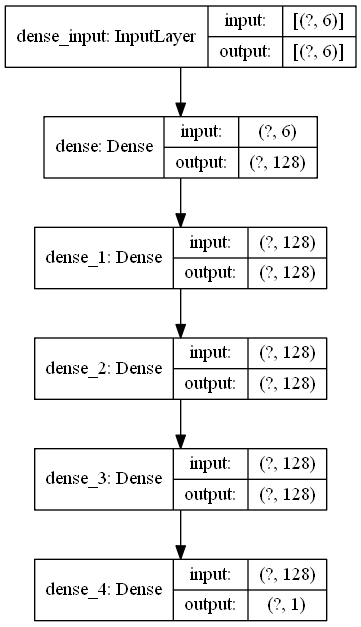

In [43]:
plot_model(model, show_layer_names=True, show_shapes=True)

# 4. 모델 컴파일(훈련 준비)

In [44]:
from tensorflow.keras import optimizers

In [45]:
# loss function : 목표 함수 정의(mse), optimizer : 코칭 방법 정의한다.(adam)
model.compile(loss="mean_squared_error",
              optimizer=optimizers.Adam(),
              metrics=["mean_squared_error","mean_absolute_error"])
# 결과를 확인 할 때 mean_squared_error와 mean_absolute_error를 같이 확인해보겠다.

# 5. 모델 훈련(callback 정의)

In [46]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, TensorBoard

In [47]:
from datetime import datetime
import os

In [48]:
# tensorboard를 위해 log를 남겨보자.
currentData = datetime.now()
kopo_log_folder=currentData.strftime("%Y%m%d_%H%M%S")
kopo_log_folder

'20191016_163232'

In [49]:
kopo_log_dirs = os.path.join("logs_kopo", kopo_log_folder)
kopo_log_dirs

'logs_kopo\\20191016_163232'

In [50]:
callback_list = [
    EarlyStopping(monitor="val_loss", patience=500),
    TensorBoard(log_dir = kopo_log_dirs),
    ModelCheckpoint(filepath="./model_r_weights.h5",
                    verbose=1, # verbose = 1, 저장 할 때 마다 로그를 1줄씩 직어내겠다.
                    monitor="val_loss",
                    save_best_only=True) 
]

In [51]:
model.fit(x = trainingData_features,
          y = trainingData_label,
          batch_size=32, # 총 85개의 훈련 세트가 있는데, 32개씩 문제지를 끊어서 보겠다 (3번 이동이 된다)
          epochs=500, # 2000회 반복하겠다.
          validation_split=0.2, # 훈련 데이터를 또 80:20 으로 쪼갠다. valid 데이터의 정확도를 계속 확인한다.
          callbacks=callback_list) # callbacks 함수를 부른다.

Train on 4858 samples, validate on 1215 samples
Epoch 1/500
3744/4858 [======================>.......] - ETA: 0s - loss: 117613.4529 - mean_squared_error: 117613.4297 - mean_absolute_error: 183.2474
Epoch 00001: val_loss improved from inf to 105084.76060, saving model to ./model_r_weights.h5
4858/4858 [==============================] - 0s 85us/sample - loss: 117970.6786 - mean_squared_error: 117970.6562 - mean_absolute_error: 183.8066 - val_loss: 105084.7606 - val_mean_squared_error: 105084.7578 - val_mean_absolute_error: 190.4100
Epoch 2/500
4320/4858 [=========================>....] - ETA: 0s - loss: 117551.3733 - mean_squared_error: 117551.3594 - mean_absolute_error: 188.9904
Epoch 00002: val_loss improved from 105084.76060 to 103200.06240, saving model to ./model_r_weights.h5
4858/4858 [==============================] - 0s 59us/sample - loss: 114536.5143 - mean_squared_error: 114536.5078 - mean_absolute_error: 187.1866 - val_loss: 103200.0624 - val_mean_squared_error: 103200.0703 -

Epoch 18/500
4416/4858 [==========================>...] - ETA: 0s - loss: 102562.9136 - mean_squared_error: 102562.9297 - mean_absolute_error: 174.6880
Epoch 00018: val_loss did not improve from 91763.32865
4858/4858 [==============================] - 0s 56us/sample - loss: 104362.7349 - mean_squared_error: 104362.7500 - mean_absolute_error: 175.2831 - val_loss: 93309.4574 - val_mean_squared_error: 93309.4453 - val_mean_absolute_error: 167.1862
Epoch 19/500
4160/4858 [========================>.....] - ETA: 0s - loss: 104948.3682 - mean_squared_error: 104948.3516 - mean_absolute_error: 175.2216
Epoch 00019: val_loss did not improve from 91763.32865
4858/4858 [==============================] - 0s 47us/sample - loss: 104070.9100 - mean_squared_error: 104070.8750 - mean_absolute_error: 175.1599 - val_loss: 94261.1525 - val_mean_squared_error: 94261.1484 - val_mean_absolute_error: 157.8988
Epoch 20/500
4832/4858 [============================>.] - ETA: 0s - loss: 104619.5534 - mean_squared_e

Epoch 36/500
4416/4858 [==========================>...] - ETA: 0s - loss: 106194.9694 - mean_squared_error: 106194.9609 - mean_absolute_error: 175.0120
Epoch 00036: val_loss did not improve from 88364.51752
4858/4858 [==============================] - 0s 56us/sample - loss: 101800.6386 - mean_squared_error: 101800.6328 - mean_absolute_error: 171.5709 - val_loss: 91133.2327 - val_mean_squared_error: 91133.2344 - val_mean_absolute_error: 149.0833
Epoch 37/500
4832/4858 [============================>.] - ETA: 0s - loss: 100827.8487 - mean_squared_error: 100827.8672 - mean_absolute_error: 170.8309
Epoch 00037: val_loss did not improve from 88364.51752
4858/4858 [==============================] - 0s 50us/sample - loss: 100644.5295 - mean_squared_error: 100644.5469 - mean_absolute_error: 170.8119 - val_loss: 89204.0039 - val_mean_squared_error: 89204.0156 - val_mean_absolute_error: 156.5962
Epoch 38/500
4288/4858 [=========================>....] - ETA: 0s - loss: 105463.0054 - mean_squared_e

Epoch 54/500
4352/4858 [=========================>....] - ETA: 0s - loss: 101332.0653 - mean_squared_error: 101332.0469 - mean_absolute_error: 169.5090
Epoch 00054: val_loss improved from 85385.56149 to 84483.54995, saving model to ./model_r_weights.h5
4858/4858 [==============================] - 0s 56us/sample - loss: 97928.9643 - mean_squared_error: 97928.9453 - mean_absolute_error: 168.0378 - val_loss: 84483.5500 - val_mean_squared_error: 84483.5625 - val_mean_absolute_error: 153.9087
Epoch 55/500
4640/4858 [===========================>..] - ETA: 0s - loss: 99136.0065 - mean_squared_error: 99136.0000 - mean_absolute_error: 167.0898  
Epoch 00055: val_loss improved from 84483.54995 to 82387.87530, saving model to ./model_r_weights.h5
4858/4858 [==============================] - 0s 54us/sample - loss: 97568.4288 - mean_squared_error: 97568.4297 - mean_absolute_error: 166.1958 - val_loss: 82387.8753 - val_mean_squared_error: 82387.8828 - val_mean_absolute_error: 149.4220
Epoch 56/500
4

Epoch 72/500
4224/4858 [=========================>....] - ETA: 0s - loss: 83915.7576 - mean_squared_error: 83915.7344 - mean_absolute_error: 158.8768
Epoch 00072: val_loss did not improve from 78386.22296
4858/4858 [==============================] - 0s 55us/sample - loss: 93070.2334 - mean_squared_error: 93070.2109 - mean_absolute_error: 162.6152 - val_loss: 92256.8520 - val_mean_squared_error: 92256.8516 - val_mean_absolute_error: 174.9581
Epoch 73/500
4736/4858 [============================>.] - ETA: 0s - loss: 91713.2353 - mean_squared_error: 91713.2344 - mean_absolute_error: 161.4636
Epoch 00073: val_loss did not improve from 78386.22296
4858/4858 [==============================] - 0s 57us/sample - loss: 90178.6291 - mean_squared_error: 90178.6250 - mean_absolute_error: 160.4203 - val_loss: 86888.7452 - val_mean_squared_error: 86888.7422 - val_mean_absolute_error: 141.1634
Epoch 74/500
4352/4858 [=========================>....] - ETA: 0s - loss: 91892.6524 - mean_squared_error: 918

4064/4858 [========================>.....] - ETA: 0s - loss: 80869.2492 - mean_squared_error: 80869.2500 - mean_absolute_error: 155.0157
Epoch 00090: val_loss improved from 75707.15767 to 73241.68540, saving model to ./model_r_weights.h5
4858/4858 [==============================] - 0s 50us/sample - loss: 84672.6954 - mean_squared_error: 84672.6875 - mean_absolute_error: 154.9444 - val_loss: 73241.6854 - val_mean_squared_error: 73241.6953 - val_mean_absolute_error: 148.0838
Epoch 91/500
4608/4858 [===========================>..] - ETA: 0s - loss: 87310.4576 - mean_squared_error: 87310.4766 - mean_absolute_error: 157.6006
Epoch 00091: val_loss improved from 73241.68540 to 72855.95602, saving model to ./model_r_weights.h5
4858/4858 [==============================] - 0s 54us/sample - loss: 86404.9531 - mean_squared_error: 86404.9844 - mean_absolute_error: 157.3679 - val_loss: 72855.9560 - val_mean_squared_error: 72855.9609 - val_mean_absolute_error: 136.0572
Epoch 92/500
4448/4858 [=======

4032/4858 [=======================>......] - ETA: 0s - loss: 91177.6121 - mean_squared_error: 91177.6406 - mean_absolute_error: 157.5302
Epoch 00108: val_loss did not improve from 72520.29109
4858/4858 [==============================] - 0s 55us/sample - loss: 87481.9795 - mean_squared_error: 87482.0156 - mean_absolute_error: 155.6049 - val_loss: 76549.4735 - val_mean_squared_error: 76549.4688 - val_mean_absolute_error: 128.7461
Epoch 109/500
4128/4858 [========================>.....] - ETA: 0s - loss: 85790.9926 - mean_squared_error: 85790.9844 - mean_absolute_error: 153.2394
Epoch 00109: val_loss did not improve from 72520.29109
4858/4858 [==============================] - 0s 46us/sample - loss: 85533.4276 - mean_squared_error: 85533.4141 - mean_absolute_error: 152.5538 - val_loss: 79352.3596 - val_mean_squared_error: 79352.3594 - val_mean_absolute_error: 147.7350
Epoch 110/500
4640/4858 [===========================>..] - ETA: 0s - loss: 85339.3913 - mean_squared_error: 85339.4219 - m

3712/4858 [=====================>........] - ETA: 0s - loss: 80462.5434 - mean_squared_error: 80462.5625 - mean_absolute_error: 151.5114
Epoch 00126: val_loss did not improve from 70146.67258
4858/4858 [==============================] - 0s 47us/sample - loss: 85139.9707 - mean_squared_error: 85139.9609 - mean_absolute_error: 153.3547 - val_loss: 74986.1319 - val_mean_squared_error: 74986.1406 - val_mean_absolute_error: 143.2758
Epoch 127/500
4288/4858 [=========================>....] - ETA: 0s - loss: 84420.1951 - mean_squared_error: 84420.1875 - mean_absolute_error: 155.2693
Epoch 00127: val_loss did not improve from 70146.67258
4858/4858 [==============================] - 0s 54us/sample - loss: 81757.7283 - mean_squared_error: 81757.7109 - mean_absolute_error: 153.2970 - val_loss: 72022.1247 - val_mean_squared_error: 72022.1094 - val_mean_absolute_error: 131.6655
Epoch 128/500
4352/4858 [=========================>....] - ETA: 0s - loss: 79705.2755 - mean_squared_error: 79705.2656 - m

Epoch 145/500
4352/4858 [=========================>....] - ETA: 0s - loss: 81428.4346 - mean_squared_error: 81428.4062 - mean_absolute_error: 148.8826 ETA: 0s - loss: 55628.1745 - mean_squared_error: 55628.1719 - mean_absolute_error: 13
Epoch 00145: val_loss did not improve from 70146.67258
4858/4858 [==============================] - 0s 52us/sample - loss: 81321.8279 - mean_squared_error: 81321.7891 - mean_absolute_error: 148.7566 - val_loss: 75001.8783 - val_mean_squared_error: 75001.8672 - val_mean_absolute_error: 167.6128
Epoch 146/500
4608/4858 [===========================>..] - ETA: 0s - loss: 73089.7236 - mean_squared_error: 73089.7500 - mean_absolute_error: 149.6308
Epoch 00146: val_loss did not improve from 70146.67258
4858/4858 [==============================] - 0s 55us/sample - loss: 77282.0326 - mean_squared_error: 77282.0547 - mean_absolute_error: 150.1574 - val_loss: 80115.7365 - val_mean_squared_error: 80115.7422 - val_mean_absolute_error: 152.9908
Epoch 147/500
4576/485

Epoch 163/500
4832/4858 [============================>.] - ETA: 0s - loss: 75695.3132 - mean_squared_error: 75695.3125 - mean_absolute_error: 144.6643
Epoch 00163: val_loss did not improve from 68026.36038
4858/4858 [==============================] - 0s 51us/sample - loss: 77062.8012 - mean_squared_error: 77062.7969 - mean_absolute_error: 145.4522 - val_loss: 85410.7140 - val_mean_squared_error: 85410.7188 - val_mean_absolute_error: 125.5125
Epoch 164/500
4832/4858 [============================>.] - ETA: 0s - loss: 81183.1468 - mean_squared_error: 81183.1484 - mean_absolute_error: 149.5928
Epoch 00164: val_loss did not improve from 68026.36038
4858/4858 [==============================] - 0s 51us/sample - loss: 81930.4476 - mean_squared_error: 81930.4531 - mean_absolute_error: 149.9194 - val_loss: 73649.5703 - val_mean_squared_error: 73649.5781 - val_mean_absolute_error: 152.0075
Epoch 165/500
4608/4858 [===========================>..] - ETA: 0s - loss: 80434.8160 - mean_squared_error: 

4512/4858 [==========================>...] - ETA: 0s - loss: 72728.0676 - mean_squared_error: 72728.0547 - mean_absolute_error: 146.9107
Epoch 00181: val_loss did not improve from 67130.25890
4858/4858 [==============================] - 0s 54us/sample - loss: 78048.9432 - mean_squared_error: 78048.9297 - mean_absolute_error: 148.8976 - val_loss: 79898.5642 - val_mean_squared_error: 79898.5703 - val_mean_absolute_error: 145.9554
Epoch 182/500
4672/4858 [===========================>..] - ETA: 0s - loss: 81197.1964 - mean_squared_error: 81197.1953 - mean_absolute_error: 147.4706
Epoch 00182: val_loss did not improve from 67130.25890
4858/4858 [==============================] - 0s 53us/sample - loss: 79798.8153 - mean_squared_error: 79798.8203 - mean_absolute_error: 146.7590 - val_loss: 72678.3696 - val_mean_squared_error: 72678.3750 - val_mean_absolute_error: 143.1992
Epoch 183/500
4672/4858 [===========================>..] - ETA: 0s - loss: 85903.9955 - mean_squared_error: 85903.9922 - m

4288/4858 [=========================>....] - ETA: 0s - loss: 78808.8484 - mean_squared_error: 78808.8672 - mean_absolute_error: 147.0526
Epoch 00199: val_loss did not improve from 66593.52829
4858/4858 [==============================] - 0s 56us/sample - loss: 75476.2878 - mean_squared_error: 75476.3047 - mean_absolute_error: 144.6574 - val_loss: 70196.4253 - val_mean_squared_error: 70196.4219 - val_mean_absolute_error: 130.6768
Epoch 200/500
4192/4858 [========================>.....] - ETA: 0s - loss: 81025.4122 - mean_squared_error: 81025.3984 - mean_absolute_error: 148.5020
Epoch 00200: val_loss did not improve from 66593.52829
4858/4858 [==============================] - 0s 58us/sample - loss: 77604.8092 - mean_squared_error: 77604.7891 - mean_absolute_error: 146.6075 - val_loss: 73014.1236 - val_mean_squared_error: 73014.1172 - val_mean_absolute_error: 136.5975
Epoch 201/500
4832/4858 [============================>.] - ETA: 0s - loss: 77474.4578 - mean_squared_error: 77474.4531 - m

4704/4858 [============================>.] - ETA: 0s - loss: 78808.1446 - mean_squared_error: 78808.1328 - mean_absolute_error: 144.6551
Epoch 00217: val_loss did not improve from 66593.52829
4858/4858 [==============================] - 0s 52us/sample - loss: 79337.1046 - mean_squared_error: 79337.0938 - mean_absolute_error: 144.6743 - val_loss: 71237.6361 - val_mean_squared_error: 71237.6484 - val_mean_absolute_error: 136.3227
Epoch 218/500
3648/4858 [=====================>........] - ETA: 0s - loss: 76132.4919 - mean_squared_error: 76132.4766 - mean_absolute_error: 140.4722
Epoch 00218: val_loss did not improve from 66593.52829
4858/4858 [==============================] - 0s 50us/sample - loss: 78402.7671 - mean_squared_error: 78402.7578 - mean_absolute_error: 145.4210 - val_loss: 67435.7745 - val_mean_squared_error: 67435.7812 - val_mean_absolute_error: 142.5257
Epoch 219/500
4224/4858 [=========================>....] - ETA: 0s - loss: 76803.5860 - mean_squared_error: 76803.5703 - m

3712/4858 [=====================>........] - ETA: 0s - loss: 81492.5083 - mean_squared_error: 81492.5078 - mean_absolute_error: 145.8483
Epoch 00235: val_loss did not improve from 66150.19809
4858/4858 [==============================] - 0s 50us/sample - loss: 79186.2898 - mean_squared_error: 79186.2656 - mean_absolute_error: 144.8324 - val_loss: 73872.1923 - val_mean_squared_error: 73872.1875 - val_mean_absolute_error: 159.5811
Epoch 236/500
3648/4858 [=====================>........] - ETA: 0s - loss: 72312.6862 - mean_squared_error: 72312.6719 - mean_absolute_error: 145.1342
Epoch 00236: val_loss did not improve from 66150.19809
4858/4858 [==============================] - 0s 52us/sample - loss: 75333.5787 - mean_squared_error: 75333.5625 - mean_absolute_error: 143.5443 - val_loss: 73134.7413 - val_mean_squared_error: 73134.7500 - val_mean_absolute_error: 152.5194
Epoch 237/500
4352/4858 [=========================>....] - ETA: 0s - loss: 77633.3125 - mean_squared_error: 77633.3125 - m

Epoch 254/500
4736/4858 [============================>.] - ETA: 0s - loss: 73293.6614 - mean_squared_error: 73293.6641 - mean_absolute_error: 142.8790
Epoch 00254: val_loss did not improve from 66150.19809
4858/4858 [==============================] - 0s 49us/sample - loss: 76008.8200 - mean_squared_error: 76008.8203 - mean_absolute_error: 144.6311 - val_loss: 70623.6621 - val_mean_squared_error: 70623.6562 - val_mean_absolute_error: 150.5358
Epoch 255/500
4544/4858 [===========================>..] - ETA: 0s - loss: 74814.5966 - mean_squared_error: 74814.6094 - mean_absolute_error: 143.5362
Epoch 00255: val_loss did not improve from 66150.19809
4858/4858 [==============================] - 0s 53us/sample - loss: 75386.5117 - mean_squared_error: 75386.5391 - mean_absolute_error: 143.9213 - val_loss: 68978.1935 - val_mean_squared_error: 68978.1797 - val_mean_absolute_error: 146.2726
Epoch 256/500
3712/4858 [=====================>........] - ETA: 0s - loss: 68606.4946 - mean_squared_error: 

Epoch 00272: val_loss did not improve from 66150.19809
4858/4858 [==============================] - 0s 50us/sample - loss: 78362.1624 - mean_squared_error: 78362.1562 - mean_absolute_error: 144.7392 - val_loss: 71669.6874 - val_mean_squared_error: 71669.6719 - val_mean_absolute_error: 123.5768
Epoch 273/500
4480/4858 [==========================>...] - ETA: 0s - loss: 82041.4360 - mean_squared_error: 82041.4297 - mean_absolute_error: 145.5897
Epoch 00273: val_loss did not improve from 66150.19809
4858/4858 [==============================] - 0s 54us/sample - loss: 81106.8181 - mean_squared_error: 81106.8203 - mean_absolute_error: 146.0225 - val_loss: 67228.2685 - val_mean_squared_error: 67228.2656 - val_mean_absolute_error: 139.2928
Epoch 274/500
3744/4858 [======================>.......] - ETA: 0s - loss: 81249.6820 - mean_squared_error: 81249.6641 - mean_absolute_error: 143.8991
Epoch 00274: val_loss did not improve from 66150.19809
4858/4858 [==============================] - 0s 50us/

Epoch 291/500
4736/4858 [============================>.] - ETA: 0s - loss: 78607.7913 - mean_squared_error: 78607.7734 - mean_absolute_error: 145.4968
Epoch 00291: val_loss did not improve from 64935.49488
4858/4858 [==============================] - 0s 52us/sample - loss: 79879.2235 - mean_squared_error: 79879.2031 - mean_absolute_error: 145.6019 - val_loss: 82161.4998 - val_mean_squared_error: 82161.4922 - val_mean_absolute_error: 153.9408
Epoch 292/500
3648/4858 [=====================>........] - ETA: 0s - loss: 87515.6238 - mean_squared_error: 87515.6172 - mean_absolute_error: 150.4181
Epoch 00292: val_loss did not improve from 64935.49488
4858/4858 [==============================] - 0s 50us/sample - loss: 82200.5375 - mean_squared_error: 82200.5312 - mean_absolute_error: 149.4150 - val_loss: 67553.1936 - val_mean_squared_error: 67553.1875 - val_mean_absolute_error: 140.5853
Epoch 293/500
4832/4858 [============================>.] - ETA: 0s - loss: 75847.2194 - mean_squared_error: 

Epoch 310/500
3712/4858 [=====================>........] - ETA: 0s - loss: 74045.0359 - mean_squared_error: 74045.0469 - mean_absolute_error: 141.8837
Epoch 00310: val_loss did not improve from 64935.49488
4858/4858 [==============================] - 0s 51us/sample - loss: 75399.3589 - mean_squared_error: 75399.3359 - mean_absolute_error: 143.5114 - val_loss: 69130.4543 - val_mean_squared_error: 69130.4531 - val_mean_absolute_error: 129.0809
Epoch 311/500
4736/4858 [============================>.] - ETA: 0s - loss: 76684.9438 - mean_squared_error: 76684.9219 - mean_absolute_error: 142.0416
Epoch 00311: val_loss did not improve from 64935.49488
4858/4858 [==============================] - 0s 52us/sample - loss: 76568.1648 - mean_squared_error: 76568.1484 - mean_absolute_error: 141.7740 - val_loss: 73185.1981 - val_mean_squared_error: 73185.2031 - val_mean_absolute_error: 127.5481
Epoch 312/500
3680/4858 [=====================>........] - ETA: 0s - loss: 78966.1084 - mean_squared_error: 

3744/4858 [======================>.......] - ETA: 0s - loss: 79668.2130 - mean_squared_error: 79668.2188 - mean_absolute_error: 144.9308
Epoch 00328: val_loss did not improve from 64834.96988
4858/4858 [==============================] - 0s 50us/sample - loss: 76731.2865 - mean_squared_error: 76731.3047 - mean_absolute_error: 143.5095 - val_loss: 74582.0893 - val_mean_squared_error: 74582.0859 - val_mean_absolute_error: 123.1978
Epoch 329/500
4736/4858 [============================>.] - ETA: 0s - loss: 73998.4076 - mean_squared_error: 73998.4219 - mean_absolute_error: 140.1689
Epoch 00329: val_loss did not improve from 64834.96988
4858/4858 [==============================] - 0s 52us/sample - loss: 74138.3940 - mean_squared_error: 74138.3984 - mean_absolute_error: 140.1374 - val_loss: 70314.3774 - val_mean_squared_error: 70314.3750 - val_mean_absolute_error: 132.8521
Epoch 330/500
4800/4858 [============================>.] - ETA: 0s - loss: 78388.8420 - mean_squared_error: 78388.8438 - m

Epoch 347/500
3776/4858 [======================>.......] - ETA: 0s - loss: 71370.8618 - mean_squared_error: 71370.8672 - mean_absolute_error: 143.3033
Epoch 00347: val_loss did not improve from 64834.96988
4858/4858 [==============================] - 0s 49us/sample - loss: 75116.0871 - mean_squared_error: 75116.0938 - mean_absolute_error: 145.7086 - val_loss: 70727.6627 - val_mean_squared_error: 70727.6562 - val_mean_absolute_error: 135.0514
Epoch 348/500
3744/4858 [======================>.......] - ETA: 0s - loss: 74987.4182 - mean_squared_error: 74987.4141 - mean_absolute_error: 144.2673
Epoch 00348: val_loss did not improve from 64834.96988
4858/4858 [==============================] - 0s 49us/sample - loss: 76341.1033 - mean_squared_error: 76341.0938 - mean_absolute_error: 143.4890 - val_loss: 70125.2479 - val_mean_squared_error: 70125.2578 - val_mean_absolute_error: 122.6627
Epoch 349/500
3776/4858 [======================>.......] - ETA: 0s - loss: 73932.2188 - mean_squared_error: 

Epoch 366/500
3904/4858 [=======================>......] - ETA: 0s - loss: 77818.5229 - mean_squared_error: 77818.5000 - mean_absolute_error: 146.2276
Epoch 00366: val_loss did not improve from 64834.96988
4858/4858 [==============================] - 0s 48us/sample - loss: 79877.6286 - mean_squared_error: 79877.6016 - mean_absolute_error: 144.5097 - val_loss: 72839.0099 - val_mean_squared_error: 72839.0156 - val_mean_absolute_error: 156.3614
Epoch 367/500
3808/4858 [======================>.......] - ETA: 0s - loss: 69107.6834 - mean_squared_error: 69107.6953 - mean_absolute_error: 139.5817
Epoch 00367: val_loss did not improve from 64834.96988
4858/4858 [==============================] - 0s 49us/sample - loss: 71867.2293 - mean_squared_error: 71867.2500 - mean_absolute_error: 138.8618 - val_loss: 65207.2586 - val_mean_squared_error: 65207.2578 - val_mean_absolute_error: 144.9926
Epoch 368/500
3680/4858 [=====================>........] - ETA: 0s - loss: 71978.3279 - mean_squared_error: 

Epoch 00384: val_loss did not improve from 64834.96988
4858/4858 [==============================] - 0s 50us/sample - loss: 73532.3510 - mean_squared_error: 73532.3438 - mean_absolute_error: 138.9852 - val_loss: 65341.6933 - val_mean_squared_error: 65341.6875 - val_mean_absolute_error: 128.6244
Epoch 385/500
3840/4858 [======================>.......] - ETA: 0s - loss: 73548.4647 - mean_squared_error: 73548.4609 - mean_absolute_error: 140.7084
Epoch 00385: val_loss did not improve from 64834.96988
4858/4858 [==============================] - 0s 47us/sample - loss: 74285.9859 - mean_squared_error: 74285.9688 - mean_absolute_error: 141.0979 - val_loss: 70512.2709 - val_mean_squared_error: 70512.2656 - val_mean_absolute_error: 146.6124
Epoch 386/500
3808/4858 [======================>.......] - ETA: 0s - loss: 71765.8904 - mean_squared_error: 71765.9141 - mean_absolute_error: 140.8406
Epoch 00386: val_loss did not improve from 64834.96988
4858/4858 [==============================] - 0s 49us/

Epoch 403/500
4640/4858 [===========================>..] - ETA: 0s - loss: 74580.7123 - mean_squared_error: 74580.7266 - mean_absolute_error: 142.2251
Epoch 00403: val_loss did not improve from 63696.40894
4858/4858 [==============================] - 0s 55us/sample - loss: 75594.9916 - mean_squared_error: 75595.0000 - mean_absolute_error: 143.2466 - val_loss: 73900.7938 - val_mean_squared_error: 73900.7891 - val_mean_absolute_error: 150.9497
Epoch 404/500
4768/4858 [============================>.] - ETA: 0s - loss: 72363.3987 - mean_squared_error: 72363.4062 - mean_absolute_error: 140.7304
Epoch 00404: val_loss did not improve from 63696.40894
4858/4858 [==============================] - 0s 51us/sample - loss: 71632.7359 - mean_squared_error: 71632.7344 - mean_absolute_error: 140.3454 - val_loss: 69880.4392 - val_mean_squared_error: 69880.4375 - val_mean_absolute_error: 129.0641
Epoch 405/500
4832/4858 [============================>.] - ETA: 0s - loss: 71779.2293 - mean_squared_error: 

4800/4858 [============================>.] - ETA: 0s - loss: 72512.3562 - mean_squared_error: 72512.3359 - mean_absolute_error: 136.5780
Epoch 00421: val_loss did not improve from 62351.97363
4858/4858 [==============================] - 0s 51us/sample - loss: 72236.5517 - mean_squared_error: 72236.5312 - mean_absolute_error: 136.7195 - val_loss: 68637.4845 - val_mean_squared_error: 68637.4766 - val_mean_absolute_error: 147.3435
Epoch 422/500
4256/4858 [=========================>....] - ETA: 0s - loss: 71800.8245 - mean_squared_error: 71800.8359 - mean_absolute_error: 136.6270
Epoch 00422: val_loss did not improve from 62351.97363
4858/4858 [==============================] - 0s 57us/sample - loss: 69584.0502 - mean_squared_error: 69584.0625 - mean_absolute_error: 136.2500 - val_loss: 66946.1764 - val_mean_squared_error: 66946.1797 - val_mean_absolute_error: 122.0527
Epoch 423/500
4544/4858 [===========================>..] - ETA: 0s - loss: 71832.2773 - mean_squared_error: 71832.2969 - m

4096/4858 [========================>.....] - ETA: 0s - loss: 78752.7394 - mean_squared_error: 78752.7188 - mean_absolute_error: 141.7492
Epoch 00439: val_loss did not improve from 62351.97363
4858/4858 [==============================] - 0s 60us/sample - loss: 74693.7437 - mean_squared_error: 74693.7266 - mean_absolute_error: 139.4225 - val_loss: 69669.0546 - val_mean_squared_error: 69669.0547 - val_mean_absolute_error: 125.9941
Epoch 440/500
4160/4858 [========================>.....] - ETA: 0s - loss: 71103.3950 - mean_squared_error: 71103.3906 - mean_absolute_error: 139.8828
Epoch 00440: val_loss did not improve from 62351.97363
4858/4858 [==============================] - 0s 59us/sample - loss: 74302.1494 - mean_squared_error: 74302.1484 - mean_absolute_error: 139.7809 - val_loss: 66201.6420 - val_mean_squared_error: 66201.6484 - val_mean_absolute_error: 155.5345
Epoch 441/500
4224/4858 [=========================>....] - ETA: 0s - loss: 77161.3074 - mean_squared_error: 77161.2891 - m

4800/4858 [============================>.] - ETA: 0s - loss: 74947.1262 - mean_squared_error: 74947.1328 - mean_absolute_error: 143.1278
Epoch 00457: val_loss did not improve from 62135.57188
4858/4858 [==============================] - 0s 51us/sample - loss: 74910.3747 - mean_squared_error: 74910.3828 - mean_absolute_error: 143.6119 - val_loss: 70827.0770 - val_mean_squared_error: 70827.0781 - val_mean_absolute_error: 156.6991
Epoch 458/500
3712/4858 [=====================>........] - ETA: 0s - loss: 70509.0507 - mean_squared_error: 70509.0547 - mean_absolute_error: 140.8911
Epoch 00458: val_loss did not improve from 62135.57188
4858/4858 [==============================] - 0s 50us/sample - loss: 77157.7965 - mean_squared_error: 77157.7969 - mean_absolute_error: 142.7837 - val_loss: 65957.1126 - val_mean_squared_error: 65957.1172 - val_mean_absolute_error: 135.7861
Epoch 459/500
4320/4858 [=========================>....] - ETA: 0s - loss: 81782.3146 - mean_squared_error: 81782.3203 - m

Epoch 476/500
4832/4858 [============================>.] - ETA: 0s - loss: 72521.2873 - mean_squared_error: 72521.2969 - mean_absolute_error: 139.1756
Epoch 00476: val_loss did not improve from 62135.57188
4858/4858 [==============================] - 0s 52us/sample - loss: 72499.1680 - mean_squared_error: 72499.1797 - mean_absolute_error: 139.1404 - val_loss: 63572.9624 - val_mean_squared_error: 63572.9570 - val_mean_absolute_error: 127.9243
Epoch 477/500
4480/4858 [==========================>...] - ETA: 0s - loss: 75298.8173 - mean_squared_error: 75298.8047 - mean_absolute_error: 139.5164
Epoch 00477: val_loss did not improve from 62135.57188
4858/4858 [==============================] - 0s 54us/sample - loss: 73700.1215 - mean_squared_error: 73700.1172 - mean_absolute_error: 138.5557 - val_loss: 67117.0626 - val_mean_squared_error: 67117.0781 - val_mean_absolute_error: 135.3919
Epoch 478/500
4832/4858 [============================>.] - ETA: 0s - loss: 74000.8523 - mean_squared_error: 

Epoch 495/500
3712/4858 [=====================>........] - ETA: 0s - loss: 75109.6658 - mean_squared_error: 75109.6641 - mean_absolute_error: 139.5585
Epoch 00495: val_loss did not improve from 62135.57188
4858/4858 [==============================] - 0s 50us/sample - loss: 71058.8729 - mean_squared_error: 71058.8984 - mean_absolute_error: 136.8642 - val_loss: 70121.1305 - val_mean_squared_error: 70121.1250 - val_mean_absolute_error: 134.9227
Epoch 496/500
3648/4858 [=====================>........] - ETA: 0s - loss: 74799.9554 - mean_squared_error: 74799.9375 - mean_absolute_error: 142.4124
Epoch 00496: val_loss did not improve from 62135.57188
4858/4858 [==============================] - 0s 50us/sample - loss: 69981.6542 - mean_squared_error: 69981.6406 - mean_absolute_error: 136.3605 - val_loss: 82025.6783 - val_mean_squared_error: 82025.6875 - val_mean_absolute_error: 122.3717
Epoch 497/500
3744/4858 [======================>.......] - ETA: 0s - loss: 66278.6237 - mean_squared_error: 

# 6. 모델 추론

In [52]:
loss, mse, mae = model.evaluate(x=testData_features,
                                y=testData_label)
# 첫 번째는 오차, 2번째 부터는 compile할 때 정의해놓은 metrics 정보가 나온다.

1519/1519 [==============================] - 0s 26us/sample - loss: 57217.3809 - mean_squared_error: 57217.3750 - mean_absolute_error: 132.0848


In [53]:
mae

132.08482

In [54]:
mse

57217.375

# 7. 모델 예측

In [55]:
dlpredict = model.predict(testData_features) # 딥러닝

In [56]:
finalLabl = testData_label.reset_index(drop=True)

In [57]:
finalLabl["dt_predict"] = predictValue # 머신러닝

In [58]:
finalLabl["dl_predict"] = dlpredict

In [59]:
finalLabl.head()

,QTY,dt_predict,dl_predict
0,59,61.0,68.920769
1,9,10.0,40.908577
2,33,8.0,24.732241
3,602,967.0,343.688171
4,12,9.0,24.265501


In [60]:
from sklearn.metrics import mean_absolute_error

In [61]:
mean_absolute_error(finalLabl.QTY, finalLabl.dt_predict)

68.9276936581084

In [62]:
mean_absolute_error(finalLabl.QTY, finalLabl.dl_predict)

132.0848269308767

# 과제 2 Group

In [81]:
selloutData.head()

,REGIONID,PRODUCTGROUP,PRODUCT,ITEM,YEARWEEK,YEAR,WEEK,QTY,HOLIDAY,HCLUS,PROMOTION,PRO_PERCENT,LE_ITEM,LE_HOLI,LE_PROMO
0,A01,PG01,P01,ITEM001,201538,2015,38,1,N,4,N,0.0,0,0,0
1,A01,PG01,P01,ITEM001,201548,2015,48,1,Y,0,N,0.0,0,1,0
2,A01,PG01,P01,ITEM001,201549,2015,49,2,Y,0,N,0.0,0,1,0
3,A01,PG01,P01,ITEM002,201526,2015,26,1,Y,1,N,0.0,1,1,0
4,A01,PG01,P01,ITEM002,201532,2015,32,1,N,4,N,0.0,1,0,0


In [63]:
groupkey = ["REGIONID", "PRODUCTGROUP", "PRODUCT", "ITEM"]
groupdata = selloutData.groupby(groupkey)
groupdata

In [120]:
def predict_dl(onegroup):

#     onegroup = cleansedData[cleansedData.ITEM=="ITEM043"]
#     onegroup

    eachgroup = onegroup.reset_index()

    eachgroup.drop(columns="index", inplace=True)

    corrdf2 = eachgroup.corr()

    stdFeatures = 0.4 # features 선정할 때, 
    features = list(corrdf[(abs(corrdf2.QTY) > stdFeatures) &
                               (corrdf2.QTY < 1 ) ].index)
    label = ["QTY"]
    
    trainingData_features2,\
    testData_features2,\
    trainingData_label2,\
    testData_label2=\
    train_test_split(eachgroup[features], eachgroup[label], random_state=1, test_size=0.2)

    inputDim = trainingData_features2.iloc[0,:].shape # features 3개

    model2 = Sequential() # Model 초기화 DeepLearning

    # 마지막 레이어만 activation을 고민하고, 나머지는 모두 relu
    model2.add(Dense(units=128, activation="relu", input_shape=inputDim)) # 첫 번째 Layer를 정할 때는 inputShape이 들어간다
    # Layer 1
    model2.add(Dense(units=128, activation="relu"))
    # Layer 2
    model2.add(Dense(units=128, activation="relu"))
    # Layer 3
    model2.add(Dense(units=128, activation="relu"))
    # Layer 4
    model2.add(Dense(units=1, activation="relu"))

    model2.summary()

    plot_model(model2, show_layer_names=True, show_shapes=True)

    # loss function : 목표 함수 정의(mse), optimizer : 코칭 방법 정의한다.(adam)
    model2.compile(loss="mean_squared_error",
                  optimizer=optimizers.Adam(),
                  metrics=["mean_squared_error","mean_absolute_error"])
    # 결과를 확인 할 때 mean_squared_error와 mean_absolute_error를 같이 확인해보겠다.

    callback_list = [
        EarlyStopping(monitor="val_loss", patience=500),
        TensorBoard(log_dir = kopo_log_dirs),
        ModelCheckpoint(filepath="./model_r_weights.h5",
                        verbose=1, # verbose = 1, 저장 할 때 마다 로그를 1줄씩 직어내겠다.
                        monitor="val_loss",
                        save_best_only=True) 
    ]

    model2.fit(x = trainingData_features2,
               y = trainingData_label2,
               batch_size=32, # 총 85개의 훈련 세트가 있는데, 32개씩 문제지를 끊어서 보겠다 (3번 이동이 된다)
               epochs=100, # 2000회 반복하겠다.
               validation_split=0.2, # 훈련 데이터를 또 80:20 으로 쪼갠다. valid 데이터의 정확도를 계속 확인한다.
               callbacks=callback_list) # callbacks 함수를 부른다.

    dlpredict2 = model2.predict(testData_features2) # 딥러닝
    finalLabl2 = testData_label2.reset_index(drop=True)
    finalLabl2["dl_predict"] = dlpredict2

    return finalLabl2

In [121]:
predictResult = cleansedData.groupby(groupkey).apply(predict_dl)

Model: "sequential_56"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_280 (Dense)            (None, 128)               512       
_________________________________________________________________
dense_281 (Dense)            (None, 128)               16512     
_________________________________________________________________
dense_282 (Dense)            (None, 128)               16512     
_________________________________________________________________
dense_283 (Dense)            (None, 128)               16512     
_________________________________________________________________
dense_284 (Dense)            (None, 1)                 129       
Total params: 50,177
Trainable params: 50,177
Non-trainable params: 0
_________________________________________________________________
Train on 92 samples, validate on 24 samples
Epoch 1/100
32/92 [=========>....................] - ETA: 0s - loss: 10

Epoch 17/100
32/92 [=========>....................] - ETA: 0s - loss: 419742.5938 - mean_squared_error: 419742.5938 - mean_absolute_error: 422.0938
Epoch 00017: val_loss did not improve from 413878.46875
92/92 [==============================] - 0s 174us/sample - loss: 925281.0245 - mean_squared_error: 925281.0625 - mean_absolute_error: 515.1848 - val_loss: 413878.4688 - val_mean_squared_error: 413878.4688 - val_mean_absolute_error: 431.5417
Epoch 18/100
32/92 [=========>....................] - ETA: 0s - loss: 286258.6562 - mean_squared_error: 286258.6562 - mean_absolute_error: 385.6562
Epoch 00018: val_loss did not improve from 413878.46875
92/92 [==============================] - 0s 130us/sample - loss: 925281.0217 - mean_squared_error: 925281.0625 - mean_absolute_error: 515.1848 - val_loss: 413878.4688 - val_mean_squared_error: 413878.4688 - val_mean_absolute_error: 431.5417
Epoch 19/100
32/92 [=========>....................] - ETA: 0s - loss: 530634.5000 - mean_squared_error: 530634

Epoch 00035: val_loss did not improve from 413878.46875
92/92 [==============================] - 0s 119us/sample - loss: 925281.1033 - mean_squared_error: 925281.0625 - mean_absolute_error: 515.1848 - val_loss: 413878.4688 - val_mean_squared_error: 413878.4688 - val_mean_absolute_error: 431.5417
Epoch 36/100
32/92 [=========>....................] - ETA: 0s - loss: 1318299.8750 - mean_squared_error: 1318299.8750 - mean_absolute_error: 561.2500
Epoch 00036: val_loss did not improve from 413878.46875
92/92 [==============================] - 0s 152us/sample - loss: 925281.0679 - mean_squared_error: 925281.0625 - mean_absolute_error: 515.1848 - val_loss: 413878.4688 - val_mean_squared_error: 413878.4688 - val_mean_absolute_error: 431.5417
Epoch 37/100
32/92 [=========>....................] - ETA: 0s - loss: 829586.6250 - mean_squared_error: 829586.6250 - mean_absolute_error: 536.0000
Epoch 00037: val_loss did not improve from 413878.46875
92/92 [==============================] - 0s 130us/sa

Epoch 54/100
32/92 [=========>....................] - ETA: 0s - loss: 1043558.8750 - mean_squared_error: 1043558.8750 - mean_absolute_error: 584.5000
Epoch 00054: val_loss did not improve from 413878.46875
92/92 [==============================] - 0s 130us/sample - loss: 925281.0598 - mean_squared_error: 925281.0625 - mean_absolute_error: 515.1848 - val_loss: 413878.4688 - val_mean_squared_error: 413878.4688 - val_mean_absolute_error: 431.5417
Epoch 55/100
32/92 [=========>....................] - ETA: 0s - loss: 1343867.5000 - mean_squared_error: 1343867.5000 - mean_absolute_error: 711.3438
Epoch 00055: val_loss did not improve from 413878.46875
92/92 [==============================] - 0s 130us/sample - loss: 925281.0598 - mean_squared_error: 925281.0625 - mean_absolute_error: 515.1848 - val_loss: 413878.4688 - val_mean_squared_error: 413878.4688 - val_mean_absolute_error: 431.5417
Epoch 56/100
32/92 [=========>....................] - ETA: 0s - loss: 758327.1250 - mean_squared_error: 75

Epoch 73/100
32/92 [=========>....................] - ETA: 0s - loss: 971392.6250 - mean_squared_error: 971392.6250 - mean_absolute_error: 540.7812
Epoch 00073: val_loss did not improve from 413878.46875
92/92 [==============================] - 0s 325us/sample - loss: 925281.0000 - mean_squared_error: 925281.0625 - mean_absolute_error: 515.1848 - val_loss: 413878.4688 - val_mean_squared_error: 413878.4688 - val_mean_absolute_error: 431.5417
Epoch 74/100
32/92 [=========>....................] - ETA: 0s - loss: 1569025.3750 - mean_squared_error: 1569025.3750 - mean_absolute_error: 674.0312
Epoch 00074: val_loss did not improve from 413878.46875
92/92 [==============================] - 0s 206us/sample - loss: 925281.0761 - mean_squared_error: 925281.0625 - mean_absolute_error: 515.1848 - val_loss: 413878.4688 - val_mean_squared_error: 413878.4688 - val_mean_absolute_error: 431.5417
Epoch 75/100
32/92 [=========>....................] - ETA: 0s - loss: 422018.9375 - mean_squared_error: 4220

Epoch 92/100
32/92 [=========>....................] - ETA: 0s - loss: 293481.8438 - mean_squared_error: 293481.8438 - mean_absolute_error: 344.3438
Epoch 00092: val_loss did not improve from 413878.46875
92/92 [==============================] - 0s 119us/sample - loss: 925281.0435 - mean_squared_error: 925281.0625 - mean_absolute_error: 515.1848 - val_loss: 413878.4688 - val_mean_squared_error: 413878.4688 - val_mean_absolute_error: 431.5417
Epoch 93/100
32/92 [=========>....................] - ETA: 0s - loss: 1188812.5000 - mean_squared_error: 1188812.5000 - mean_absolute_error: 486.2500
Epoch 00093: val_loss did not improve from 413878.46875
92/92 [==============================] - 0s 130us/sample - loss: 925280.9878 - mean_squared_error: 925280.9375 - mean_absolute_error: 515.1848 - val_loss: 413878.4688 - val_mean_squared_error: 413878.4688 - val_mean_absolute_error: 431.5417
Epoch 94/100
32/92 [=========>....................] - ETA: 0s - loss: 452043.4062 - mean_squared_error: 4520

Epoch 7/100
32/92 [=========>....................] - ETA: 0s - loss: 1198540.0000 - mean_squared_error: 1198540.0000 - mean_absolute_error: 614.6366
Epoch 00007: val_loss improved from 408728.96875 to 406157.59375, saving model to ./model_r_weights.h5
92/92 [==============================] - 0s 380us/sample - loss: 919785.3750 - mean_squared_error: 919785.3750 - mean_absolute_error: 507.2312 - val_loss: 406157.5938 - val_mean_squared_error: 406157.5938 - val_mean_absolute_error: 421.8109
Epoch 8/100
32/92 [=========>....................] - ETA: 0s - loss: 908395.3750 - mean_squared_error: 908395.3750 - mean_absolute_error: 589.5378
Epoch 00008: val_loss improved from 406157.59375 to 402443.65625, saving model to ./model_r_weights.h5
92/92 [==============================] - 0s 401us/sample - loss: 917039.1019 - mean_squared_error: 917039.0625 - mean_absolute_error: 503.1635 - val_loss: 402443.6562 - val_mean_squared_error: 402443.6562 - val_mean_absolute_error: 417.0662
Epoch 9/100
32/9

Epoch 24/100
32/92 [=========>....................] - ETA: 0s - loss: 740281.3125 - mean_squared_error: 740281.3125 - mean_absolute_error: 453.1718
Epoch 00024: val_loss improved from 229964.93750 to 223860.25000, saving model to ./model_r_weights.h5
92/92 [==============================] - 0s 488us/sample - loss: 701858.8105 - mean_squared_error: 701858.8125 - mean_absolute_error: 413.4574 - val_loss: 223860.2500 - val_mean_squared_error: 223860.2500 - val_mean_absolute_error: 287.5648
Epoch 25/100
32/92 [=========>....................] - ETA: 0s - loss: 872065.5625 - mean_squared_error: 872065.5625 - mean_absolute_error: 516.9451
Epoch 00025: val_loss improved from 223860.25000 to 218562.92188, saving model to ./model_r_weights.h5
92/92 [==============================] - 0s 444us/sample - loss: 681738.9973 - mean_squared_error: 681738.9375 - mean_absolute_error: 408.2108 - val_loss: 218562.9219 - val_mean_squared_error: 218562.9219 - val_mean_absolute_error: 285.0677
Epoch 26/100
32/

Epoch 42/100
32/92 [=========>....................] - ETA: 0s - loss: 855948.3125 - mean_squared_error: 855948.3125 - mean_absolute_error: 445.3402
Epoch 00042: val_loss did not improve from 211615.75000
92/92 [==============================] - 0s 119us/sample - loss: 428617.6753 - mean_squared_error: 428617.6562 - mean_absolute_error: 346.1397 - val_loss: 356956.0000 - val_mean_squared_error: 356956.0000 - val_mean_absolute_error: 462.3988
Epoch 43/100
32/92 [=========>....................] - ETA: 0s - loss: 299606.1562 - mean_squared_error: 299606.1562 - mean_absolute_error: 286.7771
Epoch 00043: val_loss did not improve from 211615.75000
92/92 [==============================] - 0s 131us/sample - loss: 420674.6970 - mean_squared_error: 420674.6875 - mean_absolute_error: 343.3815 - val_loss: 355642.6250 - val_mean_squared_error: 355642.6250 - val_mean_absolute_error: 460.5165
Epoch 44/100
32/92 [=========>....................] - ETA: 0s - loss: 107893.2656 - mean_squared_error: 107893

Epoch 00060: val_loss did not improve from 211615.75000
92/92 [==============================] - 0s 173us/sample - loss: 330389.2385 - mean_squared_error: 330389.2188 - mean_absolute_error: 289.2235 - val_loss: 350496.7500 - val_mean_squared_error: 350496.7500 - val_mean_absolute_error: 433.2984
Epoch 61/100
32/92 [=========>....................] - ETA: 0s - loss: 212892.3906 - mean_squared_error: 212892.3906 - mean_absolute_error: 252.8979
Epoch 00061: val_loss did not improve from 211615.75000
92/92 [==============================] - 0s 141us/sample - loss: 324650.9103 - mean_squared_error: 324650.9062 - mean_absolute_error: 287.6741 - val_loss: 350528.8750 - val_mean_squared_error: 350528.8750 - val_mean_absolute_error: 431.3208
Epoch 62/100
32/92 [=========>....................] - ETA: 0s - loss: 531475.0000 - mean_squared_error: 531475.0000 - mean_absolute_error: 316.2449
Epoch 00062: val_loss did not improve from 211615.75000
92/92 [==============================] - 0s 163us/samp

Epoch 79/100
32/92 [=========>....................] - ETA: 0s - loss: 142173.7344 - mean_squared_error: 142173.7344 - mean_absolute_error: 246.7513
Epoch 00079: val_loss did not improve from 211615.75000
92/92 [==============================] - 0s 141us/sample - loss: 294181.6549 - mean_squared_error: 294181.6562 - mean_absolute_error: 263.8406 - val_loss: 360793.0938 - val_mean_squared_error: 360793.0938 - val_mean_absolute_error: 397.9348
Epoch 80/100
32/92 [=========>....................] - ETA: 0s - loss: 118240.3594 - mean_squared_error: 118240.3594 - mean_absolute_error: 220.2204
Epoch 00080: val_loss did not improve from 211615.75000
92/92 [==============================] - 0s 141us/sample - loss: 290418.2188 - mean_squared_error: 290418.2188 - mean_absolute_error: 258.5159 - val_loss: 364798.3438 - val_mean_squared_error: 364798.3438 - val_mean_absolute_error: 399.5194
Epoch 81/100
32/92 [=========>....................] - ETA: 0s - loss: 413818.9688 - mean_squared_error: 413818

Epoch 98/100
32/92 [=========>....................] - ETA: 0s - loss: 324856.7812 - mean_squared_error: 324856.7812 - mean_absolute_error: 244.5998
Epoch 00098: val_loss did not improve from 211615.75000
92/92 [==============================] - 0s 163us/sample - loss: 279604.1654 - mean_squared_error: 279604.1562 - mean_absolute_error: 245.0504 - val_loss: 348439.4062 - val_mean_squared_error: 348439.4062 - val_mean_absolute_error: 376.1935
Epoch 99/100
32/92 [=========>....................] - ETA: 0s - loss: 533846.0000 - mean_squared_error: 533846.0000 - mean_absolute_error: 315.7922
Epoch 00099: val_loss did not improve from 211615.75000
92/92 [==============================] - 0s 152us/sample - loss: 278480.0503 - mean_squared_error: 278480.0625 - mean_absolute_error: 243.3180 - val_loss: 346537.9375 - val_mean_squared_error: 346537.9375 - val_mean_absolute_error: 374.1626
Epoch 100/100
32/92 [=========>....................] - ETA: 0s - loss: 136234.3594 - mean_squared_error: 13623

Epoch 14/100
32/92 [=========>....................] - ETA: 0s - loss: 3026.2500 - mean_squared_error: 3026.2500 - mean_absolute_error: 35.2500
Epoch 00014: val_loss did not improve from 1835.70837
92/92 [==============================] - 0s 130us/sample - loss: 2453.9130 - mean_squared_error: 2453.9131 - mean_absolute_error: 33.8478 - val_loss: 1835.7084 - val_mean_squared_error: 1835.7084 - val_mean_absolute_error: 30.4583
Epoch 15/100
32/92 [=========>....................] - ETA: 0s - loss: 2108.0312 - mean_squared_error: 2108.0312 - mean_absolute_error: 30.3438
Epoch 00015: val_loss did not improve from 1835.70837
92/92 [==============================] - 0s 141us/sample - loss: 2453.9130 - mean_squared_error: 2453.9131 - mean_absolute_error: 33.8478 - val_loss: 1835.7084 - val_mean_squared_error: 1835.7084 - val_mean_absolute_error: 30.4583
Epoch 16/100
32/92 [=========>....................] - ETA: 0s - loss: 2759.8750 - mean_squared_error: 2759.8750 - mean_absolute_error: 34.6875
E

32/92 [=========>....................] - ETA: 0s - loss: 2774.9062 - mean_squared_error: 2774.9062 - mean_absolute_error: 35.4062
Epoch 00033: val_loss did not improve from 1835.70837
92/92 [==============================] - 0s 130us/sample - loss: 2453.9130 - mean_squared_error: 2453.9131 - mean_absolute_error: 33.8478 - val_loss: 1835.7084 - val_mean_squared_error: 1835.7084 - val_mean_absolute_error: 30.4583
Epoch 34/100
32/92 [=========>....................] - ETA: 0s - loss: 3863.6250 - mean_squared_error: 3863.6250 - mean_absolute_error: 43.4375
Epoch 00034: val_loss did not improve from 1835.70837
92/92 [==============================] - 0s 119us/sample - loss: 2453.9130 - mean_squared_error: 2453.9131 - mean_absolute_error: 33.8478 - val_loss: 1835.7084 - val_mean_squared_error: 1835.7084 - val_mean_absolute_error: 30.4583
Epoch 35/100
32/92 [=========>....................] - ETA: 0s - loss: 3155.0000 - mean_squared_error: 3155.0000 - mean_absolute_error: 35.6875
Epoch 00035: v

32/92 [=========>....................] - ETA: 0s - loss: 2236.6875 - mean_squared_error: 2236.6875 - mean_absolute_error: 32.6250
Epoch 00052: val_loss did not improve from 1835.70837
92/92 [==============================] - 0s 130us/sample - loss: 2453.9131 - mean_squared_error: 2453.9131 - mean_absolute_error: 33.8478 - val_loss: 1835.7084 - val_mean_squared_error: 1835.7084 - val_mean_absolute_error: 30.4583
Epoch 53/100
32/92 [=========>....................] - ETA: 0s - loss: 1655.7500 - mean_squared_error: 1655.7500 - mean_absolute_error: 27.6250
Epoch 00053: val_loss did not improve from 1835.70837
92/92 [==============================] - 0s 120us/sample - loss: 2453.9131 - mean_squared_error: 2453.9131 - mean_absolute_error: 33.8478 - val_loss: 1835.7084 - val_mean_squared_error: 1835.7084 - val_mean_absolute_error: 30.4583
Epoch 54/100
32/92 [=========>....................] - ETA: 0s - loss: 2488.0938 - mean_squared_error: 2488.0938 - mean_absolute_error: 34.4062
Epoch 00054: v

32/92 [=========>....................] - ETA: 0s - loss: 2834.8750 - mean_squared_error: 2834.8750 - mean_absolute_error: 34.3750
Epoch 00071: val_loss did not improve from 1835.70837
92/92 [==============================] - 0s 239us/sample - loss: 2453.9130 - mean_squared_error: 2453.9131 - mean_absolute_error: 33.8478 - val_loss: 1835.7084 - val_mean_squared_error: 1835.7084 - val_mean_absolute_error: 30.4583
Epoch 72/100
32/92 [=========>....................] - ETA: 0s - loss: 2741.0312 - mean_squared_error: 2741.0312 - mean_absolute_error: 36.2188
Epoch 00072: val_loss did not improve from 1835.70837
92/92 [==============================] - 0s 163us/sample - loss: 2453.9130 - mean_squared_error: 2453.9131 - mean_absolute_error: 33.8478 - val_loss: 1835.7084 - val_mean_squared_error: 1835.7084 - val_mean_absolute_error: 30.4583
Epoch 73/100
32/92 [=========>....................] - ETA: 0s - loss: 1732.0625 - mean_squared_error: 1732.0625 - mean_absolute_error: 29.5625
Epoch 00073: v

32/92 [=========>....................] - ETA: 0s - loss: 2401.3750 - mean_squared_error: 2401.3750 - mean_absolute_error: 33.9375
Epoch 00090: val_loss did not improve from 1835.70837
92/92 [==============================] - 0s 120us/sample - loss: 2453.9131 - mean_squared_error: 2453.9131 - mean_absolute_error: 33.8478 - val_loss: 1835.7084 - val_mean_squared_error: 1835.7084 - val_mean_absolute_error: 30.4583
Epoch 91/100
32/92 [=========>....................] - ETA: 0s - loss: 4299.5000 - mean_squared_error: 4299.5000 - mean_absolute_error: 42.6250
Epoch 00091: val_loss did not improve from 1835.70837
92/92 [==============================] - 0s 131us/sample - loss: 2453.9130 - mean_squared_error: 2453.9131 - mean_absolute_error: 33.8478 - val_loss: 1835.7084 - val_mean_squared_error: 1835.7084 - val_mean_absolute_error: 30.4583
Epoch 92/100
32/92 [=========>....................] - ETA: 0s - loss: 2489.3750 - mean_squared_error: 2489.3750 - mean_absolute_error: 34.3125
Epoch 00092: v

Epoch 6/100
32/92 [=========>....................] - ETA: 0s - loss: 524.2826 - mean_squared_error: 524.2826 - mean_absolute_error: 18.2136
Epoch 00006: val_loss improved from 403.13330 to 311.18045, saving model to ./model_r_weights.h5
92/92 [==============================] - 0s 456us/sample - loss: 627.6842 - mean_squared_error: 627.6842 - mean_absolute_error: 18.1271 - val_loss: 311.1805 - val_mean_squared_error: 311.1805 - val_mean_absolute_error: 13.5712
Epoch 7/100
32/92 [=========>....................] - ETA: 0s - loss: 378.5053 - mean_squared_error: 378.5053 - mean_absolute_error: 13.8757
Epoch 00007: val_loss improved from 311.18045 to 238.66194, saving model to ./model_r_weights.h5
92/92 [==============================] - 0s 380us/sample - loss: 530.8534 - mean_squared_error: 530.8535 - mean_absolute_error: 15.1988 - val_loss: 238.6619 - val_mean_squared_error: 238.6619 - val_mean_absolute_error: 11.5250
Epoch 8/100
32/92 [=========>....................] - ETA: 0s - loss: 640

Epoch 25/100
32/92 [=========>....................] - ETA: 0s - loss: 105.5636 - mean_squared_error: 105.5636 - mean_absolute_error: 7.8318
Epoch 00025: val_loss did not improve from 90.03925
92/92 [==============================] - 0s 163us/sample - loss: 148.1342 - mean_squared_error: 148.1342 - mean_absolute_error: 8.9155 - val_loss: 147.3387 - val_mean_squared_error: 147.3387 - val_mean_absolute_error: 9.4050
Epoch 26/100
32/92 [=========>....................] - ETA: 0s - loss: 105.2916 - mean_squared_error: 105.2916 - mean_absolute_error: 8.1251
Epoch 00026: val_loss did not improve from 90.03925
92/92 [==============================] - 0s 119us/sample - loss: 142.8885 - mean_squared_error: 142.8885 - mean_absolute_error: 8.7072 - val_loss: 142.1190 - val_mean_squared_error: 142.1190 - val_mean_absolute_error: 9.1981
Epoch 27/100
32/92 [=========>....................] - ETA: 0s - loss: 124.0717 - mean_squared_error: 124.0717 - mean_absolute_error: 8.7278
Epoch 00027: val_loss did 

Epoch 45/100
32/92 [=========>....................] - ETA: 0s - loss: 77.8950 - mean_squared_error: 77.8950 - mean_absolute_error: 6.1731
Epoch 00045: val_loss did not improve from 90.03925
92/92 [==============================] - 0s 163us/sample - loss: 110.6602 - mean_squared_error: 110.6602 - mean_absolute_error: 7.7522 - val_loss: 181.5732 - val_mean_squared_error: 181.5732 - val_mean_absolute_error: 9.3743
Epoch 46/100
32/92 [=========>....................] - ETA: 0s - loss: 106.9169 - mean_squared_error: 106.9169 - mean_absolute_error: 8.0041
Epoch 00046: val_loss did not improve from 90.03925
92/92 [==============================] - 0s 249us/sample - loss: 112.4781 - mean_squared_error: 112.4781 - mean_absolute_error: 7.7503 - val_loss: 169.1900 - val_mean_squared_error: 169.1900 - val_mean_absolute_error: 9.2058
Epoch 47/100
32/92 [=========>....................] - ETA: 0s - loss: 156.9429 - mean_squared_error: 156.9429 - mean_absolute_error: 8.7444
Epoch 00047: val_loss did no

Epoch 65/100
32/92 [=========>....................] - ETA: 0s - loss: 118.0397 - mean_squared_error: 118.0397 - mean_absolute_error: 7.3869
Epoch 00065: val_loss did not improve from 90.03925
92/92 [==============================] - 0s 163us/sample - loss: 109.5612 - mean_squared_error: 109.5612 - mean_absolute_error: 7.5527 - val_loss: 170.0306 - val_mean_squared_error: 170.0306 - val_mean_absolute_error: 9.1942
Epoch 66/100
32/92 [=========>....................] - ETA: 0s - loss: 163.9442 - mean_squared_error: 163.9442 - mean_absolute_error: 9.1599
Epoch 00066: val_loss did not improve from 90.03925
92/92 [==============================] - 0s 173us/sample - loss: 108.6132 - mean_squared_error: 108.6132 - mean_absolute_error: 7.5413 - val_loss: 174.1676 - val_mean_squared_error: 174.1676 - val_mean_absolute_error: 9.2127
Epoch 67/100
32/92 [=========>....................] - ETA: 0s - loss: 51.4018 - mean_squared_error: 51.4018 - mean_absolute_error: 5.5460
Epoch 00067: val_loss did no

Epoch 85/100
32/92 [=========>....................] - ETA: 0s - loss: 79.4298 - mean_squared_error: 79.4298 - mean_absolute_error: 6.4757
Epoch 00085: val_loss did not improve from 90.03925
92/92 [==============================] - 0s 130us/sample - loss: 107.2489 - mean_squared_error: 107.2489 - mean_absolute_error: 7.4900 - val_loss: 183.9302 - val_mean_squared_error: 183.9302 - val_mean_absolute_error: 9.5084
Epoch 86/100
32/92 [=========>....................] - ETA: 0s - loss: 99.3981 - mean_squared_error: 99.3981 - mean_absolute_error: 7.4964
Epoch 00086: val_loss did not improve from 90.03925
92/92 [==============================] - 0s 120us/sample - loss: 108.0989 - mean_squared_error: 108.0990 - mean_absolute_error: 7.5243 - val_loss: 176.4250 - val_mean_squared_error: 176.4250 - val_mean_absolute_error: 9.2653
Epoch 87/100
32/92 [=========>....................] - ETA: 0s - loss: 107.9263 - mean_squared_error: 107.9263 - mean_absolute_error: 7.4998
Epoch 00087: val_loss did not 

32/92 [=========>....................] - ETA: 0s - loss: 310990.1875 - mean_squared_error: 310990.1875 - mean_absolute_error: 444.9110
Epoch 00001: val_loss improved from inf to 322533.59375, saving model to ./model_r_weights.h5
92/92 [==============================] - 0s 2ms/sample - loss: 523451.8465 - mean_squared_error: 523451.8125 - mean_absolute_error: 490.1653 - val_loss: 322533.5938 - val_mean_squared_error: 322533.5938 - val_mean_absolute_error: 455.7950
Epoch 2/100
32/92 [=========>....................] - ETA: 0s - loss: 288864.6250 - mean_squared_error: 288864.6250 - mean_absolute_error: 436.6722
Epoch 00002: val_loss improved from 322533.59375 to 321978.65625, saving model to ./model_r_weights.h5
92/92 [==============================] - 0s 353us/sample - loss: 522950.6386 - mean_squared_error: 522950.6562 - mean_absolute_error: 489.4673 - val_loss: 321978.6562 - val_mean_squared_error: 321978.6562 - val_mean_absolute_error: 455.0895
Epoch 3/100
32/92 [=========>............

Epoch 18/100
32/92 [=========>....................] - ETA: 0s - loss: 414416.8125 - mean_squared_error: 414416.8125 - mean_absolute_error: 410.5394
Epoch 00018: val_loss improved from 171997.31250 to 167974.07812, saving model to ./model_r_weights.h5
92/92 [==============================] - 0s 347us/sample - loss: 384847.1461 - mean_squared_error: 384847.1250 - mean_absolute_error: 364.2227 - val_loss: 167974.0781 - val_mean_squared_error: 167974.0781 - val_mean_absolute_error: 282.6298
Epoch 19/100
32/92 [=========>....................] - ETA: 0s - loss: 289338.3750 - mean_squared_error: 289338.3750 - mean_absolute_error: 376.5381
Epoch 00019: val_loss improved from 167974.07812 to 161859.76562, saving model to ./model_r_weights.h5
92/92 [==============================] - 0s 488us/sample - loss: 377102.5136 - mean_squared_error: 377102.5312 - mean_absolute_error: 371.3285 - val_loss: 161859.7656 - val_mean_squared_error: 161859.7656 - val_mean_absolute_error: 277.7148
Epoch 20/100
32/

Epoch 35/100
32/92 [=========>....................] - ETA: 0s - loss: 327418.5312 - mean_squared_error: 327418.5312 - mean_absolute_error: 224.9158
Epoch 00035: val_loss did not improve from 97569.33594
92/92 [==============================] - 0s 162us/sample - loss: 203103.8967 - mean_squared_error: 203103.8906 - mean_absolute_error: 245.0435 - val_loss: 113731.0391 - val_mean_squared_error: 113731.0391 - val_mean_absolute_error: 235.0986
Epoch 36/100
32/92 [=========>....................] - ETA: 0s - loss: 119699.2500 - mean_squared_error: 119699.2500 - mean_absolute_error: 229.0358
Epoch 00036: val_loss did not improve from 97569.33594
92/92 [==============================] - 0s 185us/sample - loss: 197575.2432 - mean_squared_error: 197575.2344 - mean_absolute_error: 242.8203 - val_loss: 119464.7500 - val_mean_squared_error: 119464.7500 - val_mean_absolute_error: 242.5640
Epoch 37/100
32/92 [=========>....................] - ETA: 0s - loss: 89836.2344 - mean_squared_error: 89836.234

Epoch 54/100
32/92 [=========>....................] - ETA: 0s - loss: 87276.5703 - mean_squared_error: 87276.5703 - mean_absolute_error: 170.8048
Epoch 00054: val_loss did not improve from 97569.33594
92/92 [==============================] - 0s 336us/sample - loss: 151167.0272 - mean_squared_error: 151167.0156 - mean_absolute_error: 212.7016 - val_loss: 141796.5000 - val_mean_squared_error: 141796.5000 - val_mean_absolute_error: 262.2362
Epoch 55/100
32/92 [=========>....................] - ETA: 0s - loss: 115807.8516 - mean_squared_error: 115807.8516 - mean_absolute_error: 227.8692
Epoch 00055: val_loss did not improve from 97569.33594
92/92 [==============================] - 0s 195us/sample - loss: 149157.0180 - mean_squared_error: 149157.0156 - mean_absolute_error: 210.2158 - val_loss: 143568.0781 - val_mean_squared_error: 143568.0781 - val_mean_absolute_error: 263.0684
Epoch 56/100
32/92 [=========>....................] - ETA: 0s - loss: 275575.8750 - mean_squared_error: 275575.875

Epoch 73/100
32/92 [=========>....................] - ETA: 0s - loss: 204150.3125 - mean_squared_error: 204150.3125 - mean_absolute_error: 217.4721
Epoch 00073: val_loss did not improve from 97569.33594
92/92 [==============================] - 0s 185us/sample - loss: 121262.4650 - mean_squared_error: 121262.4688 - mean_absolute_error: 194.5048 - val_loss: 180790.2031 - val_mean_squared_error: 180790.2031 - val_mean_absolute_error: 265.9709
Epoch 74/100
32/92 [=========>....................] - ETA: 0s - loss: 77188.2969 - mean_squared_error: 77188.2969 - mean_absolute_error: 181.9302
Epoch 00074: val_loss did not improve from 97569.33594
92/92 [==============================] - 0s 119us/sample - loss: 120848.0645 - mean_squared_error: 120848.0625 - mean_absolute_error: 194.1893 - val_loss: 177646.2031 - val_mean_squared_error: 177646.2031 - val_mean_absolute_error: 259.6244
Epoch 75/100
32/92 [=========>....................] - ETA: 0s - loss: 200674.9062 - mean_squared_error: 200674.906

Epoch 92/100
32/92 [=========>....................] - ETA: 0s - loss: 220511.9844 - mean_squared_error: 220511.9844 - mean_absolute_error: 249.3506
Epoch 00092: val_loss did not improve from 97569.33594
92/92 [==============================] - 0s 195us/sample - loss: 119026.3055 - mean_squared_error: 119026.3047 - mean_absolute_error: 191.8523 - val_loss: 188601.2969 - val_mean_squared_error: 188601.2969 - val_mean_absolute_error: 259.0940
Epoch 93/100
32/92 [=========>....................] - ETA: 0s - loss: 49019.8672 - mean_squared_error: 49019.8672 - mean_absolute_error: 164.0917
Epoch 00093: val_loss did not improve from 97569.33594
92/92 [==============================] - 0s 131us/sample - loss: 118838.2177 - mean_squared_error: 118838.2188 - mean_absolute_error: 192.5673 - val_loss: 188252.1250 - val_mean_squared_error: 188252.1250 - val_mean_absolute_error: 258.8434
Epoch 94/100
32/92 [=========>....................] - ETA: 0s - loss: 163828.2344 - mean_squared_error: 163828.234

32/92 [=========>....................] - ETA: 0s - loss: 290.0917 - mean_squared_error: 290.0917 - mean_absolute_error: 12.6521
Epoch 00007: val_loss improved from 461.97409 to 357.15231, saving model to ./model_r_weights.h5
92/92 [==============================] - 0s 326us/sample - loss: 534.4899 - mean_squared_error: 534.4899 - mean_absolute_error: 15.5976 - val_loss: 357.1523 - val_mean_squared_error: 357.1523 - val_mean_absolute_error: 14.6266
Epoch 8/100
32/92 [=========>....................] - ETA: 0s - loss: 818.7921 - mean_squared_error: 818.7921 - mean_absolute_error: 18.8697
Epoch 00008: val_loss improved from 357.15231 to 286.12958, saving model to ./model_r_weights.h5
92/92 [==============================] - 0s 369us/sample - loss: 452.0656 - mean_squared_error: 452.0656 - mean_absolute_error: 14.2197 - val_loss: 286.1296 - val_mean_squared_error: 286.1296 - val_mean_absolute_error: 13.9907
Epoch 9/100
32/92 [=========>....................] - ETA: 0s - loss: 690.1823 - mean

Epoch 26/100
32/92 [=========>....................] - ETA: 0s - loss: 108.4313 - mean_squared_error: 108.4313 - mean_absolute_error: 7.8286
Epoch 00026: val_loss did not improve from 93.72987
92/92 [==============================] - 0s 120us/sample - loss: 161.2786 - mean_squared_error: 161.2786 - mean_absolute_error: 9.5550 - val_loss: 110.2562 - val_mean_squared_error: 110.2562 - val_mean_absolute_error: 8.2647
Epoch 27/100
32/92 [=========>....................] - ETA: 0s - loss: 124.6260 - mean_squared_error: 124.6260 - mean_absolute_error: 8.5418
Epoch 00027: val_loss did not improve from 93.72987
92/92 [==============================] - 0s 293us/sample - loss: 158.1961 - mean_squared_error: 158.1961 - mean_absolute_error: 9.5540 - val_loss: 109.8777 - val_mean_squared_error: 109.8777 - val_mean_absolute_error: 8.3212
Epoch 28/100
32/92 [=========>....................] - ETA: 0s - loss: 230.9226 - mean_squared_error: 230.9226 - mean_absolute_error: 10.8804
Epoch 00028: val_loss did

Epoch 46/100
32/92 [=========>....................] - ETA: 0s - loss: 133.3354 - mean_squared_error: 133.3354 - mean_absolute_error: 8.7538
Epoch 00046: val_loss did not improve from 93.72987
92/92 [==============================] - 0s 130us/sample - loss: 138.4051 - mean_squared_error: 138.4050 - mean_absolute_error: 9.4141 - val_loss: 136.5581 - val_mean_squared_error: 136.5581 - val_mean_absolute_error: 8.8298
Epoch 47/100
32/92 [=========>....................] - ETA: 0s - loss: 163.8092 - mean_squared_error: 163.8092 - mean_absolute_error: 10.6640
Epoch 00047: val_loss did not improve from 93.72987
92/92 [==============================] - 0s 119us/sample - loss: 136.9609 - mean_squared_error: 136.9609 - mean_absolute_error: 9.2956 - val_loss: 133.4044 - val_mean_squared_error: 133.4044 - val_mean_absolute_error: 8.6739
Epoch 48/100
32/92 [=========>....................] - ETA: 0s - loss: 144.9298 - mean_squared_error: 144.9298 - mean_absolute_error: 9.2237
Epoch 00048: val_loss did

Epoch 66/100
32/92 [=========>....................] - ETA: 0s - loss: 157.7755 - mean_squared_error: 157.7755 - mean_absolute_error: 9.7110
Epoch 00066: val_loss did not improve from 93.72987
92/92 [==============================] - 0s 173us/sample - loss: 134.2500 - mean_squared_error: 134.2500 - mean_absolute_error: 9.1558 - val_loss: 133.9163 - val_mean_squared_error: 133.9163 - val_mean_absolute_error: 8.6740
Epoch 67/100
32/92 [=========>....................] - ETA: 0s - loss: 147.6521 - mean_squared_error: 147.6521 - mean_absolute_error: 10.0960
Epoch 00067: val_loss did not improve from 93.72987
92/92 [==============================] - 0s 173us/sample - loss: 133.4123 - mean_squared_error: 133.4123 - mean_absolute_error: 9.0548 - val_loss: 133.9086 - val_mean_squared_error: 133.9086 - val_mean_absolute_error: 8.6885
Epoch 68/100
32/92 [=========>....................] - ETA: 0s - loss: 149.9391 - mean_squared_error: 149.9391 - mean_absolute_error: 9.6523
Epoch 00068: val_loss did

Epoch 86/100
32/92 [=========>....................] - ETA: 0s - loss: 126.3970 - mean_squared_error: 126.3970 - mean_absolute_error: 8.4207
Epoch 00086: val_loss did not improve from 93.72987
92/92 [==============================] - 0s 141us/sample - loss: 129.9659 - mean_squared_error: 129.9659 - mean_absolute_error: 8.8759 - val_loss: 128.1020 - val_mean_squared_error: 128.1020 - val_mean_absolute_error: 8.5527
Epoch 87/100
32/92 [=========>....................] - ETA: 0s - loss: 105.6019 - mean_squared_error: 105.6019 - mean_absolute_error: 8.6310
Epoch 00087: val_loss did not improve from 93.72987
92/92 [==============================] - 0s 173us/sample - loss: 129.9354 - mean_squared_error: 129.9354 - mean_absolute_error: 8.8758 - val_loss: 128.4832 - val_mean_squared_error: 128.4832 - val_mean_absolute_error: 8.5681
Epoch 88/100
32/92 [=========>....................] - ETA: 0s - loss: 209.0710 - mean_squared_error: 209.0710 - mean_absolute_error: 11.2175
Epoch 00088: val_loss did

32/92 [=========>....................] - ETA: 0s - loss: 3334.9062 - mean_squared_error: 3334.9062 - mean_absolute_error: 42.7812
Epoch 00002: val_loss did not improve from 3336.75000
92/92 [==============================] - 0s 216us/sample - loss: 5226.9782 - mean_squared_error: 5226.9780 - mean_absolute_error: 48.6957 - val_loss: 3336.7500 - val_mean_squared_error: 3336.7500 - val_mean_absolute_error: 46.4167
Epoch 3/100
32/92 [=========>....................] - ETA: 0s - loss: 5319.0312 - mean_squared_error: 5319.0312 - mean_absolute_error: 53.7812
Epoch 00003: val_loss did not improve from 3336.75000
92/92 [==============================] - 0s 141us/sample - loss: 5226.9783 - mean_squared_error: 5226.9780 - mean_absolute_error: 48.6957 - val_loss: 3336.7500 - val_mean_squared_error: 3336.7500 - val_mean_absolute_error: 46.4167
Epoch 4/100
32/92 [=========>....................] - ETA: 0s - loss: 4316.5000 - mean_squared_error: 4316.5000 - mean_absolute_error: 46.1250
Epoch 00004: val

32/92 [=========>....................] - ETA: 0s - loss: 2809.2812 - mean_squared_error: 2809.2812 - mean_absolute_error: 38.0312
Epoch 00021: val_loss did not improve from 3336.75000
92/92 [==============================] - 0s 217us/sample - loss: 5226.9782 - mean_squared_error: 5226.9780 - mean_absolute_error: 48.6957 - val_loss: 3336.7500 - val_mean_squared_error: 3336.7500 - val_mean_absolute_error: 46.4167
Epoch 22/100
32/92 [=========>....................] - ETA: 0s - loss: 3207.3125 - mean_squared_error: 3207.3125 - mean_absolute_error: 42.3125
Epoch 00022: val_loss did not improve from 3336.75000
92/92 [==============================] - 0s 173us/sample - loss: 5226.9783 - mean_squared_error: 5226.9780 - mean_absolute_error: 48.6957 - val_loss: 3336.7500 - val_mean_squared_error: 3336.7500 - val_mean_absolute_error: 46.4167
Epoch 23/100
32/92 [=========>....................] - ETA: 0s - loss: 2897.4688 - mean_squared_error: 2897.4688 - mean_absolute_error: 36.9062
Epoch 00023: v

32/92 [=========>....................] - ETA: 0s - loss: 4592.7188 - mean_squared_error: 4592.7188 - mean_absolute_error: 46.7812
Epoch 00040: val_loss did not improve from 3336.75000
92/92 [==============================] - 0s 130us/sample - loss: 5226.9782 - mean_squared_error: 5226.9780 - mean_absolute_error: 48.6957 - val_loss: 3336.7500 - val_mean_squared_error: 3336.7500 - val_mean_absolute_error: 46.4167
Epoch 41/100
32/92 [=========>....................] - ETA: 0s - loss: 2685.5000 - mean_squared_error: 2685.5000 - mean_absolute_error: 37.3125
Epoch 00041: val_loss did not improve from 3336.75000
92/92 [==============================] - 0s 130us/sample - loss: 5226.9783 - mean_squared_error: 5226.9780 - mean_absolute_error: 48.6957 - val_loss: 3336.7500 - val_mean_squared_error: 3336.7500 - val_mean_absolute_error: 46.4167
Epoch 42/100
32/92 [=========>....................] - ETA: 0s - loss: 4330.0312 - mean_squared_error: 4330.0312 - mean_absolute_error: 48.5312
Epoch 00042: v

32/92 [=========>....................] - ETA: 0s - loss: 6378.2500 - mean_squared_error: 6378.2500 - mean_absolute_error: 49.8125
Epoch 00059: val_loss did not improve from 3336.75000
92/92 [==============================] - 0s 163us/sample - loss: 5226.9782 - mean_squared_error: 5226.9780 - mean_absolute_error: 48.6957 - val_loss: 3336.7500 - val_mean_squared_error: 3336.7500 - val_mean_absolute_error: 46.4167
Epoch 60/100
32/92 [=========>....................] - ETA: 0s - loss: 7532.0625 - mean_squared_error: 7532.0625 - mean_absolute_error: 56.3125
Epoch 00060: val_loss did not improve from 3336.75000
92/92 [==============================] - 0s 152us/sample - loss: 5226.9782 - mean_squared_error: 5226.9780 - mean_absolute_error: 48.6957 - val_loss: 3336.7500 - val_mean_squared_error: 3336.7500 - val_mean_absolute_error: 46.4167
Epoch 61/100
32/92 [=========>....................] - ETA: 0s - loss: 7138.6562 - mean_squared_error: 7138.6562 - mean_absolute_error: 64.2188
Epoch 00061: v

32/92 [=========>....................] - ETA: 0s - loss: 5978.0000 - mean_squared_error: 5978.0000 - mean_absolute_error: 44.8125
Epoch 00078: val_loss did not improve from 3336.75000
92/92 [==============================] - 0s 108us/sample - loss: 5226.9783 - mean_squared_error: 5226.9780 - mean_absolute_error: 48.6957 - val_loss: 3336.7500 - val_mean_squared_error: 3336.7500 - val_mean_absolute_error: 46.4167
Epoch 79/100
32/92 [=========>....................] - ETA: 0s - loss: 3781.8438 - mean_squared_error: 3781.8438 - mean_absolute_error: 42.0938
Epoch 00079: val_loss did not improve from 3336.75000
92/92 [==============================] - 0s 108us/sample - loss: 5226.9783 - mean_squared_error: 5226.9780 - mean_absolute_error: 48.6957 - val_loss: 3336.7500 - val_mean_squared_error: 3336.7500 - val_mean_absolute_error: 46.4167
Epoch 80/100
32/92 [=========>....................] - ETA: 0s - loss: 10041.2500 - mean_squared_error: 10041.2500 - mean_absolute_error: 73.3125
Epoch 00080:

32/92 [=========>....................] - ETA: 0s - loss: 7004.0938 - mean_squared_error: 7004.0938 - mean_absolute_error: 47.3438
Epoch 00097: val_loss did not improve from 3336.75000
92/92 [==============================] - 0s 130us/sample - loss: 5226.9782 - mean_squared_error: 5226.9780 - mean_absolute_error: 48.6957 - val_loss: 3336.7500 - val_mean_squared_error: 3336.7500 - val_mean_absolute_error: 46.4167
Epoch 98/100
32/92 [=========>....................] - ETA: 0s - loss: 3821.8750 - mean_squared_error: 3821.8750 - mean_absolute_error: 43.0000
Epoch 00098: val_loss did not improve from 3336.75000
92/92 [==============================] - 0s 119us/sample - loss: 5226.9782 - mean_squared_error: 5226.9780 - mean_absolute_error: 48.6957 - val_loss: 3336.7500 - val_mean_squared_error: 3336.7500 - val_mean_absolute_error: 46.4167
Epoch 99/100
32/92 [=========>....................] - ETA: 0s - loss: 2716.5000 - mean_squared_error: 2716.5000 - mean_absolute_error: 40.9375
Epoch 00099: v

Epoch 12/100
32/92 [=========>....................] - ETA: 0s - loss: 8005.4302 - mean_squared_error: 8005.4302 - mean_absolute_error: 42.9263
Epoch 00012: val_loss improved from 3989.80737 to 3209.44214, saving model to ./model_r_weights.h5
92/92 [==============================] - 0s 391us/sample - loss: 16600.7251 - mean_squared_error: 16600.7246 - mean_absolute_error: 59.4322 - val_loss: 3209.4421 - val_mean_squared_error: 3209.4421 - val_mean_absolute_error: 43.9906
Epoch 13/100
32/92 [=========>....................] - ETA: 0s - loss: 12291.6582 - mean_squared_error: 12291.6582 - mean_absolute_error: 65.1644
Epoch 00013: val_loss improved from 3209.44214 to 2898.37866, saving model to ./model_r_weights.h5
92/92 [==============================] - 0s 379us/sample - loss: 16366.9540 - mean_squared_error: 16366.9551 - mean_absolute_error: 65.2423 - val_loss: 2898.3787 - val_mean_squared_error: 2898.3787 - val_mean_absolute_error: 43.0870
Epoch 14/100
32/92 [=========>..................

32/92 [=========>....................] - ETA: 0s - loss: 15047.3770 - mean_squared_error: 15047.3770 - mean_absolute_error: 64.1727
Epoch 00030: val_loss did not improve from 1508.48718
92/92 [==============================] - 0s 141us/sample - loss: 8009.3509 - mean_squared_error: 8009.3511 - mean_absolute_error: 50.8434 - val_loss: 4292.2231 - val_mean_squared_error: 4292.2231 - val_mean_absolute_error: 50.1840
Epoch 31/100
32/92 [=========>....................] - ETA: 0s - loss: 3223.1851 - mean_squared_error: 3223.1851 - mean_absolute_error: 37.3876
Epoch 00031: val_loss did not improve from 1508.48718
92/92 [==============================] - 0s 119us/sample - loss: 7735.3445 - mean_squared_error: 7735.3442 - mean_absolute_error: 50.0886 - val_loss: 4447.2183 - val_mean_squared_error: 4447.2183 - val_mean_absolute_error: 50.6505
Epoch 32/100
32/92 [=========>....................] - ETA: 0s - loss: 14362.3359 - mean_squared_error: 14362.3359 - mean_absolute_error: 60.9772
Epoch 0003

32/92 [=========>....................] - ETA: 0s - loss: 2071.3320 - mean_squared_error: 2071.3320 - mean_absolute_error: 32.4384
Epoch 00049: val_loss did not improve from 1508.48718
92/92 [==============================] - 0s 173us/sample - loss: 3283.5714 - mean_squared_error: 3283.5718 - mean_absolute_error: 32.4942 - val_loss: 7719.2520 - val_mean_squared_error: 7719.2520 - val_mean_absolute_error: 50.4684
Epoch 50/100
32/92 [=========>....................] - ETA: 0s - loss: 6008.8730 - mean_squared_error: 6008.8730 - mean_absolute_error: 39.7308
Epoch 00050: val_loss did not improve from 1508.48718
92/92 [==============================] - 0s 130us/sample - loss: 3310.7538 - mean_squared_error: 3310.7537 - mean_absolute_error: 32.5042 - val_loss: 8014.5708 - val_mean_squared_error: 8014.5708 - val_mean_absolute_error: 50.7340
Epoch 51/100
32/92 [=========>....................] - ETA: 0s - loss: 3284.9358 - mean_squared_error: 3284.9358 - mean_absolute_error: 36.7059
Epoch 00051: v

32/92 [=========>....................] - ETA: 0s - loss: 1405.1741 - mean_squared_error: 1405.1741 - mean_absolute_error: 23.1818
Epoch 00068: val_loss did not improve from 1508.48718
92/92 [==============================] - 0s 141us/sample - loss: 3249.7086 - mean_squared_error: 3249.7085 - mean_absolute_error: 31.1633 - val_loss: 7465.6880 - val_mean_squared_error: 7465.6880 - val_mean_absolute_error: 49.7975
Epoch 69/100
32/92 [=========>....................] - ETA: 0s - loss: 6137.2910 - mean_squared_error: 6137.2910 - mean_absolute_error: 41.6345
Epoch 00069: val_loss did not improve from 1508.48718
92/92 [==============================] - 0s 141us/sample - loss: 3224.3983 - mean_squared_error: 3224.3982 - mean_absolute_error: 31.3223 - val_loss: 7703.9897 - val_mean_squared_error: 7703.9897 - val_mean_absolute_error: 49.9651
Epoch 70/100
32/92 [=========>....................] - ETA: 0s - loss: 6775.6631 - mean_squared_error: 6775.6631 - mean_absolute_error: 46.4891
Epoch 00070: v

32/92 [=========>....................] - ETA: 0s - loss: 5341.0659 - mean_squared_error: 5341.0659 - mean_absolute_error: 38.2664
Epoch 00087: val_loss did not improve from 1508.48718
92/92 [==============================] - 0s 141us/sample - loss: 3269.1792 - mean_squared_error: 3269.1794 - mean_absolute_error: 32.3960 - val_loss: 7771.5977 - val_mean_squared_error: 7771.5977 - val_mean_absolute_error: 49.9532
Epoch 88/100
32/92 [=========>....................] - ETA: 0s - loss: 1816.8640 - mean_squared_error: 1816.8640 - mean_absolute_error: 29.0412
Epoch 00088: val_loss did not improve from 1508.48718
92/92 [==============================] - 0s 152us/sample - loss: 3272.4718 - mean_squared_error: 3272.4719 - mean_absolute_error: 31.9645 - val_loss: 7541.1992 - val_mean_squared_error: 7541.1992 - val_mean_absolute_error: 50.0622
Epoch 89/100
32/92 [=========>....................] - ETA: 0s - loss: 1772.5698 - mean_squared_error: 1772.5698 - mean_absolute_error: 29.8832
Epoch 00089: v

Epoch 3/100
32/92 [=========>....................] - ETA: 0s - loss: 2298.4688 - mean_squared_error: 2298.4688 - mean_absolute_error: 29.7812
Epoch 00003: val_loss did not improve from 588.25000
92/92 [==============================] - 0s 217us/sample - loss: 1152.2826 - mean_squared_error: 1152.2826 - mean_absolute_error: 22.0435 - val_loss: 588.2500 - val_mean_squared_error: 588.2500 - val_mean_absolute_error: 20.6667
Epoch 4/100
32/92 [=========>....................] - ETA: 0s - loss: 2026.8750 - mean_squared_error: 2026.8750 - mean_absolute_error: 27.0000
Epoch 00004: val_loss did not improve from 588.25000
92/92 [==============================] - 0s 119us/sample - loss: 1152.2826 - mean_squared_error: 1152.2826 - mean_absolute_error: 22.0435 - val_loss: 588.2500 - val_mean_squared_error: 588.2500 - val_mean_absolute_error: 20.6667
Epoch 5/100
32/92 [=========>....................] - ETA: 0s - loss: 673.1875 - mean_squared_error: 673.1875 - mean_absolute_error: 20.0625
Epoch 00005:

32/92 [=========>....................] - ETA: 0s - loss: 630.8750 - mean_squared_error: 630.8750 - mean_absolute_error: 16.4375
Epoch 00022: val_loss did not improve from 588.25000
92/92 [==============================] - 0s 119us/sample - loss: 1152.2826 - mean_squared_error: 1152.2826 - mean_absolute_error: 22.0435 - val_loss: 588.2500 - val_mean_squared_error: 588.2500 - val_mean_absolute_error: 20.6667
Epoch 23/100
32/92 [=========>....................] - ETA: 0s - loss: 1810.4375 - mean_squared_error: 1810.4375 - mean_absolute_error: 25.6250
Epoch 00023: val_loss did not improve from 588.25000
92/92 [==============================] - 0s 131us/sample - loss: 1152.2826 - mean_squared_error: 1152.2826 - mean_absolute_error: 22.0435 - val_loss: 588.2500 - val_mean_squared_error: 588.2500 - val_mean_absolute_error: 20.6667
Epoch 24/100
32/92 [=========>....................] - ETA: 0s - loss: 454.5000 - mean_squared_error: 454.5000 - mean_absolute_error: 16.7500
Epoch 00024: val_loss di

Epoch 42/100
32/92 [=========>....................] - ETA: 0s - loss: 2006.0000 - mean_squared_error: 2006.0000 - mean_absolute_error: 26.0625
Epoch 00042: val_loss did not improve from 588.25000
92/92 [==============================] - 0s 130us/sample - loss: 1152.2826 - mean_squared_error: 1152.2826 - mean_absolute_error: 22.0435 - val_loss: 588.2500 - val_mean_squared_error: 588.2500 - val_mean_absolute_error: 20.6667
Epoch 43/100
32/92 [=========>....................] - ETA: 0s - loss: 874.9062 - mean_squared_error: 874.9062 - mean_absolute_error: 20.2812
Epoch 00043: val_loss did not improve from 588.25000
92/92 [==============================] - 0s 141us/sample - loss: 1152.2826 - mean_squared_error: 1152.2826 - mean_absolute_error: 22.0435 - val_loss: 588.2500 - val_mean_squared_error: 588.2500 - val_mean_absolute_error: 20.6667
Epoch 44/100
32/92 [=========>....................] - ETA: 0s - loss: 1114.4375 - mean_squared_error: 1114.4375 - mean_absolute_error: 22.6875
Epoch 000

32/92 [=========>....................] - ETA: 0s - loss: 945.0625 - mean_squared_error: 945.0625 - mean_absolute_error: 22.2500
Epoch 00061: val_loss did not improve from 588.25000
92/92 [==============================] - 0s 130us/sample - loss: 1152.2826 - mean_squared_error: 1152.2826 - mean_absolute_error: 22.0435 - val_loss: 588.2500 - val_mean_squared_error: 588.2500 - val_mean_absolute_error: 20.6667
Epoch 62/100
32/92 [=========>....................] - ETA: 0s - loss: 1020.3750 - mean_squared_error: 1020.3750 - mean_absolute_error: 24.1250
Epoch 00062: val_loss did not improve from 588.25000
92/92 [==============================] - 0s 173us/sample - loss: 1152.2826 - mean_squared_error: 1152.2826 - mean_absolute_error: 22.0435 - val_loss: 588.2500 - val_mean_squared_error: 588.2500 - val_mean_absolute_error: 20.6667
Epoch 63/100
32/92 [=========>....................] - ETA: 0s - loss: 740.5625 - mean_squared_error: 740.5625 - mean_absolute_error: 19.0000
Epoch 00063: val_loss di

Epoch 81/100
32/92 [=========>....................] - ETA: 0s - loss: 2047.9375 - mean_squared_error: 2047.9375 - mean_absolute_error: 27.6250
Epoch 00081: val_loss did not improve from 588.25000
92/92 [==============================] - 0s 151us/sample - loss: 1152.2826 - mean_squared_error: 1152.2826 - mean_absolute_error: 22.0435 - val_loss: 588.2500 - val_mean_squared_error: 588.2500 - val_mean_absolute_error: 20.6667
Epoch 82/100
32/92 [=========>....................] - ETA: 0s - loss: 1071.2500 - mean_squared_error: 1071.2500 - mean_absolute_error: 24.6875
Epoch 00082: val_loss did not improve from 588.25000
92/92 [==============================] - 0s 152us/sample - loss: 1152.2826 - mean_squared_error: 1152.2826 - mean_absolute_error: 22.0435 - val_loss: 588.2500 - val_mean_squared_error: 588.2500 - val_mean_absolute_error: 20.6667
Epoch 83/100
32/92 [=========>....................] - ETA: 0s - loss: 2033.9375 - mean_squared_error: 2033.9375 - mean_absolute_error: 25.9375
Epoch 0

32/92 [=========>....................] - ETA: 0s - loss: 1704.1562 - mean_squared_error: 1704.1562 - mean_absolute_error: 23.7188
Epoch 00100: val_loss did not improve from 588.25000
92/92 [==============================] - 0s 141us/sample - loss: 1152.2826 - mean_squared_error: 1152.2826 - mean_absolute_error: 22.0435 - val_loss: 588.2500 - val_mean_squared_error: 588.2500 - val_mean_absolute_error: 20.6667
Model: "sequential_65"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_325 (Dense)            (None, 128)               640       
_________________________________________________________________
dense_326 (Dense)            (None, 128)               16512     
_________________________________________________________________
dense_327 (Dense)            (None, 128)               16512     
_________________________________________________________________
dense_328 (Dense)            (None, 1

Epoch 15/100
32/92 [=========>....................] - ETA: 0s - loss: 1539.6689 - mean_squared_error: 1539.6689 - mean_absolute_error: 24.5036
Epoch 00015: val_loss did not improve from 493.40756
92/92 [==============================] - 0s 130us/sample - loss: 1834.0184 - mean_squared_error: 1834.0183 - mean_absolute_error: 26.4557 - val_loss: 494.8741 - val_mean_squared_error: 494.8741 - val_mean_absolute_error: 18.2794
Epoch 16/100
32/92 [=========>....................] - ETA: 0s - loss: 2031.4647 - mean_squared_error: 2031.4647 - mean_absolute_error: 23.7436
Epoch 00016: val_loss did not improve from 493.40756
92/92 [==============================] - 0s 120us/sample - loss: 1632.4875 - mean_squared_error: 1632.4874 - mean_absolute_error: 25.2036 - val_loss: 558.6111 - val_mean_squared_error: 558.6111 - val_mean_absolute_error: 19.0376
Epoch 17/100
32/92 [=========>....................] - ETA: 0s - loss: 2262.5862 - mean_squared_error: 2262.5862 - mean_absolute_error: 28.2085
Epoch 0

32/92 [=========>....................] - ETA: 0s - loss: 1108.8817 - mean_squared_error: 1108.8817 - mean_absolute_error: 19.2141
Epoch 00034: val_loss did not improve from 493.40756
92/92 [==============================] - 0s 119us/sample - loss: 687.7629 - mean_squared_error: 687.7629 - mean_absolute_error: 17.4734 - val_loss: 900.5823 - val_mean_squared_error: 900.5823 - val_mean_absolute_error: 20.7133
Epoch 35/100
32/92 [=========>....................] - ETA: 0s - loss: 553.4943 - mean_squared_error: 553.4943 - mean_absolute_error: 17.6941
Epoch 00035: val_loss did not improve from 493.40756
92/92 [==============================] - 0s 141us/sample - loss: 657.8062 - mean_squared_error: 657.8062 - mean_absolute_error: 16.9947 - val_loss: 835.2292 - val_mean_squared_error: 835.2292 - val_mean_absolute_error: 19.0362
Epoch 36/100
32/92 [=========>....................] - ETA: 0s - loss: 1005.9910 - mean_squared_error: 1005.9910 - mean_absolute_error: 18.7859
Epoch 00036: val_loss did 

Epoch 54/100
32/92 [=========>....................] - ETA: 0s - loss: 613.8500 - mean_squared_error: 613.8500 - mean_absolute_error: 14.6935
Epoch 00054: val_loss did not improve from 493.40756
92/92 [==============================] - 0s 162us/sample - loss: 456.5309 - mean_squared_error: 456.5309 - mean_absolute_error: 14.3205 - val_loss: 1028.8270 - val_mean_squared_error: 1028.8270 - val_mean_absolute_error: 18.0408
Epoch 55/100
32/92 [=========>....................] - ETA: 0s - loss: 730.6157 - mean_squared_error: 730.6157 - mean_absolute_error: 16.0058
Epoch 00055: val_loss did not improve from 493.40756
92/92 [==============================] - 0s 163us/sample - loss: 481.4154 - mean_squared_error: 481.4154 - mean_absolute_error: 14.9874 - val_loss: 1070.1823 - val_mean_squared_error: 1070.1823 - val_mean_absolute_error: 18.5323
Epoch 56/100
32/92 [=========>....................] - ETA: 0s - loss: 208.2659 - mean_squared_error: 208.2659 - mean_absolute_error: 10.4724
Epoch 00056: 

Epoch 00073: val_loss did not improve from 493.40756
92/92 [==============================] - 0s 130us/sample - loss: 447.8598 - mean_squared_error: 447.8598 - mean_absolute_error: 14.0273 - val_loss: 937.7522 - val_mean_squared_error: 937.7522 - val_mean_absolute_error: 17.0177
Epoch 74/100
32/92 [=========>....................] - ETA: 0s - loss: 302.0266 - mean_squared_error: 302.0266 - mean_absolute_error: 12.2413
Epoch 00074: val_loss did not improve from 493.40756
92/92 [==============================] - 0s 206us/sample - loss: 441.3636 - mean_squared_error: 441.3637 - mean_absolute_error: 13.7111 - val_loss: 961.5414 - val_mean_squared_error: 961.5414 - val_mean_absolute_error: 17.3747
Epoch 75/100
32/92 [=========>....................] - ETA: 0s - loss: 354.9352 - mean_squared_error: 354.9352 - mean_absolute_error: 13.9609
Epoch 00075: val_loss did not improve from 493.40756
92/92 [==============================] - 0s 163us/sample - loss: 430.3834 - mean_squared_error: 430.3834 

Epoch 93/100
32/92 [=========>....................] - ETA: 0s - loss: 681.5358 - mean_squared_error: 681.5358 - mean_absolute_error: 16.3473
Epoch 00093: val_loss did not improve from 493.40756
92/92 [==============================] - 0s 119us/sample - loss: 420.2033 - mean_squared_error: 420.2033 - mean_absolute_error: 13.7773 - val_loss: 1032.0771 - val_mean_squared_error: 1032.0771 - val_mean_absolute_error: 17.8730
Epoch 94/100
32/92 [=========>....................] - ETA: 0s - loss: 194.9559 - mean_squared_error: 194.9559 - mean_absolute_error: 10.1789
Epoch 00094: val_loss did not improve from 493.40756
92/92 [==============================] - 0s 141us/sample - loss: 417.7145 - mean_squared_error: 417.7145 - mean_absolute_error: 13.2716 - val_loss: 988.2204 - val_mean_squared_error: 988.2204 - val_mean_absolute_error: 17.2588
Epoch 95/100
32/92 [=========>....................] - ETA: 0s - loss: 182.6761 - mean_squared_error: 182.6761 - mean_absolute_error: 9.5335
Epoch 00095: val

Epoch 8/100
32/92 [=========>....................] - ETA: 0s - loss: 1481536.0000 - mean_squared_error: 1481536.0000 - mean_absolute_error: 555.4480
Epoch 00008: val_loss improved from 534634.56250 to 530396.87500, saving model to ./model_r_weights.h5
92/92 [==============================] - 0s 434us/sample - loss: 1102139.7446 - mean_squared_error: 1102139.8750 - mean_absolute_error: 568.3906 - val_loss: 530396.8750 - val_mean_squared_error: 530396.8750 - val_mean_absolute_error: 511.3429
Epoch 9/100
32/92 [=========>....................] - ETA: 0s - loss: 559032.2500 - mean_squared_error: 559032.2500 - mean_absolute_error: 487.2110
Epoch 00009: val_loss improved from 530396.87500 to 524192.09375, saving model to ./model_r_weights.h5
92/92 [==============================] - 0s 455us/sample - loss: 1097520.5299 - mean_squared_error: 1097520.5000 - mean_absolute_error: 563.1686 - val_loss: 524192.0938 - val_mean_squared_error: 524192.0938 - val_mean_absolute_error: 505.1433
Epoch 10/100

Epoch 25/100
32/92 [=========>....................] - ETA: 0s - loss: 1611777.3750 - mean_squared_error: 1611777.3750 - mean_absolute_error: 702.9631
Epoch 00025: val_loss improved from 242786.82812 to 231105.32812, saving model to ./model_r_weights.h5
92/92 [==============================] - 0s 315us/sample - loss: 752661.3770 - mean_squared_error: 752661.3750 - mean_absolute_error: 496.6045 - val_loss: 231105.3281 - val_mean_squared_error: 231105.3281 - val_mean_absolute_error: 380.4933
Epoch 26/100
32/92 [=========>....................] - ETA: 0s - loss: 380565.9062 - mean_squared_error: 380565.9062 - mean_absolute_error: 429.3721
Epoch 00026: val_loss improved from 231105.32812 to 221026.85938, saving model to ./model_r_weights.h5
92/92 [==============================] - 0s 412us/sample - loss: 716735.6902 - mean_squared_error: 716735.6250 - mean_absolute_error: 483.0529 - val_loss: 221026.8594 - val_mean_squared_error: 221026.8594 - val_mean_absolute_error: 369.6885
Epoch 27/100
3

Epoch 43/100
32/92 [=========>....................] - ETA: 0s - loss: 146583.8750 - mean_squared_error: 146583.8750 - mean_absolute_error: 274.5408
Epoch 00043: val_loss did not improve from 207485.37500
92/92 [==============================] - 0s 130us/sample - loss: 416937.3995 - mean_squared_error: 416937.4062 - mean_absolute_error: 383.7672 - val_loss: 303137.3438 - val_mean_squared_error: 303137.3438 - val_mean_absolute_error: 446.3513
Epoch 44/100
32/92 [=========>....................] - ETA: 0s - loss: 344140.8125 - mean_squared_error: 344140.8125 - mean_absolute_error: 394.8577
Epoch 00044: val_loss did not improve from 207485.37500
92/92 [==============================] - 0s 119us/sample - loss: 407779.3050 - mean_squared_error: 407779.3125 - mean_absolute_error: 379.2542 - val_loss: 308273.4688 - val_mean_squared_error: 308273.4688 - val_mean_absolute_error: 449.1451
Epoch 45/100
32/92 [=========>....................] - ETA: 0s - loss: 650332.0625 - mean_squared_error: 650332

Epoch 62/100
32/92 [=========>....................] - ETA: 0s - loss: 471390.2500 - mean_squared_error: 471390.2500 - mean_absolute_error: 385.9051
Epoch 00062: val_loss did not improve from 207485.37500
92/92 [==============================] - 0s 206us/sample - loss: 273923.3111 - mean_squared_error: 273923.3125 - mean_absolute_error: 302.8659 - val_loss: 326942.9062 - val_mean_squared_error: 326942.9062 - val_mean_absolute_error: 419.5496
Epoch 63/100
32/92 [=========>....................] - ETA: 0s - loss: 159973.5469 - mean_squared_error: 159973.5469 - mean_absolute_error: 266.2846
Epoch 00063: val_loss did not improve from 207485.37500
92/92 [==============================] - 0s 152us/sample - loss: 269129.7989 - mean_squared_error: 269129.8125 - mean_absolute_error: 298.6895 - val_loss: 320782.5625 - val_mean_squared_error: 320782.5625 - val_mean_absolute_error: 411.1756
Epoch 64/100
32/92 [=========>....................] - ETA: 0s - loss: 246919.1094 - mean_squared_error: 246919

Epoch 81/100
32/92 [=========>....................] - ETA: 0s - loss: 61459.3438 - mean_squared_error: 61459.3438 - mean_absolute_error: 179.6190
Epoch 00081: val_loss did not improve from 207485.37500
92/92 [==============================] - 0s 130us/sample - loss: 245001.8832 - mean_squared_error: 245001.8750 - mean_absolute_error: 272.3067 - val_loss: 347369.1562 - val_mean_squared_error: 347369.1562 - val_mean_absolute_error: 375.0033
Epoch 82/100
32/92 [=========>....................] - ETA: 0s - loss: 401946.4062 - mean_squared_error: 401946.4062 - mean_absolute_error: 339.3061
Epoch 00082: val_loss did not improve from 207485.37500
92/92 [==============================] - 0s 141us/sample - loss: 242703.3621 - mean_squared_error: 242703.3750 - mean_absolute_error: 273.4490 - val_loss: 355633.5938 - val_mean_squared_error: 355633.5938 - val_mean_absolute_error: 381.6228
Epoch 83/100
32/92 [=========>....................] - ETA: 0s - loss: 319576.9375 - mean_squared_error: 319576.9

Epoch 00099: val_loss did not improve from 207485.37500
92/92 [==============================] - 0s 217us/sample - loss: 238528.6736 - mean_squared_error: 238528.6719 - mean_absolute_error: 261.9514 - val_loss: 341317.3438 - val_mean_squared_error: 341317.3438 - val_mean_absolute_error: 354.0462
Epoch 100/100
32/92 [=========>....................] - ETA: 0s - loss: 503075.0938 - mean_squared_error: 503075.0938 - mean_absolute_error: 352.8717
Epoch 00100: val_loss did not improve from 207485.37500
92/92 [==============================] - 0s 184us/sample - loss: 238211.9079 - mean_squared_error: 238211.9062 - mean_absolute_error: 263.5701 - val_loss: 343596.7500 - val_mean_squared_error: 343596.7500 - val_mean_absolute_error: 356.8206
Model: "sequential_67"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_335 (Dense)            (None, 128)               640       
____________________________________

Epoch 14/100
32/92 [=========>....................] - ETA: 0s - loss: 1755.9038 - mean_squared_error: 1755.9038 - mean_absolute_error: 37.9973
Epoch 00014: val_loss improved from 2270.26245 to 2113.17847, saving model to ./model_r_weights.h5
92/92 [==============================] - 0s 379us/sample - loss: 5151.7488 - mean_squared_error: 5151.7490 - mean_absolute_error: 49.4532 - val_loss: 2113.1785 - val_mean_squared_error: 2113.1785 - val_mean_absolute_error: 38.0801
Epoch 15/100
32/92 [=========>....................] - ETA: 0s - loss: 6110.7573 - mean_squared_error: 6110.7573 - mean_absolute_error: 49.4458
Epoch 00015: val_loss improved from 2113.17847 to 1952.99670, saving model to ./model_r_weights.h5
92/92 [==============================] - 0s 369us/sample - loss: 4830.6532 - mean_squared_error: 4830.6533 - mean_absolute_error: 46.8862 - val_loss: 1952.9967 - val_mean_squared_error: 1952.9967 - val_mean_absolute_error: 35.5461
Epoch 16/100
32/92 [=========>....................] - 

Epoch 33/100
32/92 [=========>....................] - ETA: 0s - loss: 2836.9333 - mean_squared_error: 2836.9333 - mean_absolute_error: 32.7998
Epoch 00033: val_loss did not improve from 1579.01807
92/92 [==============================] - 0s 152us/sample - loss: 1802.3942 - mean_squared_error: 1802.3942 - mean_absolute_error: 29.4848 - val_loss: 2359.8027 - val_mean_squared_error: 2359.8027 - val_mean_absolute_error: 32.4773
Epoch 34/100
32/92 [=========>....................] - ETA: 0s - loss: 1379.3279 - mean_squared_error: 1379.3279 - mean_absolute_error: 28.1602
Epoch 00034: val_loss did not improve from 1579.01807
92/92 [==============================] - 0s 141us/sample - loss: 1720.6462 - mean_squared_error: 1720.6461 - mean_absolute_error: 28.4195 - val_loss: 2212.6711 - val_mean_squared_error: 2212.6711 - val_mean_absolute_error: 30.5602
Epoch 35/100
32/92 [=========>....................] - ETA: 0s - loss: 2929.6460 - mean_squared_error: 2929.6460 - mean_absolute_error: 32.0238
E

32/92 [=========>....................] - ETA: 0s - loss: 1293.9689 - mean_squared_error: 1293.9689 - mean_absolute_error: 27.6404
Epoch 00052: val_loss did not improve from 1579.01807
92/92 [==============================] - 0s 184us/sample - loss: 912.9788 - mean_squared_error: 912.9788 - mean_absolute_error: 19.7358 - val_loss: 2298.4875 - val_mean_squared_error: 2298.4875 - val_mean_absolute_error: 27.0255
Epoch 53/100
32/92 [=========>....................] - ETA: 0s - loss: 1353.3561 - mean_squared_error: 1353.3561 - mean_absolute_error: 20.3766
Epoch 00053: val_loss did not improve from 1579.01807
92/92 [==============================] - 0s 152us/sample - loss: 905.9528 - mean_squared_error: 905.9528 - mean_absolute_error: 19.7774 - val_loss: 2331.6758 - val_mean_squared_error: 2331.6758 - val_mean_absolute_error: 26.8958
Epoch 54/100
32/92 [=========>....................] - ETA: 0s - loss: 485.1708 - mean_squared_error: 485.1708 - mean_absolute_error: 16.4324
Epoch 00054: val_los

32/92 [=========>....................] - ETA: 0s - loss: 1456.8552 - mean_squared_error: 1456.8552 - mean_absolute_error: 24.6286
Epoch 00071: val_loss did not improve from 1579.01807
92/92 [==============================] - 0s 185us/sample - loss: 844.0593 - mean_squared_error: 844.0593 - mean_absolute_error: 19.3009 - val_loss: 2404.6135 - val_mean_squared_error: 2404.6135 - val_mean_absolute_error: 26.2168
Epoch 72/100
32/92 [=========>....................] - ETA: 0s - loss: 336.1754 - mean_squared_error: 336.1754 - mean_absolute_error: 13.8038
Epoch 00072: val_loss did not improve from 1579.01807
92/92 [==============================] - 0s 130us/sample - loss: 828.7647 - mean_squared_error: 828.7646 - mean_absolute_error: 19.0433 - val_loss: 2367.8264 - val_mean_squared_error: 2367.8264 - val_mean_absolute_error: 26.0937
Epoch 73/100
32/92 [=========>....................] - ETA: 0s - loss: 812.7087 - mean_squared_error: 812.7087 - mean_absolute_error: 22.0407
Epoch 00073: val_loss 

32/92 [=========>....................] - ETA: 0s - loss: 1064.8512 - mean_squared_error: 1064.8512 - mean_absolute_error: 22.0801
Epoch 00090: val_loss did not improve from 1579.01807
92/92 [==============================] - 0s 141us/sample - loss: 797.3337 - mean_squared_error: 797.3337 - mean_absolute_error: 18.1956 - val_loss: 2274.0647 - val_mean_squared_error: 2274.0647 - val_mean_absolute_error: 25.2634
Epoch 91/100
32/92 [=========>....................] - ETA: 0s - loss: 563.5758 - mean_squared_error: 563.5758 - mean_absolute_error: 16.8128
Epoch 00091: val_loss did not improve from 1579.01807
92/92 [==============================] - 0s 119us/sample - loss: 792.2827 - mean_squared_error: 792.2827 - mean_absolute_error: 18.3018 - val_loss: 2242.3645 - val_mean_squared_error: 2242.3645 - val_mean_absolute_error: 25.0348
Epoch 92/100
32/92 [=========>....................] - ETA: 0s - loss: 470.1794 - mean_squared_error: 470.1794 - mean_absolute_error: 14.4297
Epoch 00092: val_loss 

Epoch 6/100
32/92 [=========>....................] - ETA: 0s - loss: 432.1250 - mean_squared_error: 432.1250 - mean_absolute_error: 17.5000
Epoch 00006: val_loss did not improve from 909.29169
92/92 [==============================] - 0s 152us/sample - loss: 646.9348 - mean_squared_error: 646.9348 - mean_absolute_error: 18.5870 - val_loss: 909.2917 - val_mean_squared_error: 909.2917 - val_mean_absolute_error: 23.7083
Epoch 7/100
32/92 [=========>....................] - ETA: 0s - loss: 1075.4062 - mean_squared_error: 1075.4062 - mean_absolute_error: 22.5938
Epoch 00007: val_loss did not improve from 909.29169
92/92 [==============================] - 0s 163us/sample - loss: 646.9348 - mean_squared_error: 646.9348 - mean_absolute_error: 18.5870 - val_loss: 909.2917 - val_mean_squared_error: 909.2917 - val_mean_absolute_error: 23.7083
Epoch 8/100
32/92 [=========>....................] - ETA: 0s - loss: 1033.5938 - mean_squared_error: 1033.5938 - mean_absolute_error: 21.0312
Epoch 00008: val

92/92 [==============================] - 0s 141us/sample - loss: 646.9348 - mean_squared_error: 646.9348 - mean_absolute_error: 18.5870 - val_loss: 909.2917 - val_mean_squared_error: 909.2917 - val_mean_absolute_error: 23.7083
Epoch 26/100
32/92 [=========>....................] - ETA: 0s - loss: 780.6875 - mean_squared_error: 780.6875 - mean_absolute_error: 17.3750
Epoch 00026: val_loss did not improve from 909.29169
92/92 [==============================] - 0s 141us/sample - loss: 646.9348 - mean_squared_error: 646.9348 - mean_absolute_error: 18.5870 - val_loss: 909.2917 - val_mean_squared_error: 909.2917 - val_mean_absolute_error: 23.7083
Epoch 27/100
32/92 [=========>....................] - ETA: 0s - loss: 671.5938 - mean_squared_error: 671.5938 - mean_absolute_error: 20.5938
Epoch 00027: val_loss did not improve from 909.29169
92/92 [==============================] - 0s 152us/sample - loss: 646.9348 - mean_squared_error: 646.9348 - mean_absolute_error: 18.5870 - val_loss: 909.2917 -

Epoch 45/100
32/92 [=========>....................] - ETA: 0s - loss: 607.6250 - mean_squared_error: 607.6250 - mean_absolute_error: 20.3750
Epoch 00045: val_loss did not improve from 909.29169
92/92 [==============================] - 0s 152us/sample - loss: 646.9348 - mean_squared_error: 646.9348 - mean_absolute_error: 18.5870 - val_loss: 909.2917 - val_mean_squared_error: 909.2917 - val_mean_absolute_error: 23.7083
Epoch 46/100
32/92 [=========>....................] - ETA: 0s - loss: 1079.5625 - mean_squared_error: 1079.5625 - mean_absolute_error: 22.8750
Epoch 00046: val_loss did not improve from 909.29169
92/92 [==============================] - 0s 141us/sample - loss: 646.9348 - mean_squared_error: 646.9348 - mean_absolute_error: 18.5870 - val_loss: 909.2917 - val_mean_squared_error: 909.2917 - val_mean_absolute_error: 23.7083
Epoch 47/100
32/92 [=========>....................] - ETA: 0s - loss: 348.0312 - mean_squared_error: 348.0312 - mean_absolute_error: 15.4688
Epoch 00047: va

Epoch 65/100
32/92 [=========>....................] - ETA: 0s - loss: 405.3125 - mean_squared_error: 405.3125 - mean_absolute_error: 15.3750
Epoch 00065: val_loss did not improve from 909.29169
92/92 [==============================] - 0s 249us/sample - loss: 646.9348 - mean_squared_error: 646.9348 - mean_absolute_error: 18.5870 - val_loss: 909.2917 - val_mean_squared_error: 909.2917 - val_mean_absolute_error: 23.7083
Epoch 66/100
32/92 [=========>....................] - ETA: 0s - loss: 367.2812 - mean_squared_error: 367.2812 - mean_absolute_error: 16.4062
Epoch 00066: val_loss did not improve from 909.29169
92/92 [==============================] - 0s 195us/sample - loss: 646.9348 - mean_squared_error: 646.9348 - mean_absolute_error: 18.5870 - val_loss: 909.2917 - val_mean_squared_error: 909.2917 - val_mean_absolute_error: 23.7083
Epoch 67/100
32/92 [=========>....................] - ETA: 0s - loss: 586.0312 - mean_squared_error: 586.0312 - mean_absolute_error: 18.4688
Epoch 00067: val_

Epoch 85/100
32/92 [=========>....................] - ETA: 0s - loss: 489.0000 - mean_squared_error: 489.0000 - mean_absolute_error: 18.5625
Epoch 00085: val_loss did not improve from 909.29169
92/92 [==============================] - 0s 152us/sample - loss: 646.9348 - mean_squared_error: 646.9348 - mean_absolute_error: 18.5870 - val_loss: 909.2917 - val_mean_squared_error: 909.2917 - val_mean_absolute_error: 23.7083
Epoch 86/100
32/92 [=========>....................] - ETA: 0s - loss: 498.6875 - mean_squared_error: 498.6875 - mean_absolute_error: 18.2500
Epoch 00086: val_loss did not improve from 909.29169
92/92 [==============================] - 0s 141us/sample - loss: 646.9348 - mean_squared_error: 646.9348 - mean_absolute_error: 18.5870 - val_loss: 909.2917 - val_mean_squared_error: 909.2917 - val_mean_absolute_error: 23.7083
Epoch 87/100
32/92 [=========>....................] - ETA: 0s - loss: 421.8438 - mean_squared_error: 421.8438 - mean_absolute_error: 17.5312
Epoch 00087: val_

32/92 [=========>....................] - ETA: 0s - loss: 852590.8125 - mean_squared_error: 852590.8125 - mean_absolute_error: 609.8375
Epoch 00001: val_loss improved from inf to 183272.10938, saving model to ./model_r_weights.h5
92/92 [==============================] - 0s 2ms/sample - loss: 480024.3519 - mean_squared_error: 480024.3438 - mean_absolute_error: 470.2307 - val_loss: 183272.1094 - val_mean_squared_error: 183272.1094 - val_mean_absolute_error: 392.8294
Epoch 2/100
32/92 [=========>....................] - ETA: 0s - loss: 264400.8125 - mean_squared_error: 264400.8125 - mean_absolute_error: 400.5684
Epoch 00002: val_loss improved from 183272.10938 to 182691.48438, saving model to ./model_r_weights.h5
92/92 [==============================] - 0s 369us/sample - loss: 479486.9864 - mean_squared_error: 479486.9688 - mean_absolute_error: 469.4604 - val_loss: 182691.4844 - val_mean_squared_error: 182691.4844 - val_mean_absolute_error: 392.0016
Epoch 3/100
32/92 [=========>............

Epoch 18/100
32/92 [=========>....................] - ETA: 0s - loss: 531347.6875 - mean_squared_error: 531347.6875 - mean_absolute_error: 418.1403
Epoch 00018: val_loss improved from 63753.29688 to 62698.07422, saving model to ./model_r_weights.h5
92/92 [==============================] - 0s 510us/sample - loss: 348084.6834 - mean_squared_error: 348084.6875 - mean_absolute_error: 357.9761 - val_loss: 62698.0742 - val_mean_squared_error: 62698.0742 - val_mean_absolute_error: 221.1966
Epoch 19/100
32/92 [=========>....................] - ETA: 0s - loss: 173210.0625 - mean_squared_error: 173210.0625 - mean_absolute_error: 303.7158
Epoch 00019: val_loss improved from 62698.07422 to 58423.73828, saving model to ./model_r_weights.h5
92/92 [==============================] - 0s 487us/sample - loss: 339268.9891 - mean_squared_error: 339268.9688 - mean_absolute_error: 358.5645 - val_loss: 58423.7383 - val_mean_squared_error: 58423.7383 - val_mean_absolute_error: 213.1876
Epoch 20/100
32/92 [====

Epoch 36/100
32/92 [=========>....................] - ETA: 0s - loss: 83612.1562 - mean_squared_error: 83612.1562 - mean_absolute_error: 196.1229
Epoch 00036: val_loss did not improve from 25856.29102
92/92 [==============================] - 0s 163us/sample - loss: 158539.9620 - mean_squared_error: 158539.9531 - mean_absolute_error: 226.5451 - val_loss: 78923.1016 - val_mean_squared_error: 78923.1016 - val_mean_absolute_error: 224.0235
Epoch 37/100
32/92 [=========>....................] - ETA: 0s - loss: 318639.5625 - mean_squared_error: 318639.5625 - mean_absolute_error: 309.0306
Epoch 00037: val_loss did not improve from 25856.29102
92/92 [==============================] - 0s 163us/sample - loss: 156937.3857 - mean_squared_error: 156937.3906 - mean_absolute_error: 227.7235 - val_loss: 86474.5547 - val_mean_squared_error: 86474.5547 - val_mean_absolute_error: 235.2006
Epoch 38/100
32/92 [=========>....................] - ETA: 0s - loss: 70917.3047 - mean_squared_error: 70917.3047 - me

Epoch 55/100
32/92 [=========>....................] - ETA: 0s - loss: 205045.7812 - mean_squared_error: 205045.7812 - mean_absolute_error: 249.3633
Epoch 00055: val_loss did not improve from 25856.29102
92/92 [==============================] - 0s 152us/sample - loss: 96168.7869 - mean_squared_error: 96168.7812 - mean_absolute_error: 184.3737 - val_loss: 87472.3359 - val_mean_squared_error: 87472.3359 - val_mean_absolute_error: 226.4183
Epoch 56/100
32/92 [=========>....................] - ETA: 0s - loss: 34561.6602 - mean_squared_error: 34561.6602 - mean_absolute_error: 143.5601
Epoch 00056: val_loss did not improve from 25856.29102
92/92 [==============================] - 0s 173us/sample - loss: 91873.1474 - mean_squared_error: 91873.1484 - mean_absolute_error: 180.7765 - val_loss: 83098.5938 - val_mean_squared_error: 83098.5938 - val_mean_absolute_error: 219.4074
Epoch 57/100
32/92 [=========>....................] - ETA: 0s - loss: 29782.8711 - mean_squared_error: 29782.8711 - mean_a

Epoch 74/100
32/92 [=========>....................] - ETA: 0s - loss: 88021.8281 - mean_squared_error: 88021.8281 - mean_absolute_error: 162.8020
Epoch 00074: val_loss did not improve from 25856.29102
92/92 [==============================] - 0s 109us/sample - loss: 49139.8970 - mean_squared_error: 49139.8984 - mean_absolute_error: 145.1260 - val_loss: 112301.1328 - val_mean_squared_error: 112301.1328 - val_mean_absolute_error: 184.9949
Epoch 75/100
32/92 [=========>....................] - ETA: 0s - loss: 25535.6016 - mean_squared_error: 25535.6016 - mean_absolute_error: 124.2303
Epoch 00075: val_loss did not improve from 25856.29102
92/92 [==============================] - 0s 130us/sample - loss: 48776.8865 - mean_squared_error: 48776.8867 - mean_absolute_error: 145.8775 - val_loss: 109627.3359 - val_mean_squared_error: 109627.3359 - val_mean_absolute_error: 179.3383
Epoch 76/100
32/92 [=========>....................] - ETA: 0s - loss: 24727.8438 - mean_squared_error: 24727.8438 - mean

Epoch 93/100
32/92 [=========>....................] - ETA: 0s - loss: 33206.6172 - mean_squared_error: 33206.6172 - mean_absolute_error: 135.8380
Epoch 00093: val_loss did not improve from 25856.29102
92/92 [==============================] - 0s 130us/sample - loss: 45052.6036 - mean_squared_error: 45052.6016 - mean_absolute_error: 136.9740 - val_loss: 116541.8672 - val_mean_squared_error: 116541.8672 - val_mean_absolute_error: 163.3225
Epoch 94/100
32/92 [=========>....................] - ETA: 0s - loss: 22177.0820 - mean_squared_error: 22177.0820 - mean_absolute_error: 104.8279
Epoch 00094: val_loss did not improve from 25856.29102
92/92 [==============================] - 0s 141us/sample - loss: 45139.1529 - mean_squared_error: 45139.1523 - mean_absolute_error: 137.9736 - val_loss: 115890.1875 - val_mean_squared_error: 115890.1875 - val_mean_absolute_error: 162.8958
Epoch 95/100
32/92 [=========>....................] - ETA: 0s - loss: 31150.1621 - mean_squared_error: 31150.1621 - mean

Epoch 9/100
32/92 [=========>....................] - ETA: 0s - loss: 238.4375 - mean_squared_error: 238.4375 - mean_absolute_error: 12.3125
Epoch 00009: val_loss did not improve from 322.04166
92/92 [==============================] - 0s 151us/sample - loss: 184.5109 - mean_squared_error: 184.5109 - mean_absolute_error: 10.8587 - val_loss: 322.0417 - val_mean_squared_error: 322.0417 - val_mean_absolute_error: 13.6250
Epoch 10/100
32/92 [=========>....................] - ETA: 0s - loss: 228.5000 - mean_squared_error: 228.5000 - mean_absolute_error: 11.7500
Epoch 00010: val_loss did not improve from 322.04166
92/92 [==============================] - 0s 130us/sample - loss: 184.5109 - mean_squared_error: 184.5109 - mean_absolute_error: 10.8587 - val_loss: 322.0417 - val_mean_squared_error: 322.0417 - val_mean_absolute_error: 13.6250
Epoch 11/100
32/92 [=========>....................] - ETA: 0s - loss: 148.9375 - mean_squared_error: 148.9375 - mean_absolute_error: 10.1875
Epoch 00011: val_l

Epoch 29/100
32/92 [=========>....................] - ETA: 0s - loss: 164.8438 - mean_squared_error: 164.8438 - mean_absolute_error: 10.0312
Epoch 00029: val_loss did not improve from 322.04166
92/92 [==============================] - 0s 261us/sample - loss: 184.5109 - mean_squared_error: 184.5109 - mean_absolute_error: 10.8587 - val_loss: 322.0417 - val_mean_squared_error: 322.0417 - val_mean_absolute_error: 13.6250
Epoch 30/100
32/92 [=========>....................] - ETA: 0s - loss: 133.3125 - mean_squared_error: 133.3125 - mean_absolute_error: 9.8125
Epoch 00030: val_loss did not improve from 322.04166
92/92 [==============================] - 0s 141us/sample - loss: 184.5109 - mean_squared_error: 184.5109 - mean_absolute_error: 10.8587 - val_loss: 322.0417 - val_mean_squared_error: 322.0417 - val_mean_absolute_error: 13.6250
Epoch 31/100
32/92 [=========>....................] - ETA: 0s - loss: 194.2188 - mean_squared_error: 194.2188 - mean_absolute_error: 11.9062
Epoch 00031: val_l

Epoch 49/100
32/92 [=========>....................] - ETA: 0s - loss: 212.6875 - mean_squared_error: 212.6875 - mean_absolute_error: 12.1250
Epoch 00049: val_loss did not improve from 322.04166
92/92 [==============================] - 0s 151us/sample - loss: 184.5109 - mean_squared_error: 184.5109 - mean_absolute_error: 10.8587 - val_loss: 322.0417 - val_mean_squared_error: 322.0417 - val_mean_absolute_error: 13.6250
Epoch 50/100
32/92 [=========>....................] - ETA: 0s - loss: 101.1562 - mean_squared_error: 101.1562 - mean_absolute_error: 9.0312
Epoch 00050: val_loss did not improve from 322.04166
92/92 [==============================] - 0s 130us/sample - loss: 184.5109 - mean_squared_error: 184.5109 - mean_absolute_error: 10.8587 - val_loss: 322.0417 - val_mean_squared_error: 322.0417 - val_mean_absolute_error: 13.6250
Epoch 51/100
32/92 [=========>....................] - ETA: 0s - loss: 226.3438 - mean_squared_error: 226.3438 - mean_absolute_error: 12.1562
Epoch 00051: val_l

Epoch 69/100
32/92 [=========>....................] - ETA: 0s - loss: 202.9062 - mean_squared_error: 202.9062 - mean_absolute_error: 11.4062
Epoch 00069: val_loss did not improve from 322.04166
92/92 [==============================] - 0s 131us/sample - loss: 184.5109 - mean_squared_error: 184.5109 - mean_absolute_error: 10.8587 - val_loss: 322.0417 - val_mean_squared_error: 322.0417 - val_mean_absolute_error: 13.6250
Epoch 70/100
32/92 [=========>....................] - ETA: 0s - loss: 249.2812 - mean_squared_error: 249.2812 - mean_absolute_error: 12.6562
Epoch 00070: val_loss did not improve from 322.04166
92/92 [==============================] - 0s 239us/sample - loss: 184.5109 - mean_squared_error: 184.5109 - mean_absolute_error: 10.8587 - val_loss: 322.0417 - val_mean_squared_error: 322.0417 - val_mean_absolute_error: 13.6250
Epoch 71/100
32/92 [=========>....................] - ETA: 0s - loss: 209.3438 - mean_squared_error: 209.3438 - mean_absolute_error: 10.9062
Epoch 00071: val_

Epoch 89/100
32/92 [=========>....................] - ETA: 0s - loss: 232.0625 - mean_squared_error: 232.0625 - mean_absolute_error: 11.6875
Epoch 00089: val_loss did not improve from 322.04166
92/92 [==============================] - 0s 141us/sample - loss: 184.5109 - mean_squared_error: 184.5109 - mean_absolute_error: 10.8587 - val_loss: 322.0417 - val_mean_squared_error: 322.0417 - val_mean_absolute_error: 13.6250
Epoch 90/100
32/92 [=========>....................] - ETA: 0s - loss: 93.4375 - mean_squared_error: 93.4375 - mean_absolute_error: 7.9375
Epoch 00090: val_loss did not improve from 322.04166
92/92 [==============================] - 0s 152us/sample - loss: 184.5109 - mean_squared_error: 184.5109 - mean_absolute_error: 10.8587 - val_loss: 322.0417 - val_mean_squared_error: 322.0417 - val_mean_absolute_error: 13.6250
Epoch 91/100
32/92 [=========>....................] - ETA: 0s - loss: 204.7500 - mean_squared_error: 204.7500 - mean_absolute_error: 10.9375
Epoch 00091: val_los

Epoch 5/100
32/92 [=========>....................] - ETA: 0s - loss: 119884.0234 - mean_squared_error: 119884.0234 - mean_absolute_error: 189.5387
Epoch 00005: val_loss improved from 29306.96289 to 28681.40820, saving model to ./model_r_weights.h5
92/92 [==============================] - 0s 358us/sample - loss: 74652.7602 - mean_squared_error: 74652.7578 - mean_absolute_error: 168.3899 - val_loss: 28681.4082 - val_mean_squared_error: 28681.4082 - val_mean_absolute_error: 146.0621
Epoch 6/100
32/92 [=========>....................] - ETA: 0s - loss: 78381.2266 - mean_squared_error: 78381.2266 - mean_absolute_error: 180.9613
Epoch 00006: val_loss improved from 28681.40820 to 27778.25000, saving model to ./model_r_weights.h5
92/92 [==============================] - 0s 368us/sample - loss: 73928.8865 - mean_squared_error: 73928.8906 - mean_absolute_error: 165.5180 - val_loss: 27778.2500 - val_mean_squared_error: 27778.2500 - val_mean_absolute_error: 142.5973
Epoch 7/100
32/92 [=========>...

32/92 [=========>....................] - ETA: 0s - loss: 5026.3262 - mean_squared_error: 5026.3262 - mean_absolute_error: 62.3149
Epoch 00022: val_loss improved from 6241.65088 to 5992.53955, saving model to ./model_r_weights.h5
92/92 [==============================] - 0s 510us/sample - loss: 42230.1748 - mean_squared_error: 42230.1758 - mean_absolute_error: 102.6271 - val_loss: 5992.5396 - val_mean_squared_error: 5992.5396 - val_mean_absolute_error: 66.2148
Epoch 23/100
32/92 [=========>....................] - ETA: 0s - loss: 30496.4219 - mean_squared_error: 30496.4219 - mean_absolute_error: 87.1746
Epoch 00023: val_loss did not improve from 5992.53955
92/92 [==============================] - 0s 141us/sample - loss: 39951.9718 - mean_squared_error: 39951.9727 - mean_absolute_error: 102.0584 - val_loss: 6248.3228 - val_mean_squared_error: 6248.3228 - val_mean_absolute_error: 69.7892
Epoch 24/100
32/92 [=========>....................] - ETA: 0s - loss: 13861.4648 - mean_squared_error: 1

Epoch 41/100
32/92 [=========>....................] - ETA: 0s - loss: 24980.3027 - mean_squared_error: 24980.3027 - mean_absolute_error: 92.2360
Epoch 00041: val_loss did not improve from 5992.53955
92/92 [==============================] - 0s 228us/sample - loss: 18892.0585 - mean_squared_error: 18892.0566 - mean_absolute_error: 81.8904 - val_loss: 13468.1250 - val_mean_squared_error: 13468.1250 - val_mean_absolute_error: 91.4127
Epoch 42/100
32/92 [=========>....................] - ETA: 0s - loss: 7021.4106 - mean_squared_error: 7021.4106 - mean_absolute_error: 64.9560
Epoch 00042: val_loss did not improve from 5992.53955
92/92 [==============================] - 0s 163us/sample - loss: 17485.0520 - mean_squared_error: 17485.0508 - mean_absolute_error: 78.3384 - val_loss: 13251.5654 - val_mean_squared_error: 13251.5654 - val_mean_absolute_error: 89.8063
Epoch 43/100
32/92 [=========>....................] - ETA: 0s - loss: 15583.5742 - mean_squared_error: 15583.5742 - mean_absolute_erro

Epoch 60/100
32/92 [=========>....................] - ETA: 0s - loss: 6657.3457 - mean_squared_error: 6657.3457 - mean_absolute_error: 56.9261
Epoch 00060: val_loss did not improve from 5992.53955
92/92 [==============================] - 0s 152us/sample - loss: 6608.1857 - mean_squared_error: 6608.1855 - mean_absolute_error: 55.7861 - val_loss: 22606.9863 - val_mean_squared_error: 22606.9863 - val_mean_absolute_error: 82.7401
Epoch 61/100
32/92 [=========>....................] - ETA: 0s - loss: 6030.7188 - mean_squared_error: 6030.7188 - mean_absolute_error: 46.7565
Epoch 00061: val_loss did not improve from 5992.53955
92/92 [==============================] - 0s 131us/sample - loss: 6588.8727 - mean_squared_error: 6588.8721 - mean_absolute_error: 55.5865 - val_loss: 22284.2012 - val_mean_squared_error: 22284.2012 - val_mean_absolute_error: 81.8548
Epoch 62/100
32/92 [=========>....................] - ETA: 0s - loss: 6429.5352 - mean_squared_error: 6429.5352 - mean_absolute_error: 56.14

32/92 [=========>....................] - ETA: 0s - loss: 2986.8984 - mean_squared_error: 2986.8984 - mean_absolute_error: 43.2360
Epoch 00079: val_loss did not improve from 5992.53955
92/92 [==============================] - 0s 130us/sample - loss: 6396.1357 - mean_squared_error: 6396.1357 - mean_absolute_error: 54.4580 - val_loss: 22913.5781 - val_mean_squared_error: 22913.5781 - val_mean_absolute_error: 81.7271
Epoch 80/100
32/92 [=========>....................] - ETA: 0s - loss: 5493.9482 - mean_squared_error: 5493.9482 - mean_absolute_error: 54.4723
Epoch 00080: val_loss did not improve from 5992.53955
92/92 [==============================] - 0s 130us/sample - loss: 6357.4088 - mean_squared_error: 6357.4092 - mean_absolute_error: 53.8594 - val_loss: 22336.8613 - val_mean_squared_error: 22336.8613 - val_mean_absolute_error: 80.8965
Epoch 81/100
32/92 [=========>....................] - ETA: 0s - loss: 11067.7881 - mean_squared_error: 11067.7881 - mean_absolute_error: 66.9576
Epoch 00

32/92 [=========>....................] - ETA: 0s - loss: 3824.1997 - mean_squared_error: 3824.1997 - mean_absolute_error: 47.4498
Epoch 00098: val_loss did not improve from 5992.53955
92/92 [==============================] - 0s 173us/sample - loss: 6251.6771 - mean_squared_error: 6251.6772 - mean_absolute_error: 54.1877 - val_loss: 22383.3750 - val_mean_squared_error: 22383.3750 - val_mean_absolute_error: 82.4967
Epoch 99/100
32/92 [=========>....................] - ETA: 0s - loss: 7191.1885 - mean_squared_error: 7191.1885 - mean_absolute_error: 58.2526
Epoch 00099: val_loss did not improve from 5992.53955
92/92 [==============================] - 0s 184us/sample - loss: 6232.6343 - mean_squared_error: 6232.6343 - mean_absolute_error: 53.9272 - val_loss: 22177.2012 - val_mean_squared_error: 22177.2012 - val_mean_absolute_error: 81.2782
Epoch 100/100
32/92 [=========>....................] - ETA: 0s - loss: 3876.1953 - mean_squared_error: 3876.1953 - mean_absolute_error: 46.2490
Epoch 001

Epoch 14/100
32/92 [=========>....................] - ETA: 0s - loss: 1497.2500 - mean_squared_error: 1497.2500 - mean_absolute_error: 27.1875
Epoch 00014: val_loss did not improve from 1088.25000
92/92 [==============================] - 0s 130us/sample - loss: 1453.3478 - mean_squared_error: 1453.3478 - mean_absolute_error: 29.1739 - val_loss: 1088.2500 - val_mean_squared_error: 1088.2500 - val_mean_absolute_error: 27.0000
Epoch 15/100
32/92 [=========>....................] - ETA: 0s - loss: 1239.3438 - mean_squared_error: 1239.3438 - mean_absolute_error: 27.0312
Epoch 00015: val_loss did not improve from 1088.25000
92/92 [==============================] - 0s 228us/sample - loss: 1453.3478 - mean_squared_error: 1453.3478 - mean_absolute_error: 29.1739 - val_loss: 1088.2500 - val_mean_squared_error: 1088.2500 - val_mean_absolute_error: 27.0000
Epoch 16/100
32/92 [=========>....................] - ETA: 0s - loss: 1166.4688 - mean_squared_error: 1166.4688 - mean_absolute_error: 25.0312
E

32/92 [=========>....................] - ETA: 0s - loss: 942.9688 - mean_squared_error: 942.9688 - mean_absolute_error: 23.9062
Epoch 00033: val_loss did not improve from 1088.25000
92/92 [==============================] - 0s 152us/sample - loss: 1453.3478 - mean_squared_error: 1453.3478 - mean_absolute_error: 29.1739 - val_loss: 1088.2500 - val_mean_squared_error: 1088.2500 - val_mean_absolute_error: 27.0000
Epoch 34/100
32/92 [=========>....................] - ETA: 0s - loss: 1115.9062 - mean_squared_error: 1115.9062 - mean_absolute_error: 25.4062
Epoch 00034: val_loss did not improve from 1088.25000
92/92 [==============================] - 0s 130us/sample - loss: 1453.3478 - mean_squared_error: 1453.3478 - mean_absolute_error: 29.1739 - val_loss: 1088.2500 - val_mean_squared_error: 1088.2500 - val_mean_absolute_error: 27.0000
Epoch 35/100
32/92 [=========>....................] - ETA: 0s - loss: 1423.9062 - mean_squared_error: 1423.9062 - mean_absolute_error: 26.0938
Epoch 00035: val

32/92 [=========>....................] - ETA: 0s - loss: 1605.3438 - mean_squared_error: 1605.3438 - mean_absolute_error: 30.8438
Epoch 00052: val_loss did not improve from 1088.25000
92/92 [==============================] - 0s 130us/sample - loss: 1453.3478 - mean_squared_error: 1453.3478 - mean_absolute_error: 29.1739 - val_loss: 1088.2500 - val_mean_squared_error: 1088.2500 - val_mean_absolute_error: 27.0000
Epoch 53/100
32/92 [=========>....................] - ETA: 0s - loss: 1586.7188 - mean_squared_error: 1586.7188 - mean_absolute_error: 30.7812
Epoch 00053: val_loss did not improve from 1088.25000
92/92 [==============================] - 0s 119us/sample - loss: 1453.3478 - mean_squared_error: 1453.3478 - mean_absolute_error: 29.1739 - val_loss: 1088.2500 - val_mean_squared_error: 1088.2500 - val_mean_absolute_error: 27.0000
Epoch 54/100
32/92 [=========>....................] - ETA: 0s - loss: 894.4062 - mean_squared_error: 894.4062 - mean_absolute_error: 21.8438
Epoch 00054: val

32/92 [=========>....................] - ETA: 0s - loss: 1053.5312 - mean_squared_error: 1053.5312 - mean_absolute_error: 24.5312
Epoch 00071: val_loss did not improve from 1088.25000
92/92 [==============================] - 0s 119us/sample - loss: 1453.3478 - mean_squared_error: 1453.3478 - mean_absolute_error: 29.1739 - val_loss: 1088.2500 - val_mean_squared_error: 1088.2500 - val_mean_absolute_error: 27.0000
Epoch 72/100
32/92 [=========>....................] - ETA: 0s - loss: 1180.0625 - mean_squared_error: 1180.0625 - mean_absolute_error: 26.1250
Epoch 00072: val_loss did not improve from 1088.25000
92/92 [==============================] - 0s 260us/sample - loss: 1453.3478 - mean_squared_error: 1453.3478 - mean_absolute_error: 29.1739 - val_loss: 1088.2500 - val_mean_squared_error: 1088.2500 - val_mean_absolute_error: 27.0000
Epoch 73/100
32/92 [=========>....................] - ETA: 0s - loss: 948.1875 - mean_squared_error: 948.1875 - mean_absolute_error: 23.1875
Epoch 00073: val

32/92 [=========>....................] - ETA: 0s - loss: 1254.4375 - mean_squared_error: 1254.4375 - mean_absolute_error: 27.5000
Epoch 00090: val_loss did not improve from 1088.25000
92/92 [==============================] - 0s 173us/sample - loss: 1453.3478 - mean_squared_error: 1453.3478 - mean_absolute_error: 29.1739 - val_loss: 1088.2500 - val_mean_squared_error: 1088.2500 - val_mean_absolute_error: 27.0000
Epoch 91/100
32/92 [=========>....................] - ETA: 0s - loss: 2299.4375 - mean_squared_error: 2299.4375 - mean_absolute_error: 37.5000
Epoch 00091: val_loss did not improve from 1088.25000
92/92 [==============================] - 0s 130us/sample - loss: 1453.3478 - mean_squared_error: 1453.3478 - mean_absolute_error: 29.1739 - val_loss: 1088.2500 - val_mean_squared_error: 1088.2500 - val_mean_absolute_error: 27.0000
Epoch 92/100
32/92 [=========>....................] - ETA: 0s - loss: 1637.3750 - mean_squared_error: 1637.3750 - mean_absolute_error: 30.5000
Epoch 00092: v

32/92 [=========>....................] - ETA: 0s - loss: 136293.3438 - mean_squared_error: 136293.3438 - mean_absolute_error: 294.8363
Epoch 00005: val_loss improved from 177385.42188 to 177181.17188, saving model to ./model_r_weights.h5
92/92 [==============================] - 0s 379us/sample - loss: 198848.7874 - mean_squared_error: 198848.7812 - mean_absolute_error: 350.3501 - val_loss: 177181.1719 - val_mean_squared_error: 177181.1719 - val_mean_absolute_error: 327.3772
Epoch 6/100
32/92 [=========>....................] - ETA: 0s - loss: 279522.0625 - mean_squared_error: 279522.0625 - mean_absolute_error: 419.6848
Epoch 00006: val_loss improved from 177181.17188 to 176892.20312, saving model to ./model_r_weights.h5
92/92 [==============================] - 0s 336us/sample - loss: 198617.6889 - mean_squared_error: 198617.7031 - mean_absolute_error: 350.0251 - val_loss: 176892.2031 - val_mean_squared_error: 176892.2031 - val_mean_absolute_error: 326.9693
Epoch 7/100
32/92 [=========>.

Epoch 22/100
32/92 [=========>....................] - ETA: 0s - loss: 106150.9375 - mean_squared_error: 106150.9375 - mean_absolute_error: 229.4582
Epoch 00022: val_loss improved from 105251.72656 to 91746.71875, saving model to ./model_r_weights.h5
92/92 [==============================] - 0s 390us/sample - loss: 115305.7779 - mean_squared_error: 115305.7812 - mean_absolute_error: 225.6494 - val_loss: 91746.7188 - val_mean_squared_error: 91746.7188 - val_mean_absolute_error: 184.3502
Epoch 23/100
32/92 [=========>....................] - ETA: 0s - loss: 28283.6836 - mean_squared_error: 28283.6836 - mean_absolute_error: 111.6754
Epoch 00023: val_loss improved from 91746.71875 to 78807.28125, saving model to ./model_r_weights.h5
92/92 [==============================] - 0s 358us/sample - loss: 99302.2018 - mean_squared_error: 99302.2031 - mean_absolute_error: 201.7840 - val_loss: 78807.2812 - val_mean_squared_error: 78807.2812 - val_mean_absolute_error: 171.8478
Epoch 24/100
32/92 [=======

Epoch 40/100
32/92 [=========>....................] - ETA: 0s - loss: 64127.6406 - mean_squared_error: 64127.6406 - mean_absolute_error: 193.9128
Epoch 00040: val_loss did not improve from 57689.64453
92/92 [==============================] - 0s 130us/sample - loss: 62882.0720 - mean_squared_error: 62882.0703 - mean_absolute_error: 195.6009 - val_loss: 57788.0625 - val_mean_squared_error: 57788.0625 - val_mean_absolute_error: 202.2449
Epoch 41/100
32/92 [=========>....................] - ETA: 0s - loss: 71501.0312 - mean_squared_error: 71501.0312 - mean_absolute_error: 205.3634
Epoch 00041: val_loss did not improve from 57689.64453
92/92 [==============================] - 0s 163us/sample - loss: 62929.1430 - mean_squared_error: 62929.1484 - mean_absolute_error: 197.5154 - val_loss: 57970.0117 - val_mean_squared_error: 57970.0117 - val_mean_absolute_error: 205.1357
Epoch 42/100
32/92 [=========>....................] - ETA: 0s - loss: 44349.2891 - mean_squared_error: 44349.2891 - mean_abs

92/92 [==============================] - 0s 369us/sample - loss: 60497.4594 - mean_squared_error: 60497.4570 - mean_absolute_error: 192.9450 - val_loss: 55601.0039 - val_mean_squared_error: 55601.0039 - val_mean_absolute_error: 198.8212
Epoch 58/100
32/92 [=========>....................] - ETA: 0s - loss: 69702.1953 - mean_squared_error: 69702.1953 - mean_absolute_error: 203.3437
Epoch 00058: val_loss improved from 55601.00391 to 55449.94922, saving model to ./model_r_weights.h5
92/92 [==============================] - 0s 401us/sample - loss: 60328.9446 - mean_squared_error: 60328.9453 - mean_absolute_error: 192.7595 - val_loss: 55449.9492 - val_mean_squared_error: 55449.9492 - val_mean_absolute_error: 198.4979
Epoch 59/100
32/92 [=========>....................] - ETA: 0s - loss: 84612.8359 - mean_squared_error: 84612.8359 - mean_absolute_error: 225.2431
Epoch 00059: val_loss improved from 55449.94922 to 55349.31250, saving model to ./model_r_weights.h5
92/92 [=========================

Epoch 00074: val_loss improved from 52867.91797 to 52660.03516, saving model to ./model_r_weights.h5
92/92 [==============================] - 0s 336us/sample - loss: 57327.3001 - mean_squared_error: 57327.3008 - mean_absolute_error: 187.1182 - val_loss: 52660.0352 - val_mean_squared_error: 52660.0352 - val_mean_absolute_error: 192.5753
Epoch 75/100
32/92 [=========>....................] - ETA: 0s - loss: 50518.7891 - mean_squared_error: 50518.7891 - mean_absolute_error: 173.1591
Epoch 00075: val_loss improved from 52660.03516 to 52517.07422, saving model to ./model_r_weights.h5
92/92 [==============================] - 0s 488us/sample - loss: 57394.8829 - mean_squared_error: 57394.8789 - mean_absolute_error: 187.1549 - val_loss: 52517.0742 - val_mean_squared_error: 52517.0742 - val_mean_absolute_error: 192.8845
Epoch 76/100
32/92 [=========>....................] - ETA: 0s - loss: 47366.2539 - mean_squared_error: 47366.2539 - mean_absolute_error: 169.4021
Epoch 00076: val_loss improved f

32/92 [=========>....................] - ETA: 0s - loss: 55814.9844 - mean_squared_error: 55814.9844 - mean_absolute_error: 180.2552
Epoch 00091: val_loss improved from 49115.26953 to 48976.80078, saving model to ./model_r_weights.h5
92/92 [==============================] - 0s 336us/sample - loss: 53032.4258 - mean_squared_error: 53032.4258 - mean_absolute_error: 178.8203 - val_loss: 48976.8008 - val_mean_squared_error: 48976.8008 - val_mean_absolute_error: 185.0638
Epoch 92/100
32/92 [=========>....................] - ETA: 0s - loss: 67016.4531 - mean_squared_error: 67016.4531 - mean_absolute_error: 202.7493
Epoch 00092: val_loss improved from 48976.80078 to 48833.91016, saving model to ./model_r_weights.h5
92/92 [==============================] - 0s 379us/sample - loss: 52707.1075 - mean_squared_error: 52707.1094 - mean_absolute_error: 179.1356 - val_loss: 48833.9102 - val_mean_squared_error: 48833.9102 - val_mean_absolute_error: 185.7176
Epoch 93/100
32/92 [=========>...............

32/92 [=========>....................] - ETA: 0s - loss: 3196.2114 - mean_squared_error: 3196.2114 - mean_absolute_error: 47.3838
Epoch 00005: val_loss improved from 2448.30005 to 2426.67163, saving model to ./model_r_weights.h5
92/92 [==============================] - 0s 499us/sample - loss: 3112.3988 - mean_squared_error: 3112.3987 - mean_absolute_error: 46.2672 - val_loss: 2426.6716 - val_mean_squared_error: 2426.6716 - val_mean_absolute_error: 40.0604
Epoch 6/100
32/92 [=========>....................] - ETA: 0s - loss: 2538.8403 - mean_squared_error: 2538.8403 - mean_absolute_error: 41.1450
Epoch 00006: val_loss improved from 2426.67163 to 2396.06006, saving model to ./model_r_weights.h5
92/92 [==============================] - 0s 326us/sample - loss: 3082.6016 - mean_squared_error: 3082.6016 - mean_absolute_error: 45.9689 - val_loss: 2396.0601 - val_mean_squared_error: 2396.0601 - val_mean_absolute_error: 39.6938
Epoch 7/100
32/92 [=========>....................] - ETA: 0s - loss:

Epoch 23/100
32/92 [=========>....................] - ETA: 0s - loss: 765.8349 - mean_squared_error: 765.8349 - mean_absolute_error: 20.9590
Epoch 00023: val_loss did not improve from 715.40497
92/92 [==============================] - 0s 130us/sample - loss: 842.6740 - mean_squared_error: 842.6740 - mean_absolute_error: 22.4627 - val_loss: 725.2842 - val_mean_squared_error: 725.2842 - val_mean_absolute_error: 21.4457
Epoch 24/100
32/92 [=========>....................] - ETA: 0s - loss: 1152.9879 - mean_squared_error: 1152.9879 - mean_absolute_error: 24.4621
Epoch 00024: val_loss improved from 715.40497 to 710.12726, saving model to ./model_r_weights.h5
92/92 [==============================] - 0s 358us/sample - loss: 833.0625 - mean_squared_error: 833.0625 - mean_absolute_error: 21.2850 - val_loss: 710.1273 - val_mean_squared_error: 710.1273 - val_mean_absolute_error: 20.4426
Epoch 25/100
32/92 [=========>....................] - ETA: 0s - loss: 1163.4502 - mean_squared_error: 1163.4502 

32/92 [=========>....................] - ETA: 0s - loss: 851.4680 - mean_squared_error: 851.4680 - mean_absolute_error: 23.0806
Epoch 00042: val_loss did not improve from 706.35449
92/92 [==============================] - 0s 130us/sample - loss: 812.2928 - mean_squared_error: 812.2928 - mean_absolute_error: 21.6583 - val_loss: 715.2568 - val_mean_squared_error: 715.2568 - val_mean_absolute_error: 21.5100
Epoch 43/100
32/92 [=========>....................] - ETA: 0s - loss: 788.3622 - mean_squared_error: 788.3622 - mean_absolute_error: 20.1741
Epoch 00043: val_loss did not improve from 706.35449
92/92 [==============================] - 0s 173us/sample - loss: 810.9876 - mean_squared_error: 810.9876 - mean_absolute_error: 21.6696 - val_loss: 714.0173 - val_mean_squared_error: 714.0173 - val_mean_absolute_error: 21.4883
Epoch 44/100
32/92 [=========>....................] - ETA: 0s - loss: 787.0659 - mean_squared_error: 787.0659 - mean_absolute_error: 21.3663
Epoch 00044: val_loss did not 

Epoch 61/100
32/92 [=========>....................] - ETA: 0s - loss: 966.7651 - mean_squared_error: 966.7651 - mean_absolute_error: 24.2513
Epoch 00061: val_loss improved from 680.23871 to 679.22369, saving model to ./model_r_weights.h5
92/92 [==============================] - 0s 380us/sample - loss: 774.5422 - mean_squared_error: 774.5422 - mean_absolute_error: 21.1289 - val_loss: 679.2237 - val_mean_squared_error: 679.2237 - val_mean_absolute_error: 20.6759
Epoch 62/100
32/92 [=========>....................] - ETA: 0s - loss: 832.2703 - mean_squared_error: 832.2703 - mean_absolute_error: 20.4705
Epoch 00062: val_loss improved from 679.22369 to 674.81964, saving model to ./model_r_weights.h5
92/92 [==============================] - 0s 379us/sample - loss: 772.0028 - mean_squared_error: 772.0027 - mean_absolute_error: 21.0127 - val_loss: 674.8196 - val_mean_squared_error: 674.8196 - val_mean_absolute_error: 20.5366
Epoch 63/100
32/92 [=========>....................] - ETA: 0s - loss: 

Epoch 79/100
32/92 [=========>....................] - ETA: 0s - loss: 427.9438 - mean_squared_error: 427.9438 - mean_absolute_error: 17.1403
Epoch 00079: val_loss improved from 630.20288 to 627.04620, saving model to ./model_r_weights.h5
92/92 [==============================] - 0s 358us/sample - loss: 720.2145 - mean_squared_error: 720.2145 - mean_absolute_error: 20.0191 - val_loss: 627.0462 - val_mean_squared_error: 627.0462 - val_mean_absolute_error: 19.3592
Epoch 80/100
32/92 [=========>....................] - ETA: 0s - loss: 941.2076 - mean_squared_error: 941.2076 - mean_absolute_error: 22.1421
Epoch 00080: val_loss did not improve from 627.04620
92/92 [==============================] - 0s 141us/sample - loss: 722.7143 - mean_squared_error: 722.7144 - mean_absolute_error: 20.1893 - val_loss: 632.5093 - val_mean_squared_error: 632.5093 - val_mean_absolute_error: 19.7555
Epoch 81/100
32/92 [=========>....................] - ETA: 0s - loss: 762.1267 - mean_squared_error: 762.1267 - me

Epoch 97/100
32/92 [=========>....................] - ETA: 0s - loss: 704.1251 - mean_squared_error: 704.1251 - mean_absolute_error: 18.8417
Epoch 00097: val_loss improved from 560.47076 to 557.13727, saving model to ./model_r_weights.h5
92/92 [==============================] - 0s 336us/sample - loss: 629.6746 - mean_squared_error: 629.6746 - mean_absolute_error: 18.5745 - val_loss: 557.1373 - val_mean_squared_error: 557.1373 - val_mean_absolute_error: 18.3969
Epoch 98/100
32/92 [=========>....................] - ETA: 0s - loss: 629.3984 - mean_squared_error: 629.3984 - mean_absolute_error: 18.5737
Epoch 00098: val_loss improved from 557.13727 to 555.49512, saving model to ./model_r_weights.h5
92/92 [==============================] - 0s 369us/sample - loss: 624.8892 - mean_squared_error: 624.8892 - mean_absolute_error: 18.5873 - val_loss: 555.4951 - val_mean_squared_error: 555.4951 - val_mean_absolute_error: 18.4840
Epoch 99/100
32/92 [=========>....................] - ETA: 0s - loss: 

32/92 [=========>....................] - ETA: 0s - loss: 56314.9062 - mean_squared_error: 56314.9062 - mean_absolute_error: 91.4688
Epoch 00012: val_loss did not improve from 68030.33594
92/92 [==============================] - 0s 130us/sample - loss: 25091.3370 - mean_squared_error: 25091.3379 - mean_absolute_error: 70.1196 - val_loss: 68030.3359 - val_mean_squared_error: 68030.3359 - val_mean_absolute_error: 94.0833
Epoch 13/100
32/92 [=========>....................] - ETA: 0s - loss: 58474.6250 - mean_squared_error: 58474.6250 - mean_absolute_error: 99.6250
Epoch 00013: val_loss did not improve from 68030.33594
92/92 [==============================] - 0s 120us/sample - loss: 25091.3370 - mean_squared_error: 25091.3379 - mean_absolute_error: 70.1196 - val_loss: 68030.3359 - val_mean_squared_error: 68030.3359 - val_mean_absolute_error: 94.0833
Epoch 14/100
32/92 [=========>....................] - ETA: 0s - loss: 59610.0625 - mean_squared_error: 59610.0625 - mean_absolute_error: 95.062

Epoch 31/100
32/92 [=========>....................] - ETA: 0s - loss: 12838.4688 - mean_squared_error: 12838.4688 - mean_absolute_error: 67.5938
Epoch 00031: val_loss did not improve from 68030.33594
92/92 [==============================] - 0s 217us/sample - loss: 25091.3370 - mean_squared_error: 25091.3379 - mean_absolute_error: 70.1196 - val_loss: 68030.3359 - val_mean_squared_error: 68030.3359 - val_mean_absolute_error: 94.0833
Epoch 32/100
32/92 [=========>....................] - ETA: 0s - loss: 5377.2188 - mean_squared_error: 5377.2188 - mean_absolute_error: 52.9062
Epoch 00032: val_loss did not improve from 68030.33594
92/92 [==============================] - 0s 152us/sample - loss: 25091.3380 - mean_squared_error: 25091.3379 - mean_absolute_error: 70.1196 - val_loss: 68030.3359 - val_mean_squared_error: 68030.3359 - val_mean_absolute_error: 94.0833
Epoch 33/100
32/92 [=========>....................] - ETA: 0s - loss: 10137.1562 - mean_squared_error: 10137.1562 - mean_absolute_er

Epoch 50/100
32/92 [=========>....................] - ETA: 0s - loss: 54461.5000 - mean_squared_error: 54461.5000 - mean_absolute_error: 86.9375
Epoch 00050: val_loss did not improve from 68030.33594
92/92 [==============================] - 0s 141us/sample - loss: 25091.3369 - mean_squared_error: 25091.3379 - mean_absolute_error: 70.1196 - val_loss: 68030.3359 - val_mean_squared_error: 68030.3359 - val_mean_absolute_error: 94.0833
Epoch 51/100
32/92 [=========>....................] - ETA: 0s - loss: 12008.8438 - mean_squared_error: 12008.8438 - mean_absolute_error: 65.7188
Epoch 00051: val_loss did not improve from 68030.33594
92/92 [==============================] - 0s 163us/sample - loss: 25091.3370 - mean_squared_error: 25091.3379 - mean_absolute_error: 70.1196 - val_loss: 68030.3359 - val_mean_squared_error: 68030.3359 - val_mean_absolute_error: 94.0833
Epoch 52/100
32/92 [=========>....................] - ETA: 0s - loss: 12462.5625 - mean_squared_error: 12462.5625 - mean_absolute_

Epoch 69/100
32/92 [=========>....................] - ETA: 0s - loss: 2080.7188 - mean_squared_error: 2080.7188 - mean_absolute_error: 38.0938
Epoch 00069: val_loss did not improve from 68030.33594
92/92 [==============================] - 0s 304us/sample - loss: 25091.3380 - mean_squared_error: 25091.3379 - mean_absolute_error: 70.1196 - val_loss: 68030.3359 - val_mean_squared_error: 68030.3359 - val_mean_absolute_error: 94.0833
Epoch 70/100
32/92 [=========>....................] - ETA: 0s - loss: 12439.3438 - mean_squared_error: 12439.3438 - mean_absolute_error: 63.2188
Epoch 00070: val_loss did not improve from 68030.33594
92/92 [==============================] - 0s 249us/sample - loss: 25091.3364 - mean_squared_error: 25091.3379 - mean_absolute_error: 70.1196 - val_loss: 68030.3359 - val_mean_squared_error: 68030.3359 - val_mean_absolute_error: 94.0833
Epoch 71/100
32/92 [=========>....................] - ETA: 0s - loss: 55335.2500 - mean_squared_error: 55335.2500 - mean_absolute_er

Epoch 88/100
32/92 [=========>....................] - ETA: 0s - loss: 3515.7500 - mean_squared_error: 3515.7500 - mean_absolute_error: 43.8125
Epoch 00088: val_loss did not improve from 68030.33594
92/92 [==============================] - 0s 141us/sample - loss: 25091.3372 - mean_squared_error: 25091.3379 - mean_absolute_error: 70.1196 - val_loss: 68030.3359 - val_mean_squared_error: 68030.3359 - val_mean_absolute_error: 94.0833
Epoch 89/100
32/92 [=========>....................] - ETA: 0s - loss: 56884.4062 - mean_squared_error: 56884.4062 - mean_absolute_error: 97.6562
Epoch 00089: val_loss did not improve from 68030.33594
92/92 [==============================] - 0s 131us/sample - loss: 25091.3369 - mean_squared_error: 25091.3379 - mean_absolute_error: 70.1196 - val_loss: 68030.3359 - val_mean_squared_error: 68030.3359 - val_mean_absolute_error: 94.0833
Epoch 90/100
32/92 [=========>....................] - ETA: 0s - loss: 10591.6562 - mean_squared_error: 10591.6562 - mean_absolute_er

Epoch 4/100
32/92 [=========>....................] - ETA: 0s - loss: 305.9062 - mean_squared_error: 305.9062 - mean_absolute_error: 14.3438
Epoch 00004: val_loss did not improve from 258.16666
92/92 [==============================] - 0s 130us/sample - loss: 259.2283 - mean_squared_error: 259.2283 - mean_absolute_error: 13.8370 - val_loss: 258.1667 - val_mean_squared_error: 258.1667 - val_mean_absolute_error: 13.9167
Epoch 5/100
32/92 [=========>....................] - ETA: 0s - loss: 268.9375 - mean_squared_error: 268.9375 - mean_absolute_error: 14.1250
Epoch 00005: val_loss did not improve from 258.16666
92/92 [==============================] - 0s 206us/sample - loss: 259.2283 - mean_squared_error: 259.2283 - mean_absolute_error: 13.8370 - val_loss: 258.1667 - val_mean_squared_error: 258.1667 - val_mean_absolute_error: 13.9167
Epoch 6/100
32/92 [=========>....................] - ETA: 0s - loss: 259.1562 - mean_squared_error: 259.1562 - mean_absolute_error: 13.9062
Epoch 00006: val_los

Epoch 24/100
32/92 [=========>....................] - ETA: 0s - loss: 234.3125 - mean_squared_error: 234.3125 - mean_absolute_error: 13.4375
Epoch 00024: val_loss did not improve from 258.16666
92/92 [==============================] - 0s 152us/sample - loss: 259.2283 - mean_squared_error: 259.2283 - mean_absolute_error: 13.8370 - val_loss: 258.1667 - val_mean_squared_error: 258.1667 - val_mean_absolute_error: 13.9167
Epoch 25/100
32/92 [=========>....................] - ETA: 0s - loss: 272.2500 - mean_squared_error: 272.2500 - mean_absolute_error: 14.8125
Epoch 00025: val_loss did not improve from 258.16666
92/92 [==============================] - 0s 238us/sample - loss: 259.2283 - mean_squared_error: 259.2283 - mean_absolute_error: 13.8370 - val_loss: 258.1667 - val_mean_squared_error: 258.1667 - val_mean_absolute_error: 13.9167
Epoch 26/100
32/92 [=========>....................] - ETA: 0s - loss: 268.2500 - mean_squared_error: 268.2500 - mean_absolute_error: 13.9375
Epoch 00026: val_

Epoch 44/100
32/92 [=========>....................] - ETA: 0s - loss: 336.9375 - mean_squared_error: 336.9375 - mean_absolute_error: 15.0625
Epoch 00044: val_loss did not improve from 258.16666
92/92 [==============================] - 0s 119us/sample - loss: 259.2283 - mean_squared_error: 259.2283 - mean_absolute_error: 13.8370 - val_loss: 258.1667 - val_mean_squared_error: 258.1667 - val_mean_absolute_error: 13.9167
Epoch 45/100
32/92 [=========>....................] - ETA: 0s - loss: 189.7812 - mean_squared_error: 189.7812 - mean_absolute_error: 12.2188
Epoch 00045: val_loss did not improve from 258.16666
92/92 [==============================] - 0s 152us/sample - loss: 259.2283 - mean_squared_error: 259.2283 - mean_absolute_error: 13.8370 - val_loss: 258.1667 - val_mean_squared_error: 258.1667 - val_mean_absolute_error: 13.9167
Epoch 46/100
32/92 [=========>....................] - ETA: 0s - loss: 319.9688 - mean_squared_error: 319.9688 - mean_absolute_error: 15.2812
Epoch 00046: val_

Epoch 64/100
32/92 [=========>....................] - ETA: 0s - loss: 217.3125 - mean_squared_error: 217.3125 - mean_absolute_error: 12.8750
Epoch 00064: val_loss did not improve from 258.16666
92/92 [==============================] - 0s 173us/sample - loss: 259.2283 - mean_squared_error: 259.2283 - mean_absolute_error: 13.8370 - val_loss: 258.1667 - val_mean_squared_error: 258.1667 - val_mean_absolute_error: 13.9167
Epoch 65/100
32/92 [=========>....................] - ETA: 0s - loss: 224.4375 - mean_squared_error: 224.4375 - mean_absolute_error: 13.3125
Epoch 00065: val_loss did not improve from 258.16666
92/92 [==============================] - 0s 152us/sample - loss: 259.2283 - mean_squared_error: 259.2283 - mean_absolute_error: 13.8370 - val_loss: 258.1667 - val_mean_squared_error: 258.1667 - val_mean_absolute_error: 13.9167
Epoch 66/100
32/92 [=========>....................] - ETA: 0s - loss: 331.2500 - mean_squared_error: 331.2500 - mean_absolute_error: 16.1250
Epoch 00066: val_

Epoch 84/100
32/92 [=========>....................] - ETA: 0s - loss: 235.8750 - mean_squared_error: 235.8750 - mean_absolute_error: 12.8750
Epoch 00084: val_loss did not improve from 258.16666
92/92 [==============================] - 0s 141us/sample - loss: 259.2283 - mean_squared_error: 259.2283 - mean_absolute_error: 13.8370 - val_loss: 258.1667 - val_mean_squared_error: 258.1667 - val_mean_absolute_error: 13.9167
Epoch 85/100
32/92 [=========>....................] - ETA: 0s - loss: 230.4062 - mean_squared_error: 230.4062 - mean_absolute_error: 13.3438
Epoch 00085: val_loss did not improve from 258.16666
92/92 [==============================] - 0s 119us/sample - loss: 259.2283 - mean_squared_error: 259.2283 - mean_absolute_error: 13.8370 - val_loss: 258.1667 - val_mean_squared_error: 258.1667 - val_mean_absolute_error: 13.9167
Epoch 86/100
32/92 [=========>....................] - ETA: 0s - loss: 191.4688 - mean_squared_error: 191.4688 - mean_absolute_error: 12.0312
Epoch 00086: val_

Train on 92 samples, validate on 24 samples
Epoch 1/100
32/92 [=========>....................] - ETA: 0s - loss: 10813.4932 - mean_squared_error: 10813.4932 - mean_absolute_error: 81.0460
Epoch 00001: val_loss improved from inf to 10990.90137, saving model to ./model_r_weights.h5
92/92 [==============================] - 0s 2ms/sample - loss: 13728.3626 - mean_squared_error: 13728.3623 - mean_absolute_error: 89.9496 - val_loss: 10990.9014 - val_mean_squared_error: 10990.9014 - val_mean_absolute_error: 78.5078
Epoch 2/100
32/92 [=========>....................] - ETA: 0s - loss: 14036.7578 - mean_squared_error: 14036.7578 - mean_absolute_error: 87.9972
Epoch 00002: val_loss improved from 10990.90137 to 10877.95996, saving model to ./model_r_weights.h5
92/92 [==============================] - 0s 422us/sample - loss: 13617.6311 - mean_squared_error: 13617.6309 - mean_absolute_error: 89.2145 - val_loss: 10877.9600 - val_mean_squared_error: 10877.9600 - val_mean_absolute_error: 77.6611
Epoch 

Epoch 18/100
32/92 [=========>....................] - ETA: 0s - loss: 8527.2383 - mean_squared_error: 8527.2383 - mean_absolute_error: 61.6921
Epoch 00018: val_loss improved from 5346.90576 to 5043.89209, saving model to ./model_r_weights.h5
92/92 [==============================] - 0s 369us/sample - loss: 6570.6123 - mean_squared_error: 6570.6123 - mean_absolute_error: 53.9298 - val_loss: 5043.8921 - val_mean_squared_error: 5043.8921 - val_mean_absolute_error: 48.1394
Epoch 19/100
32/92 [=========>....................] - ETA: 0s - loss: 7870.7793 - mean_squared_error: 7870.7793 - mean_absolute_error: 58.9031
Epoch 00019: val_loss improved from 5043.89209 to 4755.33740, saving model to ./model_r_weights.h5
92/92 [==============================] - 0s 358us/sample - loss: 6135.3448 - mean_squared_error: 6135.3452 - mean_absolute_error: 53.1925 - val_loss: 4755.3374 - val_mean_squared_error: 4755.3374 - val_mean_absolute_error: 48.0079
Epoch 20/100
32/92 [=========>....................] - 

Epoch 36/100
32/92 [=========>....................] - ETA: 0s - loss: 4162.7061 - mean_squared_error: 4162.7061 - mean_absolute_error: 47.9474
Epoch 00036: val_loss improved from 3621.07544 to 3604.83472, saving model to ./model_r_weights.h5
92/92 [==============================] - 0s 326us/sample - loss: 3255.7988 - mean_squared_error: 3255.7988 - mean_absolute_error: 42.0227 - val_loss: 3604.8347 - val_mean_squared_error: 3604.8347 - val_mean_absolute_error: 46.1044
Epoch 37/100
32/92 [=========>....................] - ETA: 0s - loss: 2158.0151 - mean_squared_error: 2158.0151 - mean_absolute_error: 34.7178
Epoch 00037: val_loss improved from 3604.83472 to 3567.10547, saving model to ./model_r_weights.h5
92/92 [==============================] - 0s 368us/sample - loss: 3180.3370 - mean_squared_error: 3180.3369 - mean_absolute_error: 41.9090 - val_loss: 3567.1055 - val_mean_squared_error: 3567.1055 - val_mean_absolute_error: 45.8054
Epoch 38/100
32/92 [=========>....................] - 

32/92 [=========>....................] - ETA: 0s - loss: 2680.9922 - mean_squared_error: 2680.9922 - mean_absolute_error: 39.9133
Epoch 00054: val_loss did not improve from 3042.91187
92/92 [==============================] - 0s 130us/sample - loss: 2478.2526 - mean_squared_error: 2478.2527 - mean_absolute_error: 38.2708 - val_loss: 3045.7703 - val_mean_squared_error: 3045.7703 - val_mean_absolute_error: 43.0520
Epoch 55/100
32/92 [=========>....................] - ETA: 0s - loss: 2539.4346 - mean_squared_error: 2539.4346 - mean_absolute_error: 40.7429
Epoch 00055: val_loss improved from 3042.91187 to 2956.39062, saving model to ./model_r_weights.h5
92/92 [==============================] - 0s 325us/sample - loss: 2457.6875 - mean_squared_error: 2457.6875 - mean_absolute_error: 37.8673 - val_loss: 2956.3906 - val_mean_squared_error: 2956.3906 - val_mean_absolute_error: 41.8795
Epoch 56/100
32/92 [=========>....................] - ETA: 0s - loss: 2877.4873 - mean_squared_error: 2877.4873 

32/92 [=========>....................] - ETA: 0s - loss: 1955.8518 - mean_squared_error: 1955.8518 - mean_absolute_error: 33.7779
Epoch 00072: val_loss did not improve from 2771.56274
92/92 [==============================] - 0s 195us/sample - loss: 2262.7802 - mean_squared_error: 2262.7803 - mean_absolute_error: 35.9613 - val_loss: 2848.4590 - val_mean_squared_error: 2848.4590 - val_mean_absolute_error: 41.6753
Epoch 73/100
32/92 [=========>....................] - ETA: 0s - loss: 2479.2744 - mean_squared_error: 2479.2744 - mean_absolute_error: 38.3139
Epoch 00073: val_loss did not improve from 2771.56274
92/92 [==============================] - 0s 238us/sample - loss: 2264.6190 - mean_squared_error: 2264.6189 - mean_absolute_error: 36.6173 - val_loss: 2853.0967 - val_mean_squared_error: 2853.0967 - val_mean_absolute_error: 41.8367
Epoch 74/100
32/92 [=========>....................] - ETA: 0s - loss: 2717.2783 - mean_squared_error: 2717.2783 - mean_absolute_error: 39.6533
Epoch 00074: v

Epoch 91/100
32/92 [=========>....................] - ETA: 0s - loss: 1764.2706 - mean_squared_error: 1764.2706 - mean_absolute_error: 32.1449
Epoch 00091: val_loss did not improve from 2541.05127
92/92 [==============================] - 0s 130us/sample - loss: 2129.3821 - mean_squared_error: 2129.3821 - mean_absolute_error: 36.1635 - val_loss: 2638.4453 - val_mean_squared_error: 2638.4453 - val_mean_absolute_error: 39.9145
Epoch 92/100
32/92 [=========>....................] - ETA: 0s - loss: 2642.8931 - mean_squared_error: 2642.8931 - mean_absolute_error: 40.4889
Epoch 00092: val_loss did not improve from 2541.05127
92/92 [==============================] - 0s 119us/sample - loss: 2103.1322 - mean_squared_error: 2103.1323 - mean_absolute_error: 35.8005 - val_loss: 2574.5940 - val_mean_squared_error: 2574.5940 - val_mean_absolute_error: 39.1516
Epoch 93/100
32/92 [=========>....................] - ETA: 0s - loss: 1627.2515 - mean_squared_error: 1627.2515 - mean_absolute_error: 32.3655
E

Epoch 7/100
32/92 [=========>....................] - ETA: 0s - loss: 635.3750 - mean_squared_error: 635.3750 - mean_absolute_error: 20.7500
Epoch 00007: val_loss did not improve from 595.45831
92/92 [==============================] - 0s 184us/sample - loss: 502.6522 - mean_squared_error: 502.6522 - mean_absolute_error: 18.2609 - val_loss: 595.4583 - val_mean_squared_error: 595.4583 - val_mean_absolute_error: 20.2083
Epoch 8/100
32/92 [=========>....................] - ETA: 0s - loss: 474.3750 - mean_squared_error: 474.3750 - mean_absolute_error: 17.8125
Epoch 00008: val_loss did not improve from 595.45831
92/92 [==============================] - 0s 217us/sample - loss: 502.6522 - mean_squared_error: 502.6522 - mean_absolute_error: 18.2609 - val_loss: 595.4583 - val_mean_squared_error: 595.4583 - val_mean_absolute_error: 20.2083
Epoch 9/100
32/92 [=========>....................] - ETA: 0s - loss: 746.8438 - mean_squared_error: 746.8438 - mean_absolute_error: 22.4688
Epoch 00009: val_los

Epoch 27/100
32/92 [=========>....................] - ETA: 0s - loss: 500.3125 - mean_squared_error: 500.3125 - mean_absolute_error: 17.7500
Epoch 00027: val_loss did not improve from 595.45831
92/92 [==============================] - 0s 152us/sample - loss: 502.6522 - mean_squared_error: 502.6522 - mean_absolute_error: 18.2609 - val_loss: 595.4583 - val_mean_squared_error: 595.4583 - val_mean_absolute_error: 20.2083
Epoch 28/100
32/92 [=========>....................] - ETA: 0s - loss: 290.3750 - mean_squared_error: 290.3750 - mean_absolute_error: 14.6875
Epoch 00028: val_loss did not improve from 595.45831
92/92 [==============================] - 0s 141us/sample - loss: 502.6522 - mean_squared_error: 502.6522 - mean_absolute_error: 18.2609 - val_loss: 595.4583 - val_mean_squared_error: 595.4583 - val_mean_absolute_error: 20.2083
Epoch 29/100
32/92 [=========>....................] - ETA: 0s - loss: 370.6250 - mean_squared_error: 370.6250 - mean_absolute_error: 16.4375
Epoch 00029: val_

Epoch 47/100
32/92 [=========>....................] - ETA: 0s - loss: 479.7188 - mean_squared_error: 479.7188 - mean_absolute_error: 17.7812
Epoch 00047: val_loss did not improve from 595.45831
92/92 [==============================] - 0s 130us/sample - loss: 502.6522 - mean_squared_error: 502.6522 - mean_absolute_error: 18.2609 - val_loss: 595.4583 - val_mean_squared_error: 595.4583 - val_mean_absolute_error: 20.2083
Epoch 48/100
32/92 [=========>....................] - ETA: 0s - loss: 587.5000 - mean_squared_error: 587.5000 - mean_absolute_error: 20.0000
Epoch 00048: val_loss did not improve from 595.45831
92/92 [==============================] - 0s 130us/sample - loss: 502.6522 - mean_squared_error: 502.6522 - mean_absolute_error: 18.2609 - val_loss: 595.4583 - val_mean_squared_error: 595.4583 - val_mean_absolute_error: 20.2083
Epoch 49/100
32/92 [=========>....................] - ETA: 0s - loss: 640.6875 - mean_squared_error: 640.6875 - mean_absolute_error: 20.6250
Epoch 00049: val_

Epoch 67/100
32/92 [=========>....................] - ETA: 0s - loss: 531.4375 - mean_squared_error: 531.4375 - mean_absolute_error: 19.5625
Epoch 00067: val_loss did not improve from 595.45831
92/92 [==============================] - 0s 130us/sample - loss: 502.6522 - mean_squared_error: 502.6522 - mean_absolute_error: 18.2609 - val_loss: 595.4583 - val_mean_squared_error: 595.4583 - val_mean_absolute_error: 20.2083
Epoch 68/100
32/92 [=========>....................] - ETA: 0s - loss: 457.7812 - mean_squared_error: 457.7812 - mean_absolute_error: 17.1562
Epoch 00068: val_loss did not improve from 595.45831
92/92 [==============================] - 0s 130us/sample - loss: 502.6522 - mean_squared_error: 502.6522 - mean_absolute_error: 18.2609 - val_loss: 595.4583 - val_mean_squared_error: 595.4583 - val_mean_absolute_error: 20.2083
Epoch 69/100
32/92 [=========>....................] - ETA: 0s - loss: 509.4688 - mean_squared_error: 509.4688 - mean_absolute_error: 18.0938
Epoch 00069: val_

92/92 [==============================] - 0s 163us/sample - loss: 502.6522 - mean_squared_error: 502.6522 - mean_absolute_error: 18.2609 - val_loss: 595.4583 - val_mean_squared_error: 595.4583 - val_mean_absolute_error: 20.2083
Epoch 87/100
32/92 [=========>....................] - ETA: 0s - loss: 580.2188 - mean_squared_error: 580.2188 - mean_absolute_error: 18.7188
Epoch 00087: val_loss did not improve from 595.45831
92/92 [==============================] - 0s 173us/sample - loss: 502.6522 - mean_squared_error: 502.6522 - mean_absolute_error: 18.2609 - val_loss: 595.4583 - val_mean_squared_error: 595.4583 - val_mean_absolute_error: 20.2083
Epoch 88/100
32/92 [=========>....................] - ETA: 0s - loss: 761.1875 - mean_squared_error: 761.1875 - mean_absolute_error: 23.2500
Epoch 00088: val_loss did not improve from 595.45831
92/92 [==============================] - 0s 141us/sample - loss: 502.6522 - mean_squared_error: 502.6522 - mean_absolute_error: 18.2609 - val_loss: 595.4583 -

Epoch 3/100
32/92 [=========>....................] - ETA: 0s - loss: 1808.5081 - mean_squared_error: 1808.5081 - mean_absolute_error: 32.0226
Epoch 00003: val_loss improved from 2854.85254 to 2804.79614, saving model to ./model_r_weights.h5
92/92 [==============================] - 0s 314us/sample - loss: 1816.2374 - mean_squared_error: 1816.2374 - mean_absolute_error: 32.0754 - val_loss: 2804.7961 - val_mean_squared_error: 2804.7961 - val_mean_absolute_error: 38.6722
Epoch 4/100
32/92 [=========>....................] - ETA: 0s - loss: 2099.5610 - mean_squared_error: 2099.5610 - mean_absolute_error: 35.9028
Epoch 00004: val_loss improved from 2804.79614 to 2734.29614, saving model to ./model_r_weights.h5
92/92 [==============================] - 0s 369us/sample - loss: 1766.1600 - mean_squared_error: 1766.1600 - mean_absolute_error: 31.1095 - val_loss: 2734.2961 - val_mean_squared_error: 2734.2961 - val_mean_absolute_error: 37.5460
Epoch 5/100
32/92 [=========>....................] - ETA

92/92 [==============================] - 0s 336us/sample - loss: 519.9102 - mean_squared_error: 519.9102 - mean_absolute_error: 17.1317 - val_loss: 971.7634 - val_mean_squared_error: 971.7634 - val_mean_absolute_error: 21.4147
Epoch 21/100
32/92 [=========>....................] - ETA: 0s - loss: 473.0630 - mean_squared_error: 473.0630 - mean_absolute_error: 15.4797
Epoch 00021: val_loss did not improve from 971.76343
92/92 [==============================] - 0s 217us/sample - loss: 502.1820 - mean_squared_error: 502.1820 - mean_absolute_error: 16.4249 - val_loss: 983.5151 - val_mean_squared_error: 983.5151 - val_mean_absolute_error: 21.3396
Epoch 22/100
32/92 [=========>....................] - ETA: 0s - loss: 476.4251 - mean_squared_error: 476.4251 - mean_absolute_error: 15.4011
Epoch 00022: val_loss did not improve from 971.76343
92/92 [==============================] - 0s 130us/sample - loss: 489.7750 - mean_squared_error: 489.7750 - mean_absolute_error: 15.9229 - val_loss: 1001.0515 

32/92 [=========>....................] - ETA: 0s - loss: 297.0198 - mean_squared_error: 297.0198 - mean_absolute_error: 12.2896
Epoch 00039: val_loss did not improve from 935.41644
92/92 [==============================] - 0s 195us/sample - loss: 404.3403 - mean_squared_error: 404.3403 - mean_absolute_error: 14.2755 - val_loss: 946.1550 - val_mean_squared_error: 946.1550 - val_mean_absolute_error: 20.0383
Epoch 40/100
32/92 [=========>....................] - ETA: 0s - loss: 489.1729 - mean_squared_error: 489.1729 - mean_absolute_error: 14.6683
Epoch 00040: val_loss did not improve from 935.41644
92/92 [==============================] - 0s 141us/sample - loss: 405.6190 - mean_squared_error: 405.6190 - mean_absolute_error: 14.2507 - val_loss: 940.6218 - val_mean_squared_error: 940.6218 - val_mean_absolute_error: 20.1630
Epoch 41/100
32/92 [=========>....................] - ETA: 0s - loss: 463.0024 - mean_squared_error: 463.0024 - mean_absolute_error: 16.4198
Epoch 00041: val_loss did not 

Epoch 58/100
32/92 [=========>....................] - ETA: 0s - loss: 351.7897 - mean_squared_error: 351.7897 - mean_absolute_error: 13.9961
Epoch 00058: val_loss did not improve from 916.56659
92/92 [==============================] - 0s 315us/sample - loss: 395.8475 - mean_squared_error: 395.8475 - mean_absolute_error: 13.9548 - val_loss: 924.6111 - val_mean_squared_error: 924.6111 - val_mean_absolute_error: 19.7606
Epoch 59/100
32/92 [=========>....................] - ETA: 0s - loss: 357.4611 - mean_squared_error: 357.4611 - mean_absolute_error: 14.5531
Epoch 00059: val_loss improved from 916.56659 to 914.08594, saving model to ./model_r_weights.h5
92/92 [==============================] - 0s 368us/sample - loss: 393.8098 - mean_squared_error: 393.8098 - mean_absolute_error: 14.2228 - val_loss: 914.0859 - val_mean_squared_error: 914.0859 - val_mean_absolute_error: 20.0067
Epoch 60/100
32/92 [=========>....................] - ETA: 0s - loss: 519.7620 - mean_squared_error: 519.7620 - me

Epoch 77/100
32/92 [=========>....................] - ETA: 0s - loss: 433.0780 - mean_squared_error: 433.0780 - mean_absolute_error: 13.7484
Epoch 00077: val_loss improved from 904.05273 to 898.25592, saving model to ./model_r_weights.h5
92/92 [==============================] - 0s 380us/sample - loss: 387.5977 - mean_squared_error: 387.5977 - mean_absolute_error: 14.0666 - val_loss: 898.2559 - val_mean_squared_error: 898.2559 - val_mean_absolute_error: 19.7434
Epoch 78/100
32/92 [=========>....................] - ETA: 0s - loss: 416.3951 - mean_squared_error: 416.3951 - mean_absolute_error: 14.7568
Epoch 00078: val_loss did not improve from 898.25592
92/92 [==============================] - 0s 141us/sample - loss: 387.7007 - mean_squared_error: 387.7007 - mean_absolute_error: 14.1386 - val_loss: 898.7159 - val_mean_squared_error: 898.7159 - val_mean_absolute_error: 19.6882
Epoch 79/100
32/92 [=========>....................] - ETA: 0s - loss: 453.3900 - mean_squared_error: 453.3900 - me

Epoch 96/100
32/92 [=========>....................] - ETA: 0s - loss: 443.0088 - mean_squared_error: 443.0088 - mean_absolute_error: 15.4463
Epoch 00096: val_loss improved from 887.39136 to 886.62457, saving model to ./model_r_weights.h5
92/92 [==============================] - 0s 423us/sample - loss: 383.5324 - mean_squared_error: 383.5324 - mean_absolute_error: 13.8873 - val_loss: 886.6246 - val_mean_squared_error: 886.6246 - val_mean_absolute_error: 19.2706
Epoch 97/100
32/92 [=========>....................] - ETA: 0s - loss: 385.4731 - mean_squared_error: 385.4731 - mean_absolute_error: 15.0896
Epoch 00097: val_loss improved from 886.62457 to 878.46637, saving model to ./model_r_weights.h5
92/92 [==============================] - 0s 347us/sample - loss: 382.3351 - mean_squared_error: 382.3351 - mean_absolute_error: 13.9950 - val_loss: 878.4664 - val_mean_squared_error: 878.4664 - val_mean_absolute_error: 19.4664
Epoch 98/100
32/92 [=========>....................] - ETA: 0s - loss: 

Epoch 11/100
32/92 [=========>....................] - ETA: 0s - loss: 3664.2708 - mean_squared_error: 3664.2708 - mean_absolute_error: 37.7431
Epoch 00011: val_loss improved from 2925.19653 to 2796.71167, saving model to ./model_r_weights.h5
92/92 [==============================] - 0s 379us/sample - loss: 2832.9147 - mean_squared_error: 2832.9148 - mean_absolute_error: 36.5391 - val_loss: 2796.7117 - val_mean_squared_error: 2796.7117 - val_mean_absolute_error: 39.0182
Epoch 12/100
32/92 [=========>....................] - ETA: 0s - loss: 2224.2798 - mean_squared_error: 2224.2798 - mean_absolute_error: 32.7778
Epoch 00012: val_loss improved from 2796.71167 to 2694.01978, saving model to ./model_r_weights.h5
92/92 [==============================] - 0s 369us/sample - loss: 2814.5947 - mean_squared_error: 2814.5947 - mean_absolute_error: 38.9035 - val_loss: 2694.0198 - val_mean_squared_error: 2694.0198 - val_mean_absolute_error: 39.0495
Epoch 13/100
32/92 [=========>....................] - 

Epoch 29/100
32/92 [=========>....................] - ETA: 0s - loss: 1818.1193 - mean_squared_error: 1818.1193 - mean_absolute_error: 28.3822
Epoch 00029: val_loss did not improve from 1334.74377
92/92 [==============================] - 0s 141us/sample - loss: 1130.8834 - mean_squared_error: 1130.8835 - mean_absolute_error: 24.6037 - val_loss: 1358.8066 - val_mean_squared_error: 1358.8066 - val_mean_absolute_error: 27.4144
Epoch 30/100
32/92 [=========>....................] - ETA: 0s - loss: 1572.2526 - mean_squared_error: 1572.2526 - mean_absolute_error: 27.3158
Epoch 00030: val_loss improved from 1334.74377 to 1332.53430, saving model to ./model_r_weights.h5
92/92 [==============================] - 0s 412us/sample - loss: 1093.5518 - mean_squared_error: 1093.5519 - mean_absolute_error: 24.2666 - val_loss: 1332.5343 - val_mean_squared_error: 1332.5343 - val_mean_absolute_error: 27.0434
Epoch 31/100
32/92 [=========>....................] - ETA: 0s - loss: 730.2970 - mean_squared_error

Epoch 48/100
32/92 [=========>....................] - ETA: 0s - loss: 1016.6772 - mean_squared_error: 1016.6772 - mean_absolute_error: 23.7221
Epoch 00048: val_loss did not improve from 1293.18445
92/92 [==============================] - 0s 141us/sample - loss: 861.3526 - mean_squared_error: 861.3526 - mean_absolute_error: 21.9168 - val_loss: 1318.9250 - val_mean_squared_error: 1318.9250 - val_mean_absolute_error: 26.9066
Epoch 49/100
32/92 [=========>....................] - ETA: 0s - loss: 715.8213 - mean_squared_error: 715.8213 - mean_absolute_error: 21.2223
Epoch 00049: val_loss did not improve from 1293.18445
92/92 [==============================] - 0s 217us/sample - loss: 858.6341 - mean_squared_error: 858.6341 - mean_absolute_error: 21.9628 - val_loss: 1323.6166 - val_mean_squared_error: 1323.6166 - val_mean_absolute_error: 27.1205
Epoch 50/100
32/92 [=========>....................] - ETA: 0s - loss: 633.7819 - mean_squared_error: 633.7819 - mean_absolute_error: 19.4632
Epoch 000

32/92 [=========>....................] - ETA: 0s - loss: 1242.4551 - mean_squared_error: 1242.4551 - mean_absolute_error: 25.5511
Epoch 00067: val_loss improved from 1293.18445 to 1288.79797, saving model to ./model_r_weights.h5
92/92 [==============================] - 0s 412us/sample - loss: 822.8692 - mean_squared_error: 822.8692 - mean_absolute_error: 21.3637 - val_loss: 1288.7980 - val_mean_squared_error: 1288.7980 - val_mean_absolute_error: 26.5352
Epoch 68/100
32/92 [=========>....................] - ETA: 0s - loss: 981.1669 - mean_squared_error: 981.1669 - mean_absolute_error: 23.7701
Epoch 00068: val_loss improved from 1288.79797 to 1281.85510, saving model to ./model_r_weights.h5
92/92 [==============================] - 0s 347us/sample - loss: 823.1280 - mean_squared_error: 823.1281 - mean_absolute_error: 21.3560 - val_loss: 1281.8551 - val_mean_squared_error: 1281.8551 - val_mean_absolute_error: 26.3690
Epoch 69/100
32/92 [=========>....................] - ETA: 0s - loss: 844

32/92 [=========>....................] - ETA: 0s - loss: 934.1204 - mean_squared_error: 934.1204 - mean_absolute_error: 23.0207
Epoch 00085: val_loss improved from 1256.04041 to 1255.74817, saving model to ./model_r_weights.h5
92/92 [==============================] - 0s 499us/sample - loss: 798.6245 - mean_squared_error: 798.6245 - mean_absolute_error: 20.8687 - val_loss: 1255.7482 - val_mean_squared_error: 1255.7482 - val_mean_absolute_error: 26.0879
Epoch 86/100
32/92 [=========>....................] - ETA: 0s - loss: 832.0518 - mean_squared_error: 832.0518 - mean_absolute_error: 20.7285
Epoch 00086: val_loss improved from 1255.74817 to 1255.30139, saving model to ./model_r_weights.h5
92/92 [==============================] - 0s 358us/sample - loss: 797.3685 - mean_squared_error: 797.3685 - mean_absolute_error: 20.8577 - val_loss: 1255.3014 - val_mean_squared_error: 1255.3014 - val_mean_absolute_error: 26.1789
Epoch 87/100
32/92 [=========>....................] - ETA: 0s - loss: 778.8

Train on 92 samples, validate on 24 samples
Epoch 1/100
32/92 [=========>....................] - ETA: 0s - loss: 13575.6875 - mean_squared_error: 13575.6875 - mean_absolute_error: 77.5625
Epoch 00001: val_loss improved from inf to 7679.50000, saving model to ./model_r_weights.h5
92/92 [==============================] - 0s 2ms/sample - loss: 9243.9565 - mean_squared_error: 9243.9561 - mean_absolute_error: 66.1739 - val_loss: 7679.5000 - val_mean_squared_error: 7679.5000 - val_mean_absolute_error: 73.8333
Epoch 2/100
32/92 [=========>....................] - ETA: 0s - loss: 8396.7500 - mean_squared_error: 8396.7500 - mean_absolute_error: 66.8750
Epoch 00002: val_loss did not improve from 7679.50000
92/92 [==============================] - 0s 364us/sample - loss: 9243.9565 - mean_squared_error: 9243.9561 - mean_absolute_error: 66.1739 - val_loss: 7679.5000 - val_mean_squared_error: 7679.5000 - val_mean_absolute_error: 73.8333
Epoch 3/100
32/92 [=========>....................] - ETA: 0s - l

Epoch 20/100
32/92 [=========>....................] - ETA: 0s - loss: 12095.6875 - mean_squared_error: 12095.6875 - mean_absolute_error: 78.0000
Epoch 00020: val_loss did not improve from 7679.50000
92/92 [==============================] - 0s 130us/sample - loss: 9243.9565 - mean_squared_error: 9243.9561 - mean_absolute_error: 66.1739 - val_loss: 7679.5000 - val_mean_squared_error: 7679.5000 - val_mean_absolute_error: 73.8333
Epoch 21/100
32/92 [=========>....................] - ETA: 0s - loss: 14133.7188 - mean_squared_error: 14133.7188 - mean_absolute_error: 76.0938
Epoch 00021: val_loss did not improve from 7679.50000
92/92 [==============================] - 0s 119us/sample - loss: 9243.9565 - mean_squared_error: 9243.9561 - mean_absolute_error: 66.1739 - val_loss: 7679.5000 - val_mean_squared_error: 7679.5000 - val_mean_absolute_error: 73.8333
Epoch 22/100
32/92 [=========>....................] - ETA: 0s - loss: 3569.7812 - mean_squared_error: 3569.7812 - mean_absolute_error: 42.59

32/92 [=========>....................] - ETA: 0s - loss: 9926.4375 - mean_squared_error: 9926.4375 - mean_absolute_error: 68.5000
Epoch 00039: val_loss did not improve from 7679.50000
92/92 [==============================] - 0s 141us/sample - loss: 9243.9564 - mean_squared_error: 9243.9561 - mean_absolute_error: 66.1739 - val_loss: 7679.5000 - val_mean_squared_error: 7679.5000 - val_mean_absolute_error: 73.8333
Epoch 40/100
32/92 [=========>....................] - ETA: 0s - loss: 13904.2500 - mean_squared_error: 13904.2500 - mean_absolute_error: 80.0000
Epoch 00040: val_loss did not improve from 7679.50000
92/92 [==============================] - 0s 152us/sample - loss: 9243.9565 - mean_squared_error: 9243.9561 - mean_absolute_error: 66.1739 - val_loss: 7679.5000 - val_mean_squared_error: 7679.5000 - val_mean_absolute_error: 73.8333
Epoch 41/100
32/92 [=========>....................] - ETA: 0s - loss: 15081.2188 - mean_squared_error: 15081.2188 - mean_absolute_error: 84.5312
Epoch 0004

32/92 [=========>....................] - ETA: 0s - loss: 6660.1875 - mean_squared_error: 6660.1875 - mean_absolute_error: 58.6250
Epoch 00058: val_loss did not improve from 7679.50000
92/92 [==============================] - 0s 206us/sample - loss: 9243.9564 - mean_squared_error: 9243.9561 - mean_absolute_error: 66.1739 - val_loss: 7679.5000 - val_mean_squared_error: 7679.5000 - val_mean_absolute_error: 73.8333
Epoch 59/100
32/92 [=========>....................] - ETA: 0s - loss: 14214.3438 - mean_squared_error: 14214.3438 - mean_absolute_error: 77.7188
Epoch 00059: val_loss did not improve from 7679.50000
92/92 [==============================] - 0s 185us/sample - loss: 9243.9566 - mean_squared_error: 9243.9561 - mean_absolute_error: 66.1739 - val_loss: 7679.5000 - val_mean_squared_error: 7679.5000 - val_mean_absolute_error: 73.8333
Epoch 60/100
32/92 [=========>....................] - ETA: 0s - loss: 13326.5312 - mean_squared_error: 13326.5312 - mean_absolute_error: 76.5938
Epoch 0006

32/92 [=========>....................] - ETA: 0s - loss: 7095.1250 - mean_squared_error: 7095.1250 - mean_absolute_error: 60.3750
Epoch 00077: val_loss did not improve from 7679.50000
92/92 [==============================] - 0s 130us/sample - loss: 9243.9565 - mean_squared_error: 9243.9561 - mean_absolute_error: 66.1739 - val_loss: 7679.5000 - val_mean_squared_error: 7679.5000 - val_mean_absolute_error: 73.8333
Epoch 78/100
32/92 [=========>....................] - ETA: 0s - loss: 6629.5938 - mean_squared_error: 6629.5938 - mean_absolute_error: 61.9062
Epoch 00078: val_loss did not improve from 7679.50000
92/92 [==============================] - 0s 163us/sample - loss: 9243.9567 - mean_squared_error: 9243.9561 - mean_absolute_error: 66.1739 - val_loss: 7679.5000 - val_mean_squared_error: 7679.5000 - val_mean_absolute_error: 73.8333
Epoch 79/100
32/92 [=========>....................] - ETA: 0s - loss: 8777.7188 - mean_squared_error: 8777.7188 - mean_absolute_error: 68.6562
Epoch 00079: v

32/92 [=========>....................] - ETA: 0s - loss: 6254.8125 - mean_squared_error: 6254.8125 - mean_absolute_error: 55.5000
Epoch 00096: val_loss did not improve from 7679.50000
92/92 [==============================] - 0s 119us/sample - loss: 9243.9564 - mean_squared_error: 9243.9561 - mean_absolute_error: 66.1739 - val_loss: 7679.5000 - val_mean_squared_error: 7679.5000 - val_mean_absolute_error: 73.8333
Epoch 97/100
32/92 [=========>....................] - ETA: 0s - loss: 6782.4062 - mean_squared_error: 6782.4062 - mean_absolute_error: 57.4062
Epoch 00097: val_loss did not improve from 7679.50000
92/92 [==============================] - 0s 228us/sample - loss: 9243.9565 - mean_squared_error: 9243.9561 - mean_absolute_error: 66.1739 - val_loss: 7679.5000 - val_mean_squared_error: 7679.5000 - val_mean_absolute_error: 73.8333
Epoch 98/100
32/92 [=========>....................] - ETA: 0s - loss: 14956.2500 - mean_squared_error: 14956.2500 - mean_absolute_error: 83.3750
Epoch 00098:

Epoch 11/100
32/92 [=========>....................] - ETA: 0s - loss: 92576.0781 - mean_squared_error: 92576.0781 - mean_absolute_error: 139.5849
Epoch 00011: val_loss improved from 45540.60547 to 44428.26953, saving model to ./model_r_weights.h5
92/92 [==============================] - 0s 390us/sample - loss: 65793.8829 - mean_squared_error: 65793.8828 - mean_absolute_error: 101.5210 - val_loss: 44428.2695 - val_mean_squared_error: 44428.2695 - val_mean_absolute_error: 108.8369
Epoch 12/100
32/92 [=========>....................] - ETA: 0s - loss: 44228.8008 - mean_squared_error: 44228.8008 - mean_absolute_error: 101.2101
Epoch 00012: val_loss improved from 44428.26953 to 43442.79297, saving model to ./model_r_weights.h5
92/92 [==============================] - 0s 369us/sample - loss: 64552.7204 - mean_squared_error: 64552.7188 - mean_absolute_error: 105.8840 - val_loss: 43442.7930 - val_mean_squared_error: 43442.7930 - val_mean_absolute_error: 116.0798
Epoch 13/100
32/92 [=========>..

Epoch 28/100
32/92 [=========>....................] - ETA: 0s - loss: 25047.8477 - mean_squared_error: 25047.8477 - mean_absolute_error: 95.0809
Epoch 00028: val_loss improved from 22560.82031 to 22159.95117, saving model to ./model_r_weights.h5
92/92 [==============================] - 0s 412us/sample - loss: 44186.8932 - mean_squared_error: 44186.8906 - mean_absolute_error: 110.1609 - val_loss: 22159.9512 - val_mean_squared_error: 22159.9512 - val_mean_absolute_error: 94.7107
Epoch 29/100
32/92 [=========>....................] - ETA: 0s - loss: 30596.3984 - mean_squared_error: 30596.3984 - mean_absolute_error: 111.3791
Epoch 00029: val_loss improved from 22159.95117 to 21666.20898, saving model to ./model_r_weights.h5
92/92 [==============================] - 0s 390us/sample - loss: 43892.2223 - mean_squared_error: 43892.2227 - mean_absolute_error: 110.9323 - val_loss: 21666.2090 - val_mean_squared_error: 21666.2090 - val_mean_absolute_error: 94.7460
Epoch 30/100
32/92 [=========>.....

Epoch 45/100
32/92 [=========>....................] - ETA: 0s - loss: 58184.7656 - mean_squared_error: 58184.7656 - mean_absolute_error: 126.6735
Epoch 00045: val_loss improved from 14907.10449 to 14544.99902, saving model to ./model_r_weights.h5
92/92 [==============================] - 0s 466us/sample - loss: 39052.7587 - mean_squared_error: 39052.7578 - mean_absolute_error: 100.1346 - val_loss: 14544.9990 - val_mean_squared_error: 14544.9990 - val_mean_absolute_error: 76.6468
Epoch 46/100
32/92 [=========>....................] - ETA: 0s - loss: 31976.5332 - mean_squared_error: 31976.5332 - mean_absolute_error: 99.7996
Epoch 00046: val_loss improved from 14544.99902 to 14279.06738, saving model to ./model_r_weights.h5
92/92 [==============================] - 0s 423us/sample - loss: 38695.1330 - mean_squared_error: 38695.1289 - mean_absolute_error: 99.7451 - val_loss: 14279.0674 - val_mean_squared_error: 14279.0674 - val_mean_absolute_error: 75.9038
Epoch 47/100
32/92 [=========>......

32/92 [=========>....................] - ETA: 0s - loss: 34888.3047 - mean_squared_error: 34888.3047 - mean_absolute_error: 83.0388
Epoch 00062: val_loss improved from 11741.14160 to 11726.19141, saving model to ./model_r_weights.h5
92/92 [==============================] - 0s 391us/sample - loss: 37521.0467 - mean_squared_error: 37521.0469 - mean_absolute_error: 97.4909 - val_loss: 11726.1914 - val_mean_squared_error: 11726.1914 - val_mean_absolute_error: 67.9062
Epoch 63/100
32/92 [=========>....................] - ETA: 0s - loss: 17556.8945 - mean_squared_error: 17556.8945 - mean_absolute_error: 67.5628
Epoch 00063: val_loss improved from 11726.19141 to 11661.49121, saving model to ./model_r_weights.h5
92/92 [==============================] - 0s 401us/sample - loss: 37481.3154 - mean_squared_error: 37481.3164 - mean_absolute_error: 96.8678 - val_loss: 11661.4912 - val_mean_squared_error: 11661.4912 - val_mean_absolute_error: 67.5867
Epoch 64/100
32/92 [=========>....................]

Epoch 80/100
32/92 [=========>....................] - ETA: 0s - loss: 6066.2051 - mean_squared_error: 6066.2051 - mean_absolute_error: 56.3825
Epoch 00080: val_loss improved from 11063.61816 to 11002.53906, saving model to ./model_r_weights.h5
92/92 [==============================] - 0s 401us/sample - loss: 36934.7595 - mean_squared_error: 36934.7617 - mean_absolute_error: 95.8575 - val_loss: 11002.5391 - val_mean_squared_error: 11002.5391 - val_mean_absolute_error: 66.3999
Epoch 81/100
32/92 [=========>....................] - ETA: 0s - loss: 61623.9531 - mean_squared_error: 61623.9531 - mean_absolute_error: 130.4813
Epoch 00081: val_loss did not improve from 11002.53906
92/92 [==============================] - 0s 163us/sample - loss: 37072.9208 - mean_squared_error: 37072.9219 - mean_absolute_error: 97.5167 - val_loss: 11005.9111 - val_mean_squared_error: 11005.9111 - val_mean_absolute_error: 68.0721
Epoch 82/100
32/92 [=========>....................] - ETA: 0s - loss: 25761.5430 - me

Epoch 98/100
32/92 [=========>....................] - ETA: 0s - loss: 17332.8418 - mean_squared_error: 17332.8418 - mean_absolute_error: 69.0827
Epoch 00098: val_loss improved from 10524.72559 to 10476.51172, saving model to ./model_r_weights.h5
92/92 [==============================] - 0s 369us/sample - loss: 36436.0552 - mean_squared_error: 36436.0547 - mean_absolute_error: 95.6973 - val_loss: 10476.5117 - val_mean_squared_error: 10476.5117 - val_mean_absolute_error: 65.5529
Epoch 99/100
32/92 [=========>....................] - ETA: 0s - loss: 57606.1328 - mean_squared_error: 57606.1328 - mean_absolute_error: 109.7949
Epoch 00099: val_loss improved from 10476.51172 to 10431.34863, saving model to ./model_r_weights.h5
92/92 [==============================] - 0s 412us/sample - loss: 36290.4682 - mean_squared_error: 36290.4688 - mean_absolute_error: 96.0271 - val_loss: 10431.3486 - val_mean_squared_error: 10431.3486 - val_mean_absolute_error: 65.0638
Epoch 100/100
32/92 [=========>......

Epoch 14/100
32/92 [=========>....................] - ETA: 0s - loss: 4152.6250 - mean_squared_error: 4152.6250 - mean_absolute_error: 26.1250
Epoch 00014: val_loss did not improve from 2713.08325
92/92 [==============================] - 0s 119us/sample - loss: 3261.1087 - mean_squared_error: 3261.1086 - mean_absolute_error: 24.6087 - val_loss: 2713.0833 - val_mean_squared_error: 2713.0833 - val_mean_absolute_error: 27.6667
Epoch 15/100
32/92 [=========>....................] - ETA: 0s - loss: 5650.9062 - mean_squared_error: 5650.9062 - mean_absolute_error: 30.9688
Epoch 00015: val_loss did not improve from 2713.08325
92/92 [==============================] - 0s 249us/sample - loss: 3261.1087 - mean_squared_error: 3261.1086 - mean_absolute_error: 24.6087 - val_loss: 2713.0833 - val_mean_squared_error: 2713.0833 - val_mean_absolute_error: 27.6667
Epoch 16/100
32/92 [=========>....................] - ETA: 0s - loss: 1715.7500 - mean_squared_error: 1715.7500 - mean_absolute_error: 18.3750
E

32/92 [=========>....................] - ETA: 0s - loss: 596.1875 - mean_squared_error: 596.1875 - mean_absolute_error: 15.2500
Epoch 00033: val_loss did not improve from 2713.08325
92/92 [==============================] - 0s 141us/sample - loss: 3261.1087 - mean_squared_error: 3261.1086 - mean_absolute_error: 24.6087 - val_loss: 2713.0833 - val_mean_squared_error: 2713.0833 - val_mean_absolute_error: 27.6667
Epoch 34/100
32/92 [=========>....................] - ETA: 0s - loss: 746.5625 - mean_squared_error: 746.5625 - mean_absolute_error: 16.4375
Epoch 00034: val_loss did not improve from 2713.08325
92/92 [==============================] - 0s 130us/sample - loss: 3261.1087 - mean_squared_error: 3261.1086 - mean_absolute_error: 24.6087 - val_loss: 2713.0833 - val_mean_squared_error: 2713.0833 - val_mean_absolute_error: 27.6667
Epoch 35/100
32/92 [=========>....................] - ETA: 0s - loss: 342.6250 - mean_squared_error: 342.6250 - mean_absolute_error: 12.6875
Epoch 00035: val_los

32/92 [=========>....................] - ETA: 0s - loss: 6226.5625 - mean_squared_error: 6226.5625 - mean_absolute_error: 36.8750
Epoch 00052: val_loss did not improve from 2713.08325
92/92 [==============================] - 0s 141us/sample - loss: 3261.1087 - mean_squared_error: 3261.1086 - mean_absolute_error: 24.6087 - val_loss: 2713.0833 - val_mean_squared_error: 2713.0833 - val_mean_absolute_error: 27.6667
Epoch 53/100
32/92 [=========>....................] - ETA: 0s - loss: 3195.7812 - mean_squared_error: 3195.7812 - mean_absolute_error: 23.3438
Epoch 00053: val_loss did not improve from 2713.08325
92/92 [==============================] - 0s 141us/sample - loss: 3261.1087 - mean_squared_error: 3261.1086 - mean_absolute_error: 24.6087 - val_loss: 2713.0833 - val_mean_squared_error: 2713.0833 - val_mean_absolute_error: 27.6667
Epoch 54/100
32/92 [=========>....................] - ETA: 0s - loss: 5213.1250 - mean_squared_error: 5213.1250 - mean_absolute_error: 29.7500
Epoch 00054: v

32/92 [=========>....................] - ETA: 0s - loss: 275.0625 - mean_squared_error: 275.0625 - mean_absolute_error: 12.4375
Epoch 00071: val_loss did not improve from 2713.08325
92/92 [==============================] - 0s 130us/sample - loss: 3261.1087 - mean_squared_error: 3261.1086 - mean_absolute_error: 24.6087 - val_loss: 2713.0833 - val_mean_squared_error: 2713.0833 - val_mean_absolute_error: 27.6667
Epoch 72/100
32/92 [=========>....................] - ETA: 0s - loss: 2923.0312 - mean_squared_error: 2923.0312 - mean_absolute_error: 23.9062
Epoch 00072: val_loss did not improve from 2713.08325
92/92 [==============================] - 0s 152us/sample - loss: 3261.1088 - mean_squared_error: 3261.1086 - mean_absolute_error: 24.6087 - val_loss: 2713.0833 - val_mean_squared_error: 2713.0833 - val_mean_absolute_error: 27.6667
Epoch 73/100
32/92 [=========>....................] - ETA: 0s - loss: 3999.5312 - mean_squared_error: 3999.5312 - mean_absolute_error: 22.6562
Epoch 00073: val

32/92 [=========>....................] - ETA: 0s - loss: 2339.5312 - mean_squared_error: 2339.5312 - mean_absolute_error: 23.7188
Epoch 00090: val_loss did not improve from 2713.08325
92/92 [==============================] - 0s 119us/sample - loss: 3261.1087 - mean_squared_error: 3261.1086 - mean_absolute_error: 24.6087 - val_loss: 2713.0833 - val_mean_squared_error: 2713.0833 - val_mean_absolute_error: 27.6667
Epoch 91/100
32/92 [=========>....................] - ETA: 0s - loss: 2255.7500 - mean_squared_error: 2255.7500 - mean_absolute_error: 20.6875
Epoch 00091: val_loss did not improve from 2713.08325
92/92 [==============================] - 0s 163us/sample - loss: 3261.1087 - mean_squared_error: 3261.1086 - mean_absolute_error: 24.6087 - val_loss: 2713.0833 - val_mean_squared_error: 2713.0833 - val_mean_absolute_error: 27.6667
Epoch 92/100
32/92 [=========>....................] - ETA: 0s - loss: 3364.7500 - mean_squared_error: 3364.7500 - mean_absolute_error: 26.3750
Epoch 00092: v

Epoch 6/100
32/92 [=========>....................] - ETA: 0s - loss: 3851.1250 - mean_squared_error: 3851.1250 - mean_absolute_error: 34.5625
Epoch 00006: val_loss did not improve from 4394.20850
92/92 [==============================] - 0s 130us/sample - loss: 4063.0217 - mean_squared_error: 4063.0217 - mean_absolute_error: 37.9130 - val_loss: 4394.2085 - val_mean_squared_error: 4394.2085 - val_mean_absolute_error: 38.2917
Epoch 7/100
32/92 [=========>....................] - ETA: 0s - loss: 4596.8125 - mean_squared_error: 4596.8125 - mean_absolute_error: 38.8750
Epoch 00007: val_loss did not improve from 4394.20850
92/92 [==============================] - 0s 141us/sample - loss: 4063.0217 - mean_squared_error: 4063.0217 - mean_absolute_error: 37.9130 - val_loss: 4394.2085 - val_mean_squared_error: 4394.2085 - val_mean_absolute_error: 38.2917
Epoch 8/100
32/92 [=========>....................] - ETA: 0s - loss: 8812.3750 - mean_squared_error: 8812.3750 - mean_absolute_error: 55.8750
Epoc

32/92 [=========>....................] - ETA: 0s - loss: 6541.7188 - mean_squared_error: 6541.7188 - mean_absolute_error: 45.4062
Epoch 00025: val_loss did not improve from 4394.20850
92/92 [==============================] - 0s 152us/sample - loss: 4063.0217 - mean_squared_error: 4063.0217 - mean_absolute_error: 37.9130 - val_loss: 4394.2085 - val_mean_squared_error: 4394.2085 - val_mean_absolute_error: 38.2917
Epoch 26/100
32/92 [=========>....................] - ETA: 0s - loss: 4785.0312 - mean_squared_error: 4785.0312 - mean_absolute_error: 42.5938
Epoch 00026: val_loss did not improve from 4394.20850
92/92 [==============================] - 0s 141us/sample - loss: 4063.0217 - mean_squared_error: 4063.0217 - mean_absolute_error: 37.9130 - val_loss: 4394.2085 - val_mean_squared_error: 4394.2085 - val_mean_absolute_error: 38.2917
Epoch 27/100
32/92 [=========>....................] - ETA: 0s - loss: 1219.3750 - mean_squared_error: 1219.3750 - mean_absolute_error: 23.6250
Epoch 00027: v

32/92 [=========>....................] - ETA: 0s - loss: 5685.9062 - mean_squared_error: 5685.9062 - mean_absolute_error: 45.4062
Epoch 00044: val_loss did not improve from 4394.20850
92/92 [==============================] - 0s 141us/sample - loss: 4063.0217 - mean_squared_error: 4063.0217 - mean_absolute_error: 37.9130 - val_loss: 4394.2085 - val_mean_squared_error: 4394.2085 - val_mean_absolute_error: 38.2917
Epoch 45/100
32/92 [=========>....................] - ETA: 0s - loss: 3432.7188 - mean_squared_error: 3432.7188 - mean_absolute_error: 38.6562
Epoch 00045: val_loss did not improve from 4394.20850
92/92 [==============================] - 0s 141us/sample - loss: 4063.0217 - mean_squared_error: 4063.0217 - mean_absolute_error: 37.9130 - val_loss: 4394.2085 - val_mean_squared_error: 4394.2085 - val_mean_absolute_error: 38.2917
Epoch 46/100
32/92 [=========>....................] - ETA: 0s - loss: 5995.0312 - mean_squared_error: 5995.0312 - mean_absolute_error: 46.8438
Epoch 00046: v

32/92 [=========>....................] - ETA: 0s - loss: 2398.8438 - mean_squared_error: 2398.8438 - mean_absolute_error: 31.2188
Epoch 00063: val_loss did not improve from 4394.20850
92/92 [==============================] - 0s 130us/sample - loss: 4063.0217 - mean_squared_error: 4063.0217 - mean_absolute_error: 37.9130 - val_loss: 4394.2085 - val_mean_squared_error: 4394.2085 - val_mean_absolute_error: 38.2917
Epoch 64/100
32/92 [=========>....................] - ETA: 0s - loss: 5219.4375 - mean_squared_error: 5219.4375 - mean_absolute_error: 44.8125
Epoch 00064: val_loss did not improve from 4394.20850
92/92 [==============================] - 0s 141us/sample - loss: 4063.0217 - mean_squared_error: 4063.0217 - mean_absolute_error: 37.9130 - val_loss: 4394.2085 - val_mean_squared_error: 4394.2085 - val_mean_absolute_error: 38.2917
Epoch 65/100
32/92 [=========>....................] - ETA: 0s - loss: 4343.5938 - mean_squared_error: 4343.5938 - mean_absolute_error: 42.8438
Epoch 00065: v

32/92 [=========>....................] - ETA: 0s - loss: 1757.5312 - mean_squared_error: 1757.5312 - mean_absolute_error: 28.9688
Epoch 00082: val_loss did not improve from 4394.20850
92/92 [==============================] - 0s 163us/sample - loss: 4063.0217 - mean_squared_error: 4063.0217 - mean_absolute_error: 37.9130 - val_loss: 4394.2085 - val_mean_squared_error: 4394.2085 - val_mean_absolute_error: 38.2917
Epoch 83/100
32/92 [=========>....................] - ETA: 0s - loss: 3759.1250 - mean_squared_error: 3759.1250 - mean_absolute_error: 33.5625
Epoch 00083: val_loss did not improve from 4394.20850
92/92 [==============================] - 0s 141us/sample - loss: 4063.0217 - mean_squared_error: 4063.0217 - mean_absolute_error: 37.9130 - val_loss: 4394.2085 - val_mean_squared_error: 4394.2085 - val_mean_absolute_error: 38.2917
Epoch 84/100
32/92 [=========>....................] - ETA: 0s - loss: 4404.0938 - mean_squared_error: 4404.0938 - mean_absolute_error: 39.0938
Epoch 00084: v

Model: "sequential_85"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_425 (Dense)            (None, 128)               512       
_________________________________________________________________
dense_426 (Dense)            (None, 128)               16512     
_________________________________________________________________
dense_427 (Dense)            (None, 128)               16512     
_________________________________________________________________
dense_428 (Dense)            (None, 128)               16512     
_________________________________________________________________
dense_429 (Dense)            (None, 1)                 129       
Total params: 50,177
Trainable params: 50,177
Non-trainable params: 0
_________________________________________________________________
Train on 92 samples, validate on 24 samples
Epoch 1/100
32/92 [=========>....................] - ETA: 0s - loss: 51

32/92 [=========>....................] - ETA: 0s - loss: 369.0782 - mean_squared_error: 369.0782 - mean_absolute_error: 14.5846
Epoch 00016: val_loss improved from 150.87909 to 138.66838, saving model to ./model_r_weights.h5
92/92 [==============================] - 0s 380us/sample - loss: 310.2848 - mean_squared_error: 310.2849 - mean_absolute_error: 13.4185 - val_loss: 138.6684 - val_mean_squared_error: 138.6684 - val_mean_absolute_error: 9.9886
Epoch 17/100
32/92 [=========>....................] - ETA: 0s - loss: 367.4415 - mean_squared_error: 367.4415 - mean_absolute_error: 14.1244
Epoch 00017: val_loss improved from 138.66838 to 129.59981, saving model to ./model_r_weights.h5
92/92 [==============================] - 0s 348us/sample - loss: 284.0486 - mean_squared_error: 284.0486 - mean_absolute_error: 12.9307 - val_loss: 129.5998 - val_mean_squared_error: 129.5998 - val_mean_absolute_error: 9.7908
Epoch 18/100
32/92 [=========>....................] - ETA: 0s - loss: 315.0654 - mean

Epoch 35/100
32/92 [=========>....................] - ETA: 0s - loss: 247.0647 - mean_squared_error: 247.0647 - mean_absolute_error: 13.1395
Epoch 00035: val_loss did not improve from 99.97590
92/92 [==============================] - 0s 130us/sample - loss: 185.0111 - mean_squared_error: 185.0110 - mean_absolute_error: 11.0026 - val_loss: 107.5974 - val_mean_squared_error: 107.5974 - val_mean_absolute_error: 8.6597
Epoch 36/100
32/92 [=========>....................] - ETA: 0s - loss: 197.8224 - mean_squared_error: 197.8224 - mean_absolute_error: 11.2725
Epoch 00036: val_loss did not improve from 99.97590
92/92 [==============================] - 0s 141us/sample - loss: 184.1374 - mean_squared_error: 184.1374 - mean_absolute_error: 11.0149 - val_loss: 111.2869 - val_mean_squared_error: 111.2869 - val_mean_absolute_error: 8.8384
Epoch 37/100
32/92 [=========>....................] - ETA: 0s - loss: 198.1767 - mean_squared_error: 198.1767 - mean_absolute_error: 11.8860
Epoch 00037: val_loss

Epoch 55/100
32/92 [=========>....................] - ETA: 0s - loss: 199.2477 - mean_squared_error: 199.2477 - mean_absolute_error: 11.3182
Epoch 00055: val_loss did not improve from 96.05596
92/92 [==============================] - 0s 130us/sample - loss: 174.5760 - mean_squared_error: 174.5760 - mean_absolute_error: 10.6525 - val_loss: 99.5116 - val_mean_squared_error: 99.5116 - val_mean_absolute_error: 8.3338
Epoch 56/100
32/92 [=========>....................] - ETA: 0s - loss: 149.0284 - mean_squared_error: 149.0284 - mean_absolute_error: 9.8362
Epoch 00056: val_loss did not improve from 96.05596
92/92 [==============================] - 0s 173us/sample - loss: 174.8411 - mean_squared_error: 174.8411 - mean_absolute_error: 10.6212 - val_loss: 98.3962 - val_mean_squared_error: 98.3962 - val_mean_absolute_error: 8.3304
Epoch 57/100
32/92 [=========>....................] - ETA: 0s - loss: 169.3131 - mean_squared_error: 169.3131 - mean_absolute_error: 10.7146
Epoch 00057: val_loss did 

Epoch 75/100
32/92 [=========>....................] - ETA: 0s - loss: 171.4465 - mean_squared_error: 171.4465 - mean_absolute_error: 9.8125
Epoch 00075: val_loss improved from 90.87601 to 87.27824, saving model to ./model_r_weights.h5
92/92 [==============================] - 0s 401us/sample - loss: 167.2397 - mean_squared_error: 167.2397 - mean_absolute_error: 10.4128 - val_loss: 87.2782 - val_mean_squared_error: 87.2782 - val_mean_absolute_error: 7.7794
Epoch 76/100
32/92 [=========>....................] - ETA: 0s - loss: 161.2111 - mean_squared_error: 161.2111 - mean_absolute_error: 9.8047
Epoch 00076: val_loss did not improve from 87.27824
92/92 [==============================] - 0s 130us/sample - loss: 166.0370 - mean_squared_error: 166.0370 - mean_absolute_error: 10.2766 - val_loss: 89.9911 - val_mean_squared_error: 89.9911 - val_mean_absolute_error: 7.9975
Epoch 77/100
32/92 [=========>....................] - ETA: 0s - loss: 187.4164 - mean_squared_error: 187.4164 - mean_absolute

32/92 [=========>....................] - ETA: 0s - loss: 164.4095 - mean_squared_error: 164.4095 - mean_absolute_error: 10.7580
Epoch 00094: val_loss did not improve from 85.11671
92/92 [==============================] - 0s 152us/sample - loss: 157.1936 - mean_squared_error: 157.1936 - mean_absolute_error: 10.0864 - val_loss: 89.9007 - val_mean_squared_error: 89.9007 - val_mean_absolute_error: 8.1238
Epoch 95/100
32/92 [=========>....................] - ETA: 0s - loss: 148.2226 - mean_squared_error: 148.2226 - mean_absolute_error: 10.6561
Epoch 00095: val_loss did not improve from 85.11671
92/92 [==============================] - 0s 174us/sample - loss: 156.2742 - mean_squared_error: 156.2742 - mean_absolute_error: 10.1938 - val_loss: 95.5051 - val_mean_squared_error: 95.5051 - val_mean_absolute_error: 8.4835
Epoch 96/100
32/92 [=========>....................] - ETA: 0s - loss: 123.3332 - mean_squared_error: 123.3332 - mean_absolute_error: 8.5809
Epoch 00096: val_loss did not improve f

Epoch 10/100
32/92 [=========>....................] - ETA: 0s - loss: 85288.6875 - mean_squared_error: 85288.6875 - mean_absolute_error: 219.6875
Epoch 00010: val_loss did not improve from 33893.95703
92/92 [==============================] - 0s 131us/sample - loss: 77503.5656 - mean_squared_error: 77503.5625 - mean_absolute_error: 196.3044 - val_loss: 33893.9570 - val_mean_squared_error: 33893.9570 - val_mean_absolute_error: 152.3750
Epoch 11/100
32/92 [=========>....................] - ETA: 0s - loss: 139023.1250 - mean_squared_error: 139023.1250 - mean_absolute_error: 262.4375
Epoch 00011: val_loss did not improve from 33893.95703
92/92 [==============================] - 0s 119us/sample - loss: 77503.5649 - mean_squared_error: 77503.5625 - mean_absolute_error: 196.3044 - val_loss: 33893.9570 - val_mean_squared_error: 33893.9570 - val_mean_absolute_error: 152.3750
Epoch 12/100
32/92 [=========>....................] - ETA: 0s - loss: 73340.5938 - mean_squared_error: 73340.5938 - mean_a

Epoch 29/100
32/92 [=========>....................] - ETA: 0s - loss: 68557.2812 - mean_squared_error: 68557.2812 - mean_absolute_error: 191.2812
Epoch 00029: val_loss did not improve from 33893.95703
92/92 [==============================] - 0s 152us/sample - loss: 77503.5662 - mean_squared_error: 77503.5625 - mean_absolute_error: 196.3044 - val_loss: 33893.9570 - val_mean_squared_error: 33893.9570 - val_mean_absolute_error: 152.3750
Epoch 30/100
32/92 [=========>....................] - ETA: 0s - loss: 80963.3125 - mean_squared_error: 80963.3125 - mean_absolute_error: 209.7500
Epoch 00030: val_loss did not improve from 33893.95703
92/92 [==============================] - 0s 152us/sample - loss: 77503.5654 - mean_squared_error: 77503.5625 - mean_absolute_error: 196.3044 - val_loss: 33893.9570 - val_mean_squared_error: 33893.9570 - val_mean_absolute_error: 152.3750
Epoch 31/100
32/92 [=========>....................] - ETA: 0s - loss: 122206.7500 - mean_squared_error: 122206.7500 - mean_a

Epoch 48/100
32/92 [=========>....................] - ETA: 0s - loss: 60612.7812 - mean_squared_error: 60612.7812 - mean_absolute_error: 175.9688
Epoch 00048: val_loss did not improve from 33893.95703
92/92 [==============================] - 0s 195us/sample - loss: 77503.5642 - mean_squared_error: 77503.5625 - mean_absolute_error: 196.3044 - val_loss: 33893.9570 - val_mean_squared_error: 33893.9570 - val_mean_absolute_error: 152.3750
Epoch 49/100
32/92 [=========>....................] - ETA: 0s - loss: 35500.5625 - mean_squared_error: 35500.5625 - mean_absolute_error: 151.4375
Epoch 00049: val_loss did not improve from 33893.95703
92/92 [==============================] - 0s 131us/sample - loss: 77503.5642 - mean_squared_error: 77503.5625 - mean_absolute_error: 196.3044 - val_loss: 33893.9570 - val_mean_squared_error: 33893.9570 - val_mean_absolute_error: 152.3750
Epoch 50/100
32/92 [=========>....................] - ETA: 0s - loss: 54804.8438 - mean_squared_error: 54804.8438 - mean_abs

Epoch 67/100
32/92 [=========>....................] - ETA: 0s - loss: 51822.8750 - mean_squared_error: 51822.8750 - mean_absolute_error: 172.1875
Epoch 00067: val_loss did not improve from 33893.95703
92/92 [==============================] - 0s 141us/sample - loss: 77503.5642 - mean_squared_error: 77503.5625 - mean_absolute_error: 196.3044 - val_loss: 33893.9570 - val_mean_squared_error: 33893.9570 - val_mean_absolute_error: 152.3750
Epoch 68/100
32/92 [=========>....................] - ETA: 0s - loss: 107994.0000 - mean_squared_error: 107994.0000 - mean_absolute_error: 200.3125
Epoch 00068: val_loss did not improve from 33893.95703
92/92 [==============================] - 0s 141us/sample - loss: 77503.5649 - mean_squared_error: 77503.5625 - mean_absolute_error: 196.3044 - val_loss: 33893.9570 - val_mean_squared_error: 33893.9570 - val_mean_absolute_error: 152.3750
Epoch 69/100
32/92 [=========>....................] - ETA: 0s - loss: 106727.6875 - mean_squared_error: 106727.6875 - mean

Epoch 86/100
32/92 [=========>....................] - ETA: 0s - loss: 40844.6875 - mean_squared_error: 40844.6875 - mean_absolute_error: 156.5000
Epoch 00086: val_loss did not improve from 33893.95703
92/92 [==============================] - 0s 163us/sample - loss: 77503.5632 - mean_squared_error: 77503.5625 - mean_absolute_error: 196.3044 - val_loss: 33893.9570 - val_mean_squared_error: 33893.9570 - val_mean_absolute_error: 152.3750
Epoch 87/100
32/92 [=========>....................] - ETA: 0s - loss: 114852.4062 - mean_squared_error: 114852.4062 - mean_absolute_error: 205.8438
Epoch 00087: val_loss did not improve from 33893.95703
92/92 [==============================] - 0s 141us/sample - loss: 77503.5652 - mean_squared_error: 77503.5625 - mean_absolute_error: 196.3044 - val_loss: 33893.9570 - val_mean_squared_error: 33893.9570 - val_mean_absolute_error: 152.3750
Epoch 88/100
32/92 [=========>....................] - ETA: 0s - loss: 42259.5625 - mean_squared_error: 42259.5625 - mean_a

Epoch 2/100
32/92 [=========>....................] - ETA: 0s - loss: 1011.9987 - mean_squared_error: 1011.9987 - mean_absolute_error: 24.2859
Epoch 00002: val_loss improved from 528.33228 to 509.66611, saving model to ./model_r_weights.h5
92/92 [==============================] - 0s 357us/sample - loss: 800.3117 - mean_squared_error: 800.3117 - mean_absolute_error: 21.9911 - val_loss: 509.6661 - val_mean_squared_error: 509.6661 - val_mean_absolute_error: 19.0839
Epoch 3/100
32/92 [=========>....................] - ETA: 0s - loss: 837.1997 - mean_squared_error: 837.1997 - mean_absolute_error: 22.1724
Epoch 00003: val_loss improved from 509.66611 to 483.58176, saving model to ./model_r_weights.h5
92/92 [==============================] - 0s 347us/sample - loss: 775.2463 - mean_squared_error: 775.2463 - mean_absolute_error: 21.2796 - val_loss: 483.5818 - val_mean_squared_error: 483.5818 - val_mean_absolute_error: 18.1952
Epoch 4/100
32/92 [=========>....................] - ETA: 0s - loss: 5

Epoch 20/100
32/92 [=========>....................] - ETA: 0s - loss: 224.5972 - mean_squared_error: 224.5972 - mean_absolute_error: 10.5217
Epoch 00020: val_loss did not improve from 89.94627
92/92 [==============================] - 0s 163us/sample - loss: 190.3943 - mean_squared_error: 190.3943 - mean_absolute_error: 10.5850 - val_loss: 98.8921 - val_mean_squared_error: 98.8921 - val_mean_absolute_error: 7.4907
Epoch 21/100
32/92 [=========>....................] - ETA: 0s - loss: 152.6929 - mean_squared_error: 152.6929 - mean_absolute_error: 9.7754
Epoch 00021: val_loss did not improve from 89.94627
92/92 [==============================] - 0s 130us/sample - loss: 184.6582 - mean_squared_error: 184.6582 - mean_absolute_error: 10.2672 - val_loss: 108.3919 - val_mean_squared_error: 108.3919 - val_mean_absolute_error: 7.6937
Epoch 22/100
32/92 [=========>....................] - ETA: 0s - loss: 115.0504 - mean_squared_error: 115.0504 - mean_absolute_error: 7.9910
Epoch 00022: val_loss did

Epoch 40/100
32/92 [=========>....................] - ETA: 0s - loss: 148.0730 - mean_squared_error: 148.0730 - mean_absolute_error: 9.5690
Epoch 00040: val_loss did not improve from 85.02219
92/92 [==============================] - 0s 120us/sample - loss: 133.4171 - mean_squared_error: 133.4171 - mean_absolute_error: 8.9740 - val_loss: 102.7254 - val_mean_squared_error: 102.7254 - val_mean_absolute_error: 7.6357
Epoch 41/100
32/92 [=========>....................] - ETA: 0s - loss: 115.0801 - mean_squared_error: 115.0801 - mean_absolute_error: 8.3888
Epoch 00041: val_loss did not improve from 85.02219
92/92 [==============================] - 0s 120us/sample - loss: 134.3500 - mean_squared_error: 134.3500 - mean_absolute_error: 8.9466 - val_loss: 92.7252 - val_mean_squared_error: 92.7252 - val_mean_absolute_error: 7.2883
Epoch 42/100
32/92 [=========>....................] - ETA: 0s - loss: 100.5028 - mean_squared_error: 100.5028 - mean_absolute_error: 8.0096
Epoch 00042: val_loss did no

Epoch 60/100
32/92 [=========>....................] - ETA: 0s - loss: 140.6402 - mean_squared_error: 140.6402 - mean_absolute_error: 9.5277
Epoch 00060: val_loss did not improve from 85.02219
92/92 [==============================] - 0s 195us/sample - loss: 124.2814 - mean_squared_error: 124.2814 - mean_absolute_error: 8.6993 - val_loss: 95.3403 - val_mean_squared_error: 95.3403 - val_mean_absolute_error: 7.2052
Epoch 61/100
32/92 [=========>....................] - ETA: 0s - loss: 104.7276 - mean_squared_error: 104.7276 - mean_absolute_error: 7.7945
Epoch 00061: val_loss did not improve from 85.02219
92/92 [==============================] - 0s 141us/sample - loss: 124.8004 - mean_squared_error: 124.8004 - mean_absolute_error: 8.6257 - val_loss: 88.4325 - val_mean_squared_error: 88.4325 - val_mean_absolute_error: 6.9520
Epoch 62/100
32/92 [=========>....................] - ETA: 0s - loss: 101.3727 - mean_squared_error: 101.3727 - mean_absolute_error: 7.6796
Epoch 00062: val_loss did not 

Epoch 80/100
32/92 [=========>....................] - ETA: 0s - loss: 58.4926 - mean_squared_error: 58.4926 - mean_absolute_error: 5.7321
Epoch 00080: val_loss did not improve from 77.72895
92/92 [==============================] - 0s 130us/sample - loss: 117.7604 - mean_squared_error: 117.7604 - mean_absolute_error: 8.4306 - val_loss: 94.4946 - val_mean_squared_error: 94.4946 - val_mean_absolute_error: 7.0325
Epoch 81/100
32/92 [=========>....................] - ETA: 0s - loss: 139.4008 - mean_squared_error: 139.4008 - mean_absolute_error: 9.1041
Epoch 00081: val_loss did not improve from 77.72895
92/92 [==============================] - 0s 141us/sample - loss: 117.4785 - mean_squared_error: 117.4785 - mean_absolute_error: 8.4675 - val_loss: 87.7011 - val_mean_squared_error: 87.7011 - val_mean_absolute_error: 6.8440
Epoch 82/100
32/92 [=========>....................] - ETA: 0s - loss: 107.3322 - mean_squared_error: 107.3322 - mean_absolute_error: 8.4509
Epoch 00082: val_loss did not im

Epoch 100/100
32/92 [=========>....................] - ETA: 0s - loss: 84.8436 - mean_squared_error: 84.8436 - mean_absolute_error: 7.7794
Epoch 00100: val_loss did not improve from 71.78502
92/92 [==============================] - 0s 163us/sample - loss: 110.5301 - mean_squared_error: 110.5301 - mean_absolute_error: 8.2033 - val_loss: 77.6388 - val_mean_squared_error: 77.6388 - val_mean_absolute_error: 6.3155
Model: "sequential_88"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_440 (Dense)            (None, 128)               512       
_________________________________________________________________
dense_441 (Dense)            (None, 128)               16512     
_________________________________________________________________
dense_442 (Dense)            (None, 128)               16512     
_________________________________________________________________
dense_443 (Dense)            (None,

32/92 [=========>....................] - ETA: 0s - loss: 17596.7930 - mean_squared_error: 17596.7930 - mean_absolute_error: 83.4591
Epoch 00014: val_loss improved from 29363.03711 to 26462.48633, saving model to ./model_r_weights.h5
92/92 [==============================] - 0s 456us/sample - loss: 52355.5991 - mean_squared_error: 52355.5977 - mean_absolute_error: 125.2078 - val_loss: 26462.4863 - val_mean_squared_error: 26462.4863 - val_mean_absolute_error: 117.9474
Epoch 15/100
32/92 [=========>....................] - ETA: 0s - loss: 14346.5684 - mean_squared_error: 14346.5684 - mean_absolute_error: 93.0421
Epoch 00015: val_loss improved from 26462.48633 to 24818.22461, saving model to ./model_r_weights.h5
92/92 [==============================] - 0s 444us/sample - loss: 51239.5350 - mean_squared_error: 51239.5312 - mean_absolute_error: 132.3957 - val_loss: 24818.2246 - val_mean_squared_error: 24818.2246 - val_mean_absolute_error: 118.8436
Epoch 16/100
32/92 [=========>.................

32/92 [=========>....................] - ETA: 0s - loss: 32173.5000 - mean_squared_error: 32173.5000 - mean_absolute_error: 105.3818
Epoch 00031: val_loss improved from 8629.61426 to 8226.48242, saving model to ./model_r_weights.h5
92/92 [==============================] - 0s 358us/sample - loss: 31952.0805 - mean_squared_error: 31952.0820 - mean_absolute_error: 102.0193 - val_loss: 8226.4824 - val_mean_squared_error: 8226.4824 - val_mean_absolute_error: 59.5092
Epoch 32/100
32/92 [=========>....................] - ETA: 0s - loss: 19116.2090 - mean_squared_error: 19116.2090 - mean_absolute_error: 101.7642
Epoch 00032: val_loss did not improve from 8226.48242
92/92 [==============================] - 0s 152us/sample - loss: 30656.8446 - mean_squared_error: 30656.8457 - mean_absolute_error: 100.0434 - val_loss: 8277.3604 - val_mean_squared_error: 8277.3604 - val_mean_absolute_error: 63.0894
Epoch 33/100
32/92 [=========>....................] - ETA: 0s - loss: 43605.5156 - mean_squared_erro

Epoch 50/100
32/92 [=========>....................] - ETA: 0s - loss: 6921.5264 - mean_squared_error: 6921.5264 - mean_absolute_error: 62.9147
Epoch 00050: val_loss did not improve from 8226.48242
92/92 [==============================] - 0s 174us/sample - loss: 20953.8458 - mean_squared_error: 20953.8457 - mean_absolute_error: 84.3497 - val_loss: 10925.0557 - val_mean_squared_error: 10925.0557 - val_mean_absolute_error: 77.1384
Epoch 51/100
32/92 [=========>....................] - ETA: 0s - loss: 13503.8828 - mean_squared_error: 13503.8828 - mean_absolute_error: 73.1962
Epoch 00051: val_loss did not improve from 8226.48242
92/92 [==============================] - 0s 120us/sample - loss: 20379.2701 - mean_squared_error: 20379.2695 - mean_absolute_error: 83.4269 - val_loss: 11133.6826 - val_mean_squared_error: 11133.6826 - val_mean_absolute_error: 76.9938
Epoch 52/100
32/92 [=========>....................] - ETA: 0s - loss: 32080.8086 - mean_squared_error: 32080.8086 - mean_absolute_erro

Epoch 69/100
32/92 [=========>....................] - ETA: 0s - loss: 12557.4004 - mean_squared_error: 12557.4004 - mean_absolute_error: 80.7453
Epoch 00069: val_loss did not improve from 8226.48242
92/92 [==============================] - 0s 120us/sample - loss: 15013.0366 - mean_squared_error: 15013.0371 - mean_absolute_error: 76.1509 - val_loss: 18324.3379 - val_mean_squared_error: 18324.3379 - val_mean_absolute_error: 80.1545
Epoch 70/100
32/92 [=========>....................] - ETA: 0s - loss: 3808.4368 - mean_squared_error: 3808.4368 - mean_absolute_error: 49.3059
Epoch 00070: val_loss did not improve from 8226.48242
92/92 [==============================] - 0s 173us/sample - loss: 15017.9751 - mean_squared_error: 15017.9756 - mean_absolute_error: 75.6908 - val_loss: 18718.4844 - val_mean_squared_error: 18718.4844 - val_mean_absolute_error: 80.4596
Epoch 71/100
32/92 [=========>....................] - ETA: 0s - loss: 23019.1309 - mean_squared_error: 23019.1309 - mean_absolute_erro

Epoch 88/100
32/92 [=========>....................] - ETA: 0s - loss: 14448.5898 - mean_squared_error: 14448.5898 - mean_absolute_error: 72.1122
Epoch 00088: val_loss did not improve from 8226.48242
92/92 [==============================] - 0s 141us/sample - loss: 14757.5757 - mean_squared_error: 14757.5762 - mean_absolute_error: 75.3711 - val_loss: 19594.3379 - val_mean_squared_error: 19594.3379 - val_mean_absolute_error: 79.6677
Epoch 89/100
32/92 [=========>....................] - ETA: 0s - loss: 21908.3711 - mean_squared_error: 21908.3711 - mean_absolute_error: 98.1931
Epoch 00089: val_loss did not improve from 8226.48242
92/92 [==============================] - 0s 152us/sample - loss: 14924.6009 - mean_squared_error: 14924.6006 - mean_absolute_error: 75.9776 - val_loss: 19424.5645 - val_mean_squared_error: 19424.5645 - val_mean_absolute_error: 79.7034
Epoch 90/100
32/92 [=========>....................] - ETA: 0s - loss: 11133.8486 - mean_squared_error: 11133.8486 - mean_absolute_er

Epoch 4/100
32/92 [=========>....................] - ETA: 0s - loss: 132140.6719 - mean_squared_error: 132140.6719 - mean_absolute_error: 201.9572
Epoch 00004: val_loss improved from 50381.82422 to 50076.89453, saving model to ./model_r_weights.h5
92/92 [==============================] - 0s 434us/sample - loss: 92670.6715 - mean_squared_error: 92670.6719 - mean_absolute_error: 190.0665 - val_loss: 50076.8945 - val_mean_squared_error: 50076.8945 - val_mean_absolute_error: 170.6106
Epoch 5/100
32/92 [=========>....................] - ETA: 0s - loss: 117472.1953 - mean_squared_error: 117472.1953 - mean_absolute_error: 223.3322
Epoch 00005: val_loss improved from 50076.89453 to 49626.73438, saving model to ./model_r_weights.h5
92/92 [==============================] - 0s 314us/sample - loss: 92293.2351 - mean_squared_error: 92293.2422 - mean_absolute_error: 188.6923 - val_loss: 49626.7344 - val_mean_squared_error: 49626.7344 - val_mean_absolute_error: 168.9402
Epoch 6/100
32/92 [=========>.

Epoch 21/100
32/92 [=========>....................] - ETA: 0s - loss: 17160.3730 - mean_squared_error: 17160.3730 - mean_absolute_error: 92.2020
Epoch 00021: val_loss improved from 23848.97070 to 22080.79102, saving model to ./model_r_weights.h5
92/92 [==============================] - 0s 379us/sample - loss: 61398.2952 - mean_squared_error: 61398.2930 - mean_absolute_error: 138.9551 - val_loss: 22080.7910 - val_mean_squared_error: 22080.7910 - val_mean_absolute_error: 114.4451
Epoch 22/100
32/92 [=========>....................] - ETA: 0s - loss: 38234.0703 - mean_squared_error: 38234.0703 - mean_absolute_error: 118.0966
Epoch 00022: val_loss improved from 22080.79102 to 20218.35742, saving model to ./model_r_weights.h5
92/92 [==============================] - 0s 401us/sample - loss: 58532.1104 - mean_squared_error: 58532.1094 - mean_absolute_error: 137.3608 - val_loss: 20218.3574 - val_mean_squared_error: 20218.3574 - val_mean_absolute_error: 113.0040
Epoch 23/100
32/92 [=========>...

32/92 [=========>....................] - ETA: 0s - loss: 17062.6172 - mean_squared_error: 17062.6172 - mean_absolute_error: 85.1100
Epoch 00039: val_loss did not improve from 14223.21387
92/92 [==============================] - 0s 173us/sample - loss: 27589.1160 - mean_squared_error: 27589.1133 - mean_absolute_error: 95.9006 - val_loss: 16968.0625 - val_mean_squared_error: 16968.0625 - val_mean_absolute_error: 96.6414
Epoch 40/100
32/92 [=========>....................] - ETA: 0s - loss: 45804.8594 - mean_squared_error: 45804.8594 - mean_absolute_error: 106.7641
Epoch 00040: val_loss did not improve from 14223.21387
92/92 [==============================] - 0s 141us/sample - loss: 27130.1825 - mean_squared_error: 27130.1855 - mean_absolute_error: 95.9490 - val_loss: 17788.5078 - val_mean_squared_error: 17788.5078 - val_mean_absolute_error: 98.9267
Epoch 41/100
32/92 [=========>....................] - ETA: 0s - loss: 52735.2422 - mean_squared_error: 52735.2422 - mean_absolute_error: 131.4

Epoch 58/100
32/92 [=========>....................] - ETA: 0s - loss: 13980.9922 - mean_squared_error: 13980.9922 - mean_absolute_error: 76.7820
Epoch 00058: val_loss did not improve from 14223.21387
92/92 [==============================] - 0s 163us/sample - loss: 19901.3268 - mean_squared_error: 19901.3262 - mean_absolute_error: 90.0492 - val_loss: 20920.9316 - val_mean_squared_error: 20920.9316 - val_mean_absolute_error: 100.1738
Epoch 59/100
32/92 [=========>....................] - ETA: 0s - loss: 32147.9824 - mean_squared_error: 32147.9824 - mean_absolute_error: 116.6732
Epoch 00059: val_loss did not improve from 14223.21387
92/92 [==============================] - 0s 131us/sample - loss: 19749.4637 - mean_squared_error: 19749.4629 - mean_absolute_error: 88.9265 - val_loss: 20693.4316 - val_mean_squared_error: 20693.4316 - val_mean_absolute_error: 98.9350
Epoch 60/100
32/92 [=========>....................] - ETA: 0s - loss: 23523.4844 - mean_squared_error: 23523.4844 - mean_absolut

Epoch 77/100
32/92 [=========>....................] - ETA: 0s - loss: 27060.7520 - mean_squared_error: 27060.7520 - mean_absolute_error: 89.8217
Epoch 00077: val_loss did not improve from 14223.21387
92/92 [==============================] - 0s 130us/sample - loss: 19340.3443 - mean_squared_error: 19340.3457 - mean_absolute_error: 85.8855 - val_loss: 20091.0234 - val_mean_squared_error: 20091.0234 - val_mean_absolute_error: 96.1077
Epoch 78/100
32/92 [=========>....................] - ETA: 0s - loss: 21821.4297 - mean_squared_error: 21821.4297 - mean_absolute_error: 94.7482
Epoch 00078: val_loss did not improve from 14223.21387
92/92 [==============================] - 0s 141us/sample - loss: 19575.8687 - mean_squared_error: 19575.8691 - mean_absolute_error: 84.7971 - val_loss: 19365.8594 - val_mean_squared_error: 19365.8594 - val_mean_absolute_error: 94.8376
Epoch 79/100
32/92 [=========>....................] - ETA: 0s - loss: 37075.7188 - mean_squared_error: 37075.7188 - mean_absolute_

Epoch 96/100
32/92 [=========>....................] - ETA: 0s - loss: 32259.1016 - mean_squared_error: 32259.1016 - mean_absolute_error: 106.9422
Epoch 00096: val_loss did not improve from 14223.21387
92/92 [==============================] - 0s 141us/sample - loss: 19124.8845 - mean_squared_error: 19124.8828 - mean_absolute_error: 87.9918 - val_loss: 20929.2246 - val_mean_squared_error: 20929.2246 - val_mean_absolute_error: 98.4243
Epoch 97/100
32/92 [=========>....................] - ETA: 0s - loss: 29596.2656 - mean_squared_error: 29596.2656 - mean_absolute_error: 102.8481
Epoch 00097: val_loss did not improve from 14223.21387
92/92 [==============================] - 0s 152us/sample - loss: 19154.6242 - mean_squared_error: 19154.6250 - mean_absolute_error: 87.7220 - val_loss: 20504.6113 - val_mean_squared_error: 20504.6113 - val_mean_absolute_error: 96.9572
Epoch 98/100
32/92 [=========>....................] - ETA: 0s - loss: 30766.0840 - mean_squared_error: 30766.0840 - mean_absolut

Epoch 11/100
32/92 [=========>....................] - ETA: 0s - loss: 2074.3997 - mean_squared_error: 2074.3997 - mean_absolute_error: 28.9102
Epoch 00011: val_loss improved from 844.02130 to 806.75732, saving model to ./model_r_weights.h5
92/92 [==============================] - 0s 369us/sample - loss: 1452.7460 - mean_squared_error: 1452.7460 - mean_absolute_error: 25.2627 - val_loss: 806.7573 - val_mean_squared_error: 806.7573 - val_mean_absolute_error: 20.1627
Epoch 12/100
32/92 [=========>....................] - ETA: 0s - loss: 1004.4471 - mean_squared_error: 1004.4471 - mean_absolute_error: 20.5376
Epoch 00012: val_loss improved from 806.75732 to 777.06354, saving model to ./model_r_weights.h5
92/92 [==============================] - 0s 358us/sample - loss: 1391.9884 - mean_squared_error: 1391.9884 - mean_absolute_error: 23.8247 - val_loss: 777.0635 - val_mean_squared_error: 777.0635 - val_mean_absolute_error: 19.3010
Epoch 13/100
32/92 [=========>....................] - ETA: 0s 

Epoch 30/100
32/92 [=========>....................] - ETA: 0s - loss: 568.7990 - mean_squared_error: 568.7990 - mean_absolute_error: 15.3347
Epoch 00030: val_loss did not improve from 251.45360
92/92 [==============================] - 0s 152us/sample - loss: 402.1283 - mean_squared_error: 402.1283 - mean_absolute_error: 13.6558 - val_loss: 362.7322 - val_mean_squared_error: 362.7322 - val_mean_absolute_error: 14.0808
Epoch 31/100
32/92 [=========>....................] - ETA: 0s - loss: 187.4134 - mean_squared_error: 187.4134 - mean_absolute_error: 10.6633
Epoch 00031: val_loss did not improve from 251.45360
92/92 [==============================] - 0s 141us/sample - loss: 389.2470 - mean_squared_error: 389.2470 - mean_absolute_error: 13.2692 - val_loss: 369.5247 - val_mean_squared_error: 369.5247 - val_mean_absolute_error: 14.2130
Epoch 32/100
32/92 [=========>....................] - ETA: 0s - loss: 355.8717 - mean_squared_error: 355.8717 - mean_absolute_error: 12.0243
Epoch 00032: val_

Epoch 50/100
32/92 [=========>....................] - ETA: 0s - loss: 255.1258 - mean_squared_error: 255.1258 - mean_absolute_error: 10.4507
Epoch 00050: val_loss did not improve from 251.45360
92/92 [==============================] - 0s 130us/sample - loss: 352.6175 - mean_squared_error: 352.6175 - mean_absolute_error: 12.5172 - val_loss: 451.5311 - val_mean_squared_error: 451.5311 - val_mean_absolute_error: 14.9201
Epoch 51/100
32/92 [=========>....................] - ETA: 0s - loss: 378.9827 - mean_squared_error: 378.9827 - mean_absolute_error: 13.3954
Epoch 00051: val_loss did not improve from 251.45360
92/92 [==============================] - 0s 130us/sample - loss: 351.3379 - mean_squared_error: 351.3379 - mean_absolute_error: 12.5076 - val_loss: 449.6416 - val_mean_squared_error: 449.6416 - val_mean_absolute_error: 14.8991
Epoch 52/100
32/92 [=========>....................] - ETA: 0s - loss: 335.5410 - mean_squared_error: 335.5410 - mean_absolute_error: 10.0967
Epoch 00052: val_

Epoch 70/100
32/92 [=========>....................] - ETA: 0s - loss: 212.4297 - mean_squared_error: 212.4297 - mean_absolute_error: 10.0874
Epoch 00070: val_loss did not improve from 251.45360
92/92 [==============================] - 0s 152us/sample - loss: 340.8211 - mean_squared_error: 340.8211 - mean_absolute_error: 12.2877 - val_loss: 459.7577 - val_mean_squared_error: 459.7577 - val_mean_absolute_error: 14.9400
Epoch 71/100
32/92 [=========>....................] - ETA: 0s - loss: 259.0895 - mean_squared_error: 259.0895 - mean_absolute_error: 11.1008
Epoch 00071: val_loss did not improve from 251.45360
92/92 [==============================] - 0s 152us/sample - loss: 344.1245 - mean_squared_error: 344.1245 - mean_absolute_error: 12.1614 - val_loss: 457.2816 - val_mean_squared_error: 457.2816 - val_mean_absolute_error: 15.1209
Epoch 72/100
32/92 [=========>....................] - ETA: 0s - loss: 153.6921 - mean_squared_error: 153.6921 - mean_absolute_error: 9.4687
Epoch 00072: val_l

Epoch 90/100
32/92 [=========>....................] - ETA: 0s - loss: 197.0604 - mean_squared_error: 197.0604 - mean_absolute_error: 10.6130
Epoch 00090: val_loss did not improve from 251.45360
92/92 [==============================] - 0s 173us/sample - loss: 333.8043 - mean_squared_error: 333.8043 - mean_absolute_error: 12.0066 - val_loss: 460.6158 - val_mean_squared_error: 460.6158 - val_mean_absolute_error: 14.8622
Epoch 91/100
32/92 [=========>....................] - ETA: 0s - loss: 289.7010 - mean_squared_error: 289.7010 - mean_absolute_error: 12.8361
Epoch 00091: val_loss did not improve from 251.45360
92/92 [==============================] - 0s 152us/sample - loss: 331.9972 - mean_squared_error: 331.9972 - mean_absolute_error: 12.0008 - val_loss: 462.3029 - val_mean_squared_error: 462.3029 - val_mean_absolute_error: 14.7961
Epoch 92/100
32/92 [=========>....................] - ETA: 0s - loss: 242.9913 - mean_squared_error: 242.9913 - mean_absolute_error: 10.4218
Epoch 00092: val_

92/92 [==============================] - 0s 444us/sample - loss: 327052.0805 - mean_squared_error: 327052.0938 - mean_absolute_error: 323.8324 - val_loss: 183671.4844 - val_mean_squared_error: 183671.4844 - val_mean_absolute_error: 331.1424
Epoch 6/100
32/92 [=========>....................] - ETA: 0s - loss: 214695.8281 - mean_squared_error: 214695.8281 - mean_absolute_error: 284.5135
Epoch 00006: val_loss improved from 183671.48438 to 181795.12500, saving model to ./model_r_weights.h5
92/92 [==============================] - 0s 347us/sample - loss: 325695.0951 - mean_squared_error: 325695.0938 - mean_absolute_error: 320.9373 - val_loss: 181795.1250 - val_mean_squared_error: 181795.1250 - val_mean_absolute_error: 327.6003
Epoch 7/100
32/92 [=========>....................] - ETA: 0s - loss: 405459.8750 - mean_squared_error: 405459.8750 - mean_absolute_error: 374.6232
Epoch 00007: val_loss improved from 181795.12500 to 179095.04688, saving model to ./model_r_weights.h5
92/92 [===========

32/92 [=========>....................] - ETA: 0s - loss: 238762.2344 - mean_squared_error: 238762.2344 - mean_absolute_error: 298.0511
Epoch 00022: val_loss improved from 80427.56250 to 72841.77344, saving model to ./model_r_weights.h5
92/92 [==============================] - 0s 358us/sample - loss: 225430.3468 - mean_squared_error: 225430.3438 - mean_absolute_error: 277.1427 - val_loss: 72841.7734 - val_mean_squared_error: 72841.7734 - val_mean_absolute_error: 183.4654
Epoch 23/100
32/92 [=========>....................] - ETA: 0s - loss: 405275.0312 - mean_squared_error: 405275.0312 - mean_absolute_error: 342.6454
Epoch 00023: val_loss improved from 72841.77344 to 64743.69922, saving model to ./model_r_weights.h5
92/92 [==============================] - 0s 456us/sample - loss: 215273.8852 - mean_squared_error: 215273.8906 - mean_absolute_error: 271.4626 - val_loss: 64743.6992 - val_mean_squared_error: 64743.6992 - val_mean_absolute_error: 176.2335
Epoch 24/100
32/92 [=========>.......

Epoch 40/100
32/92 [=========>....................] - ETA: 0s - loss: 39334.6875 - mean_squared_error: 39334.6875 - mean_absolute_error: 107.9231
Epoch 00040: val_loss did not improve from 43187.26562
92/92 [==============================] - 0s 130us/sample - loss: 112455.7925 - mean_squared_error: 112455.7969 - mean_absolute_error: 189.9800 - val_loss: 54990.1758 - val_mean_squared_error: 54990.1758 - val_mean_absolute_error: 182.3497
Epoch 41/100
32/92 [=========>....................] - ETA: 0s - loss: 213848.4688 - mean_squared_error: 213848.4688 - mean_absolute_error: 251.8554
Epoch 00041: val_loss did not improve from 43187.26562
92/92 [==============================] - 0s 141us/sample - loss: 110966.2632 - mean_squared_error: 110966.2578 - mean_absolute_error: 190.7114 - val_loss: 57381.0820 - val_mean_squared_error: 57381.0820 - val_mean_absolute_error: 184.5590
Epoch 42/100
32/92 [=========>....................] - ETA: 0s - loss: 83016.4297 - mean_squared_error: 83016.4297 - me

Epoch 59/100
32/92 [=========>....................] - ETA: 0s - loss: 98021.0625 - mean_squared_error: 98021.0625 - mean_absolute_error: 180.0963
Epoch 00059: val_loss did not improve from 43187.26562
92/92 [==============================] - 0s 119us/sample - loss: 71952.6505 - mean_squared_error: 71952.6484 - mean_absolute_error: 163.7177 - val_loss: 66082.5000 - val_mean_squared_error: 66082.5000 - val_mean_absolute_error: 178.9497
Epoch 60/100
32/92 [=========>....................] - ETA: 0s - loss: 67098.0625 - mean_squared_error: 67098.0625 - mean_absolute_error: 182.8580
Epoch 00060: val_loss did not improve from 43187.26562
92/92 [==============================] - 0s 184us/sample - loss: 70678.2052 - mean_squared_error: 70678.2031 - mean_absolute_error: 162.4482 - val_loss: 66671.3516 - val_mean_squared_error: 66671.3516 - val_mean_absolute_error: 177.1891
Epoch 61/100
32/92 [=========>....................] - ETA: 0s - loss: 69743.3672 - mean_squared_error: 69743.3672 - mean_abs

Epoch 78/100
32/92 [=========>....................] - ETA: 0s - loss: 64341.5312 - mean_squared_error: 64341.5312 - mean_absolute_error: 171.4620
Epoch 00078: val_loss did not improve from 43187.26562
92/92 [==============================] - 0s 152us/sample - loss: 68423.5741 - mean_squared_error: 68423.5781 - mean_absolute_error: 158.0614 - val_loss: 72731.3047 - val_mean_squared_error: 72731.3047 - val_mean_absolute_error: 176.1014
Epoch 79/100
32/92 [=========>....................] - ETA: 0s - loss: 62444.6484 - mean_squared_error: 62444.6484 - mean_absolute_error: 141.4144
Epoch 00079: val_loss did not improve from 43187.26562
92/92 [==============================] - 0s 163us/sample - loss: 68340.7520 - mean_squared_error: 68340.7500 - mean_absolute_error: 160.0609 - val_loss: 74274.5469 - val_mean_squared_error: 74274.5469 - val_mean_absolute_error: 177.8217
Epoch 80/100
32/92 [=========>....................] - ETA: 0s - loss: 45035.8359 - mean_squared_error: 45035.8359 - mean_abs

Epoch 97/100
32/92 [=========>....................] - ETA: 0s - loss: 106477.0234 - mean_squared_error: 106477.0234 - mean_absolute_error: 193.0049
Epoch 00097: val_loss did not improve from 43187.26562
92/92 [==============================] - 0s 130us/sample - loss: 67330.7565 - mean_squared_error: 67330.7578 - mean_absolute_error: 154.6604 - val_loss: 71924.4453 - val_mean_squared_error: 71924.4453 - val_mean_absolute_error: 177.4523
Epoch 98/100
32/92 [=========>....................] - ETA: 0s - loss: 53802.9961 - mean_squared_error: 53802.9961 - mean_absolute_error: 139.4645
Epoch 00098: val_loss did not improve from 43187.26562
92/92 [==============================] - 0s 130us/sample - loss: 67421.9881 - mean_squared_error: 67421.9922 - mean_absolute_error: 156.4595 - val_loss: 72410.8203 - val_mean_squared_error: 72410.8203 - val_mean_absolute_error: 177.4847
Epoch 99/100
32/92 [=========>....................] - ETA: 0s - loss: 51402.1211 - mean_squared_error: 51402.1211 - mean_a

Epoch 13/100
32/92 [=========>....................] - ETA: 0s - loss: 1836.5000 - mean_squared_error: 1836.5000 - mean_absolute_error: 29.5000
Epoch 00013: val_loss did not improve from 1469.91663
92/92 [==============================] - 0s 141us/sample - loss: 1683.2174 - mean_squared_error: 1683.2174 - mean_absolute_error: 28.0000 - val_loss: 1469.9166 - val_mean_squared_error: 1469.9166 - val_mean_absolute_error: 32.3333
Epoch 14/100
32/92 [=========>....................] - ETA: 0s - loss: 782.3438 - mean_squared_error: 782.3438 - mean_absolute_error: 21.2188
Epoch 00014: val_loss did not improve from 1469.91663
92/92 [==============================] - 0s 130us/sample - loss: 1683.2174 - mean_squared_error: 1683.2174 - mean_absolute_error: 28.0000 - val_loss: 1469.9166 - val_mean_squared_error: 1469.9166 - val_mean_absolute_error: 32.3333
Epoch 15/100
32/92 [=========>....................] - ETA: 0s - loss: 1485.1250 - mean_squared_error: 1485.1250 - mean_absolute_error: 26.0625
Epo

32/92 [=========>....................] - ETA: 0s - loss: 1425.7812 - mean_squared_error: 1425.7812 - mean_absolute_error: 24.4062
Epoch 00032: val_loss did not improve from 1469.91663
92/92 [==============================] - 0s 162us/sample - loss: 1683.2174 - mean_squared_error: 1683.2174 - mean_absolute_error: 28.0000 - val_loss: 1469.9166 - val_mean_squared_error: 1469.9166 - val_mean_absolute_error: 32.3333
Epoch 33/100
32/92 [=========>....................] - ETA: 0s - loss: 1573.8125 - mean_squared_error: 1573.8125 - mean_absolute_error: 30.0000
Epoch 00033: val_loss did not improve from 1469.91663
92/92 [==============================] - 0s 141us/sample - loss: 1683.2174 - mean_squared_error: 1683.2174 - mean_absolute_error: 28.0000 - val_loss: 1469.9166 - val_mean_squared_error: 1469.9166 - val_mean_absolute_error: 32.3333
Epoch 34/100
32/92 [=========>....................] - ETA: 0s - loss: 848.2500 - mean_squared_error: 848.2500 - mean_absolute_error: 22.4375
Epoch 00034: val

32/92 [=========>....................] - ETA: 0s - loss: 1750.6562 - mean_squared_error: 1750.6562 - mean_absolute_error: 29.5312
Epoch 00051: val_loss did not improve from 1469.91663
92/92 [==============================] - 0s 130us/sample - loss: 1683.2174 - mean_squared_error: 1683.2174 - mean_absolute_error: 28.0000 - val_loss: 1469.9166 - val_mean_squared_error: 1469.9166 - val_mean_absolute_error: 32.3333
Epoch 52/100
32/92 [=========>....................] - ETA: 0s - loss: 1602.7812 - mean_squared_error: 1602.7812 - mean_absolute_error: 24.9688
Epoch 00052: val_loss did not improve from 1469.91663
92/92 [==============================] - 0s 141us/sample - loss: 1683.2174 - mean_squared_error: 1683.2174 - mean_absolute_error: 28.0000 - val_loss: 1469.9166 - val_mean_squared_error: 1469.9166 - val_mean_absolute_error: 32.3333
Epoch 53/100
32/92 [=========>....................] - ETA: 0s - loss: 1303.5312 - mean_squared_error: 1303.5312 - mean_absolute_error: 26.2188
Epoch 00053: v

32/92 [=========>....................] - ETA: 0s - loss: 1152.3438 - mean_squared_error: 1152.3438 - mean_absolute_error: 24.8438
Epoch 00070: val_loss did not improve from 1469.91663
92/92 [==============================] - 0s 119us/sample - loss: 1683.2174 - mean_squared_error: 1683.2174 - mean_absolute_error: 28.0000 - val_loss: 1469.9166 - val_mean_squared_error: 1469.9166 - val_mean_absolute_error: 32.3333
Epoch 71/100
32/92 [=========>....................] - ETA: 0s - loss: 1499.6562 - mean_squared_error: 1499.6562 - mean_absolute_error: 23.7812
Epoch 00071: val_loss did not improve from 1469.91663
92/92 [==============================] - 0s 119us/sample - loss: 1683.2174 - mean_squared_error: 1683.2174 - mean_absolute_error: 28.0000 - val_loss: 1469.9166 - val_mean_squared_error: 1469.9166 - val_mean_absolute_error: 32.3333
Epoch 72/100
32/92 [=========>....................] - ETA: 0s - loss: 1316.7188 - mean_squared_error: 1316.7188 - mean_absolute_error: 22.2188
Epoch 00072: v

32/92 [=========>....................] - ETA: 0s - loss: 2962.4062 - mean_squared_error: 2962.4062 - mean_absolute_error: 37.4688
Epoch 00089: val_loss did not improve from 1469.91663
92/92 [==============================] - 0s 325us/sample - loss: 1683.2174 - mean_squared_error: 1683.2174 - mean_absolute_error: 28.0000 - val_loss: 1469.9166 - val_mean_squared_error: 1469.9166 - val_mean_absolute_error: 32.3333
Epoch 90/100
32/92 [=========>....................] - ETA: 0s - loss: 1469.9062 - mean_squared_error: 1469.9062 - mean_absolute_error: 27.4688
Epoch 00090: val_loss did not improve from 1469.91663
92/92 [==============================] - 0s 152us/sample - loss: 1683.2174 - mean_squared_error: 1683.2174 - mean_absolute_error: 28.0000 - val_loss: 1469.9166 - val_mean_squared_error: 1469.9166 - val_mean_absolute_error: 32.3333
Epoch 91/100
32/92 [=========>....................] - ETA: 0s - loss: 1565.1250 - mean_squared_error: 1565.1250 - mean_absolute_error: 24.8125
Epoch 00091: v

Epoch 5/100
32/92 [=========>....................] - ETA: 0s - loss: 1457.3455 - mean_squared_error: 1457.3455 - mean_absolute_error: 32.9328
Epoch 00005: val_loss improved from 1815.38049 to 1711.98450, saving model to ./model_r_weights.h5
92/92 [==============================] - 0s 380us/sample - loss: 1632.3934 - mean_squared_error: 1632.3933 - mean_absolute_error: 33.2830 - val_loss: 1711.9845 - val_mean_squared_error: 1711.9845 - val_mean_absolute_error: 32.4262
Epoch 6/100
32/92 [=========>....................] - ETA: 0s - loss: 1958.4906 - mean_squared_error: 1958.4906 - mean_absolute_error: 34.7350
Epoch 00006: val_loss improved from 1711.98450 to 1569.14453, saving model to ./model_r_weights.h5
92/92 [==============================] - 0s 347us/sample - loss: 1508.8880 - mean_squared_error: 1508.8881 - mean_absolute_error: 31.1351 - val_loss: 1569.1445 - val_mean_squared_error: 1569.1445 - val_mean_absolute_error: 30.2242
Epoch 7/100
32/92 [=========>....................] - ETA

Epoch 23/100
32/92 [=========>....................] - ETA: 0s - loss: 234.7902 - mean_squared_error: 234.7902 - mean_absolute_error: 12.6587
Epoch 00023: val_loss improved from 511.33228 to 505.36157, saving model to ./model_r_weights.h5
92/92 [==============================] - 0s 412us/sample - loss: 402.4851 - mean_squared_error: 402.4850 - mean_absolute_error: 15.1644 - val_loss: 505.3616 - val_mean_squared_error: 505.3616 - val_mean_absolute_error: 16.8846
Epoch 24/100
32/92 [=========>....................] - ETA: 0s - loss: 383.9984 - mean_squared_error: 383.9984 - mean_absolute_error: 16.1559
Epoch 00024: val_loss improved from 505.36157 to 504.89688, saving model to ./model_r_weights.h5
92/92 [==============================] - 0s 369us/sample - loss: 396.3965 - mean_squared_error: 396.3965 - mean_absolute_error: 15.2546 - val_loss: 504.8969 - val_mean_squared_error: 504.8969 - val_mean_absolute_error: 16.7891
Epoch 25/100
32/92 [=========>....................] - ETA: 0s - loss: 

32/92 [=========>....................] - ETA: 0s - loss: 342.8906 - mean_squared_error: 342.8906 - mean_absolute_error: 14.8270
Epoch 00041: val_loss did not improve from 494.75903
92/92 [==============================] - 0s 130us/sample - loss: 345.2354 - mean_squared_error: 345.2354 - mean_absolute_error: 14.3819 - val_loss: 496.5216 - val_mean_squared_error: 496.5216 - val_mean_absolute_error: 16.2497
Epoch 42/100
32/92 [=========>....................] - ETA: 0s - loss: 379.4940 - mean_squared_error: 379.4940 - mean_absolute_error: 15.5783
Epoch 00042: val_loss did not improve from 494.75903
92/92 [==============================] - 0s 152us/sample - loss: 344.9095 - mean_squared_error: 344.9095 - mean_absolute_error: 14.4139 - val_loss: 499.1455 - val_mean_squared_error: 499.1455 - val_mean_absolute_error: 16.3279
Epoch 43/100
32/92 [=========>....................] - ETA: 0s - loss: 324.6495 - mean_squared_error: 324.6495 - mean_absolute_error: 14.6340
Epoch 00043: val_loss did not 

Epoch 61/100
32/92 [=========>....................] - ETA: 0s - loss: 223.6036 - mean_squared_error: 223.6036 - mean_absolute_error: 12.1944
Epoch 00061: val_loss did not improve from 494.75903
92/92 [==============================] - 0s 184us/sample - loss: 335.9990 - mean_squared_error: 335.9990 - mean_absolute_error: 14.0978 - val_loss: 500.2736 - val_mean_squared_error: 500.2736 - val_mean_absolute_error: 16.5929
Epoch 62/100
32/92 [=========>....................] - ETA: 0s - loss: 317.5766 - mean_squared_error: 317.5766 - mean_absolute_error: 13.2685
Epoch 00062: val_loss did not improve from 494.75903
92/92 [==============================] - 0s 152us/sample - loss: 336.5675 - mean_squared_error: 336.5675 - mean_absolute_error: 14.1018 - val_loss: 499.5244 - val_mean_squared_error: 499.5244 - val_mean_absolute_error: 16.5795
Epoch 63/100
32/92 [=========>....................] - ETA: 0s - loss: 437.3071 - mean_squared_error: 437.3071 - mean_absolute_error: 16.2232
Epoch 00063: val_

Epoch 81/100
32/92 [=========>....................] - ETA: 0s - loss: 184.3718 - mean_squared_error: 184.3718 - mean_absolute_error: 11.2152
Epoch 00081: val_loss did not improve from 494.75903
92/92 [==============================] - 0s 185us/sample - loss: 335.9432 - mean_squared_error: 335.9432 - mean_absolute_error: 14.0324 - val_loss: 497.7070 - val_mean_squared_error: 497.7070 - val_mean_absolute_error: 16.5728
Epoch 82/100
32/92 [=========>....................] - ETA: 0s - loss: 169.9750 - mean_squared_error: 169.9750 - mean_absolute_error: 10.6022
Epoch 00082: val_loss did not improve from 494.75903
92/92 [==============================] - 0s 163us/sample - loss: 335.7585 - mean_squared_error: 335.7585 - mean_absolute_error: 14.0052 - val_loss: 498.6022 - val_mean_squared_error: 498.6022 - val_mean_absolute_error: 16.5750
Epoch 83/100
32/92 [=========>....................] - ETA: 0s - loss: 294.3614 - mean_squared_error: 294.3614 - mean_absolute_error: 12.2271
Epoch 00083: val_

Model: "sequential_94"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_470 (Dense)            (None, 128)               512       
_________________________________________________________________
dense_471 (Dense)            (None, 128)               16512     
_________________________________________________________________
dense_472 (Dense)            (None, 128)               16512     
_________________________________________________________________
dense_473 (Dense)            (None, 128)               16512     
_________________________________________________________________
dense_474 (Dense)            (None, 1)                 129       
Total params: 50,177
Trainable params: 50,177
Non-trainable params: 0
_________________________________________________________________
Train on 92 samples, validate on 24 samples
Epoch 1/100
32/92 [=========>....................] - ETA: 0s - loss: 13

32/92 [=========>....................] - ETA: 0s - loss: 98.1250 - mean_squared_error: 98.1250 - mean_absolute_error: 8.3750
Epoch 00017: val_loss did not improve from 122.87500
92/92 [==============================] - 0s 130us/sample - loss: 115.5217 - mean_squared_error: 115.5217 - mean_absolute_error: 9.1087 - val_loss: 122.8750 - val_mean_squared_error: 122.8750 - val_mean_absolute_error: 9.6250
Epoch 18/100
32/92 [=========>....................] - ETA: 0s - loss: 81.5312 - mean_squared_error: 81.5312 - mean_absolute_error: 8.0312
Epoch 00018: val_loss did not improve from 122.87500
92/92 [==============================] - 0s 141us/sample - loss: 115.5217 - mean_squared_error: 115.5217 - mean_absolute_error: 9.1087 - val_loss: 122.8750 - val_mean_squared_error: 122.8750 - val_mean_absolute_error: 9.6250
Epoch 19/100
32/92 [=========>....................] - ETA: 0s - loss: 118.6250 - mean_squared_error: 118.6250 - mean_absolute_error: 9.5000
Epoch 00019: val_loss did not improve fro

Epoch 37/100
32/92 [=========>....................] - ETA: 0s - loss: 113.6875 - mean_squared_error: 113.6875 - mean_absolute_error: 9.3125
Epoch 00037: val_loss did not improve from 122.87500
92/92 [==============================] - 0s 141us/sample - loss: 115.5217 - mean_squared_error: 115.5217 - mean_absolute_error: 9.1087 - val_loss: 122.8750 - val_mean_squared_error: 122.8750 - val_mean_absolute_error: 9.6250
Epoch 38/100
32/92 [=========>....................] - ETA: 0s - loss: 114.8438 - mean_squared_error: 114.8438 - mean_absolute_error: 9.1562
Epoch 00038: val_loss did not improve from 122.87500
92/92 [==============================] - 0s 130us/sample - loss: 115.5217 - mean_squared_error: 115.5217 - mean_absolute_error: 9.1087 - val_loss: 122.8750 - val_mean_squared_error: 122.8750 - val_mean_absolute_error: 9.6250
Epoch 39/100
32/92 [=========>....................] - ETA: 0s - loss: 142.9688 - mean_squared_error: 142.9688 - mean_absolute_error: 10.1562
Epoch 00039: val_loss d

Epoch 57/100
32/92 [=========>....................] - ETA: 0s - loss: 118.0000 - mean_squared_error: 118.0000 - mean_absolute_error: 9.3750
Epoch 00057: val_loss did not improve from 122.87500
92/92 [==============================] - 0s 141us/sample - loss: 115.5217 - mean_squared_error: 115.5217 - mean_absolute_error: 9.1087 - val_loss: 122.8750 - val_mean_squared_error: 122.8750 - val_mean_absolute_error: 9.6250
Epoch 58/100
32/92 [=========>....................] - ETA: 0s - loss: 94.6875 - mean_squared_error: 94.6875 - mean_absolute_error: 8.3125
Epoch 00058: val_loss did not improve from 122.87500
92/92 [==============================] - 0s 131us/sample - loss: 115.5217 - mean_squared_error: 115.5217 - mean_absolute_error: 9.1087 - val_loss: 122.8750 - val_mean_squared_error: 122.8750 - val_mean_absolute_error: 9.6250
Epoch 59/100
32/92 [=========>....................] - ETA: 0s - loss: 73.2500 - mean_squared_error: 73.2500 - mean_absolute_error: 7.9375
Epoch 00059: val_loss did no

Epoch 77/100
32/92 [=========>....................] - ETA: 0s - loss: 87.0625 - mean_squared_error: 87.0625 - mean_absolute_error: 8.3750
Epoch 00077: val_loss did not improve from 122.87500
92/92 [==============================] - 0s 163us/sample - loss: 115.5217 - mean_squared_error: 115.5217 - mean_absolute_error: 9.1087 - val_loss: 122.8750 - val_mean_squared_error: 122.8750 - val_mean_absolute_error: 9.6250
Epoch 78/100
32/92 [=========>....................] - ETA: 0s - loss: 102.8125 - mean_squared_error: 102.8125 - mean_absolute_error: 8.8125
Epoch 00078: val_loss did not improve from 122.87500
92/92 [==============================] - 0s 130us/sample - loss: 115.5217 - mean_squared_error: 115.5217 - mean_absolute_error: 9.1087 - val_loss: 122.8750 - val_mean_squared_error: 122.8750 - val_mean_absolute_error: 9.6250
Epoch 79/100
32/92 [=========>....................] - ETA: 0s - loss: 127.4688 - mean_squared_error: 127.4688 - mean_absolute_error: 9.3438
Epoch 00079: val_loss did 

Epoch 97/100
32/92 [=========>....................] - ETA: 0s - loss: 158.3438 - mean_squared_error: 158.3438 - mean_absolute_error: 10.4062
Epoch 00097: val_loss did not improve from 122.87500
92/92 [==============================] - 0s 152us/sample - loss: 115.5217 - mean_squared_error: 115.5217 - mean_absolute_error: 9.1087 - val_loss: 122.8750 - val_mean_squared_error: 122.8750 - val_mean_absolute_error: 9.6250
Epoch 98/100
32/92 [=========>....................] - ETA: 0s - loss: 104.3750 - mean_squared_error: 104.3750 - mean_absolute_error: 8.3750
Epoch 00098: val_loss did not improve from 122.87500
92/92 [==============================] - 0s 141us/sample - loss: 115.5217 - mean_squared_error: 115.5217 - mean_absolute_error: 9.1087 - val_loss: 122.8750 - val_mean_squared_error: 122.8750 - val_mean_absolute_error: 9.6250
Epoch 99/100
32/92 [=========>....................] - ETA: 0s - loss: 87.9062 - mean_squared_error: 87.9062 - mean_absolute_error: 7.9062
Epoch 00099: val_loss did

Epoch 14/100
32/92 [=========>....................] - ETA: 0s - loss: 36.8125 - mean_squared_error: 36.8125 - mean_absolute_error: 5.3125
Epoch 00014: val_loss did not improve from 44.87500
92/92 [==============================] - 0s 152us/sample - loss: 56.6304 - mean_squared_error: 56.6304 - mean_absolute_error: 6.5217 - val_loss: 44.8750 - val_mean_squared_error: 44.8750 - val_mean_absolute_error: 5.7917
Epoch 15/100
32/92 [=========>....................] - ETA: 0s - loss: 48.5625 - mean_squared_error: 48.5625 - mean_absolute_error: 5.8125
Epoch 00015: val_loss did not improve from 44.87500
92/92 [==============================] - 0s 119us/sample - loss: 56.6304 - mean_squared_error: 56.6304 - mean_absolute_error: 6.5217 - val_loss: 44.8750 - val_mean_squared_error: 44.8750 - val_mean_absolute_error: 5.7917
Epoch 16/100
32/92 [=========>....................] - ETA: 0s - loss: 58.3750 - mean_squared_error: 58.3750 - mean_absolute_error: 6.5625
Epoch 00016: val_loss did not improve fr

Epoch 34/100
32/92 [=========>....................] - ETA: 0s - loss: 47.7812 - mean_squared_error: 47.7812 - mean_absolute_error: 6.0312
Epoch 00034: val_loss did not improve from 44.87500
92/92 [==============================] - 0s 217us/sample - loss: 56.6304 - mean_squared_error: 56.6304 - mean_absolute_error: 6.5217 - val_loss: 44.8750 - val_mean_squared_error: 44.8750 - val_mean_absolute_error: 5.7917
Epoch 35/100
32/92 [=========>....................] - ETA: 0s - loss: 68.9688 - mean_squared_error: 68.9688 - mean_absolute_error: 7.0938
Epoch 00035: val_loss did not improve from 44.87500
92/92 [==============================] - 0s 206us/sample - loss: 56.6304 - mean_squared_error: 56.6304 - mean_absolute_error: 6.5217 - val_loss: 44.8750 - val_mean_squared_error: 44.8750 - val_mean_absolute_error: 5.7917
Epoch 36/100
32/92 [=========>....................] - ETA: 0s - loss: 52.0312 - mean_squared_error: 52.0312 - mean_absolute_error: 6.0312
Epoch 00036: val_loss did not improve fr

Epoch 54/100
32/92 [=========>....................] - ETA: 0s - loss: 49.2188 - mean_squared_error: 49.2188 - mean_absolute_error: 6.0312
Epoch 00054: val_loss did not improve from 44.87500
92/92 [==============================] - 0s 131us/sample - loss: 56.6304 - mean_squared_error: 56.6304 - mean_absolute_error: 6.5217 - val_loss: 44.8750 - val_mean_squared_error: 44.8750 - val_mean_absolute_error: 5.7917
Epoch 55/100
32/92 [=========>....................] - ETA: 0s - loss: 56.0938 - mean_squared_error: 56.0938 - mean_absolute_error: 6.4688
Epoch 00055: val_loss did not improve from 44.87500
92/92 [==============================] - 0s 130us/sample - loss: 56.6304 - mean_squared_error: 56.6304 - mean_absolute_error: 6.5217 - val_loss: 44.8750 - val_mean_squared_error: 44.8750 - val_mean_absolute_error: 5.7917
Epoch 56/100
32/92 [=========>....................] - ETA: 0s - loss: 51.2500 - mean_squared_error: 51.2500 - mean_absolute_error: 6.1250
Epoch 00056: val_loss did not improve fr

Epoch 74/100
32/92 [=========>....................] - ETA: 0s - loss: 67.0312 - mean_squared_error: 67.0312 - mean_absolute_error: 7.2188
Epoch 00074: val_loss did not improve from 44.87500
92/92 [==============================] - 0s 119us/sample - loss: 56.6304 - mean_squared_error: 56.6304 - mean_absolute_error: 6.5217 - val_loss: 44.8750 - val_mean_squared_error: 44.8750 - val_mean_absolute_error: 5.7917
Epoch 75/100
32/92 [=========>....................] - ETA: 0s - loss: 68.0312 - mean_squared_error: 68.0312 - mean_absolute_error: 6.8438
Epoch 00075: val_loss did not improve from 44.87500
92/92 [==============================] - 0s 163us/sample - loss: 56.6304 - mean_squared_error: 56.6304 - mean_absolute_error: 6.5217 - val_loss: 44.8750 - val_mean_squared_error: 44.8750 - val_mean_absolute_error: 5.7917
Epoch 76/100
32/92 [=========>....................] - ETA: 0s - loss: 62.2188 - mean_squared_error: 62.2188 - mean_absolute_error: 6.8438
Epoch 00076: val_loss did not improve fr

Epoch 94/100
32/92 [=========>....................] - ETA: 0s - loss: 51.7500 - mean_squared_error: 51.7500 - mean_absolute_error: 6.4375
Epoch 00094: val_loss did not improve from 44.87500
92/92 [==============================] - 0s 130us/sample - loss: 56.6304 - mean_squared_error: 56.6304 - mean_absolute_error: 6.5217 - val_loss: 44.8750 - val_mean_squared_error: 44.8750 - val_mean_absolute_error: 5.7917
Epoch 95/100
32/92 [=========>....................] - ETA: 0s - loss: 37.0000 - mean_squared_error: 37.0000 - mean_absolute_error: 5.5000
Epoch 00095: val_loss did not improve from 44.87500
92/92 [==============================] - 0s 141us/sample - loss: 56.6304 - mean_squared_error: 56.6304 - mean_absolute_error: 6.5217 - val_loss: 44.8750 - val_mean_squared_error: 44.8750 - val_mean_absolute_error: 5.7917
Epoch 96/100
32/92 [=========>....................] - ETA: 0s - loss: 64.7812 - mean_squared_error: 64.7812 - mean_absolute_error: 6.7812
Epoch 00096: val_loss did not improve fr

92/92 [==============================] - 0s 358us/sample - loss: 766.3635 - mean_squared_error: 766.3635 - mean_absolute_error: 19.5640 - val_loss: 450.3564 - val_mean_squared_error: 450.3564 - val_mean_absolute_error: 17.8168
Epoch 10/100
32/92 [=========>....................] - ETA: 0s - loss: 350.9072 - mean_squared_error: 350.9072 - mean_absolute_error: 15.1827
Epoch 00010: val_loss did not improve from 450.35635
92/92 [==============================] - 0s 130us/sample - loss: 712.7509 - mean_squared_error: 712.7509 - mean_absolute_error: 19.2189 - val_loss: 481.9364 - val_mean_squared_error: 481.9364 - val_mean_absolute_error: 19.9185
Epoch 11/100
32/92 [=========>....................] - ETA: 0s - loss: 783.8103 - mean_squared_error: 783.8103 - mean_absolute_error: 19.8593
Epoch 00011: val_loss did not improve from 450.35635
92/92 [==============================] - 0s 217us/sample - loss: 749.8595 - mean_squared_error: 749.8596 - mean_absolute_error: 20.7194 - val_loss: 466.1499 -

Epoch 28/100
32/92 [=========>....................] - ETA: 0s - loss: 223.3852 - mean_squared_error: 223.3852 - mean_absolute_error: 11.9084
Epoch 00028: val_loss did not improve from 77.87727
92/92 [==============================] - 0s 195us/sample - loss: 262.8632 - mean_squared_error: 262.8633 - mean_absolute_error: 13.4243 - val_loss: 89.9359 - val_mean_squared_error: 89.9359 - val_mean_absolute_error: 7.8940
Epoch 29/100
32/92 [=========>....................] - ETA: 0s - loss: 245.6946 - mean_squared_error: 245.6946 - mean_absolute_error: 12.7386
Epoch 00029: val_loss did not improve from 77.87727
92/92 [==============================] - 0s 130us/sample - loss: 258.8739 - mean_squared_error: 258.8739 - mean_absolute_error: 13.3354 - val_loss: 82.2272 - val_mean_squared_error: 82.2272 - val_mean_absolute_error: 7.5926
Epoch 30/100
32/92 [=========>....................] - ETA: 0s - loss: 257.4987 - mean_squared_error: 257.4987 - mean_absolute_error: 12.9454
Epoch 00030: val_loss did

Epoch 48/100
32/92 [=========>....................] - ETA: 0s - loss: 119.7545 - mean_squared_error: 119.7545 - mean_absolute_error: 9.2637
Epoch 00048: val_loss did not improve from 77.87727
92/92 [==============================] - 0s 184us/sample - loss: 195.7568 - mean_squared_error: 195.7568 - mean_absolute_error: 11.8171 - val_loss: 114.8747 - val_mean_squared_error: 114.8747 - val_mean_absolute_error: 8.2219
Epoch 49/100
32/92 [=========>....................] - ETA: 0s - loss: 196.7812 - mean_squared_error: 196.7812 - mean_absolute_error: 12.2968
Epoch 00049: val_loss did not improve from 77.87727
92/92 [==============================] - 0s 260us/sample - loss: 194.1312 - mean_squared_error: 194.1312 - mean_absolute_error: 11.7627 - val_loss: 119.4854 - val_mean_squared_error: 119.4854 - val_mean_absolute_error: 8.3736
Epoch 50/100
32/92 [=========>....................] - ETA: 0s - loss: 232.5691 - mean_squared_error: 232.5691 - mean_absolute_error: 12.8895
Epoch 00050: val_loss 

Epoch 68/100
32/92 [=========>....................] - ETA: 0s - loss: 185.2386 - mean_squared_error: 185.2386 - mean_absolute_error: 11.9583
Epoch 00068: val_loss did not improve from 77.87727
92/92 [==============================] - 0s 141us/sample - loss: 191.8745 - mean_squared_error: 191.8745 - mean_absolute_error: 11.7672 - val_loss: 133.5185 - val_mean_squared_error: 133.5185 - val_mean_absolute_error: 8.6819
Epoch 69/100
32/92 [=========>....................] - ETA: 0s - loss: 249.6778 - mean_squared_error: 249.6778 - mean_absolute_error: 13.2945
Epoch 00069: val_loss did not improve from 77.87727
92/92 [==============================] - 0s 119us/sample - loss: 191.5645 - mean_squared_error: 191.5645 - mean_absolute_error: 11.7367 - val_loss: 129.8651 - val_mean_squared_error: 129.8651 - val_mean_absolute_error: 8.4859
Epoch 70/100
32/92 [=========>....................] - ETA: 0s - loss: 269.3185 - mean_squared_error: 269.3185 - mean_absolute_error: 13.9281
Epoch 00070: val_loss

Epoch 88/100
32/92 [=========>....................] - ETA: 0s - loss: 179.3003 - mean_squared_error: 179.3003 - mean_absolute_error: 11.2434
Epoch 00088: val_loss did not improve from 77.87727
92/92 [==============================] - 0s 163us/sample - loss: 191.3972 - mean_squared_error: 191.3972 - mean_absolute_error: 11.6507 - val_loss: 133.9674 - val_mean_squared_error: 133.9674 - val_mean_absolute_error: 8.5805
Epoch 89/100
32/92 [=========>....................] - ETA: 0s - loss: 206.9817 - mean_squared_error: 206.9817 - mean_absolute_error: 11.9732
Epoch 00089: val_loss did not improve from 77.87727
92/92 [==============================] - 0s 142us/sample - loss: 191.0756 - mean_squared_error: 191.0756 - mean_absolute_error: 11.7089 - val_loss: 132.1252 - val_mean_squared_error: 132.1252 - val_mean_absolute_error: 8.5327
Epoch 90/100
32/92 [=========>....................] - ETA: 0s - loss: 199.9601 - mean_squared_error: 199.9601 - mean_absolute_error: 11.7687
Epoch 00090: val_loss

32/92 [=========>....................] - ETA: 0s - loss: 1517.6875 - mean_squared_error: 1517.6875 - mean_absolute_error: 29.4375
Epoch 00004: val_loss did not improve from 1238.16663
92/92 [==============================] - 0s 130us/sample - loss: 1657.8152 - mean_squared_error: 1657.8152 - mean_absolute_error: 30.5978 - val_loss: 1238.1666 - val_mean_squared_error: 1238.1666 - val_mean_absolute_error: 27.8333
Epoch 5/100
32/92 [=========>....................] - ETA: 0s - loss: 1861.7812 - mean_squared_error: 1861.7812 - mean_absolute_error: 34.3438
Epoch 00005: val_loss did not improve from 1238.16663
92/92 [==============================] - 0s 120us/sample - loss: 1657.8152 - mean_squared_error: 1657.8152 - mean_absolute_error: 30.5978 - val_loss: 1238.1666 - val_mean_squared_error: 1238.1666 - val_mean_absolute_error: 27.8333
Epoch 6/100
32/92 [=========>....................] - ETA: 0s - loss: 1392.3750 - mean_squared_error: 1392.3750 - mean_absolute_error: 28.8125
Epoch 00006: val

32/92 [=========>....................] - ETA: 0s - loss: 1337.9688 - mean_squared_error: 1337.9688 - mean_absolute_error: 27.8438
Epoch 00023: val_loss did not improve from 1238.16663
92/92 [==============================] - 0s 152us/sample - loss: 1657.8152 - mean_squared_error: 1657.8152 - mean_absolute_error: 30.5978 - val_loss: 1238.1666 - val_mean_squared_error: 1238.1666 - val_mean_absolute_error: 27.8333
Epoch 24/100
32/92 [=========>....................] - ETA: 0s - loss: 1212.5000 - mean_squared_error: 1212.5000 - mean_absolute_error: 27.6875
Epoch 00024: val_loss did not improve from 1238.16663
92/92 [==============================] - 0s 163us/sample - loss: 1657.8152 - mean_squared_error: 1657.8152 - mean_absolute_error: 30.5978 - val_loss: 1238.1666 - val_mean_squared_error: 1238.1666 - val_mean_absolute_error: 27.8333
Epoch 25/100
32/92 [=========>....................] - ETA: 0s - loss: 1545.6250 - mean_squared_error: 1545.6250 - mean_absolute_error: 29.9375
Epoch 00025: v

32/92 [=========>....................] - ETA: 0s - loss: 1090.9375 - mean_squared_error: 1090.9375 - mean_absolute_error: 26.7500
Epoch 00042: val_loss did not improve from 1238.16663
92/92 [==============================] - 0s 152us/sample - loss: 1657.8152 - mean_squared_error: 1657.8152 - mean_absolute_error: 30.5978 - val_loss: 1238.1666 - val_mean_squared_error: 1238.1666 - val_mean_absolute_error: 27.8333
Epoch 43/100
32/92 [=========>....................] - ETA: 0s - loss: 2392.0312 - mean_squared_error: 2392.0312 - mean_absolute_error: 35.7188
Epoch 00043: val_loss did not improve from 1238.16663
92/92 [==============================] - 0s 141us/sample - loss: 1657.8152 - mean_squared_error: 1657.8152 - mean_absolute_error: 30.5978 - val_loss: 1238.1666 - val_mean_squared_error: 1238.1666 - val_mean_absolute_error: 27.8333
Epoch 44/100
32/92 [=========>....................] - ETA: 0s - loss: 1153.2500 - mean_squared_error: 1153.2500 - mean_absolute_error: 27.3125
Epoch 00044: v

32/92 [=========>....................] - ETA: 0s - loss: 1778.4375 - mean_squared_error: 1778.4375 - mean_absolute_error: 31.2500
Epoch 00061: val_loss did not improve from 1238.16663
92/92 [==============================] - 0s 130us/sample - loss: 1657.8152 - mean_squared_error: 1657.8152 - mean_absolute_error: 30.5978 - val_loss: 1238.1666 - val_mean_squared_error: 1238.1666 - val_mean_absolute_error: 27.8333
Epoch 62/100
32/92 [=========>....................] - ETA: 0s - loss: 2657.0938 - mean_squared_error: 2657.0938 - mean_absolute_error: 37.1562
Epoch 00062: val_loss did not improve from 1238.16663
92/92 [==============================] - 0s 130us/sample - loss: 1657.8152 - mean_squared_error: 1657.8152 - mean_absolute_error: 30.5978 - val_loss: 1238.1666 - val_mean_squared_error: 1238.1666 - val_mean_absolute_error: 27.8333
Epoch 63/100
32/92 [=========>....................] - ETA: 0s - loss: 1239.4375 - mean_squared_error: 1239.4375 - mean_absolute_error: 28.7500
Epoch 00063: v

32/92 [=========>....................] - ETA: 0s - loss: 911.1875 - mean_squared_error: 911.1875 - mean_absolute_error: 24.2500
Epoch 00080: val_loss did not improve from 1238.16663
92/92 [==============================] - 0s 163us/sample - loss: 1657.8152 - mean_squared_error: 1657.8152 - mean_absolute_error: 30.5978 - val_loss: 1238.1666 - val_mean_squared_error: 1238.1666 - val_mean_absolute_error: 27.8333
Epoch 81/100
32/92 [=========>....................] - ETA: 0s - loss: 1295.0312 - mean_squared_error: 1295.0312 - mean_absolute_error: 27.2188
Epoch 00081: val_loss did not improve from 1238.16663
92/92 [==============================] - 0s 152us/sample - loss: 1657.8152 - mean_squared_error: 1657.8152 - mean_absolute_error: 30.5978 - val_loss: 1238.1666 - val_mean_squared_error: 1238.1666 - val_mean_absolute_error: 27.8333
Epoch 82/100
32/92 [=========>....................] - ETA: 0s - loss: 1706.3438 - mean_squared_error: 1706.3438 - mean_absolute_error: 31.5312
Epoch 00082: val

32/92 [=========>....................] - ETA: 0s - loss: 1730.6250 - mean_squared_error: 1730.6250 - mean_absolute_error: 33.0000
Epoch 00099: val_loss did not improve from 1238.16663
92/92 [==============================] - 0s 141us/sample - loss: 1657.8152 - mean_squared_error: 1657.8152 - mean_absolute_error: 30.5978 - val_loss: 1238.1666 - val_mean_squared_error: 1238.1666 - val_mean_absolute_error: 27.8333
Epoch 100/100
32/92 [=========>....................] - ETA: 0s - loss: 1123.8750 - mean_squared_error: 1123.8750 - mean_absolute_error: 26.2500
Epoch 00100: val_loss did not improve from 1238.16663
92/92 [==============================] - 0s 130us/sample - loss: 1657.8152 - mean_squared_error: 1657.8152 - mean_absolute_error: 30.5978 - val_loss: 1238.1666 - val_mean_squared_error: 1238.1666 - val_mean_absolute_error: 27.8333
Model: "sequential_98"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
d

32/92 [=========>....................] - ETA: 0s - loss: 653856.2500 - mean_squared_error: 653856.2500 - mean_absolute_error: 539.7188
Epoch 00014: val_loss did not improve from 1040588.25000
92/92 [==============================] - 0s 141us/sample - loss: 1064311.0543 - mean_squared_error: 1064311.0000 - mean_absolute_error: 732.9674 - val_loss: 1040588.2500 - val_mean_squared_error: 1040588.2500 - val_mean_absolute_error: 789.5000
Epoch 15/100
32/92 [=========>....................] - ETA: 0s - loss: 1331775.5000 - mean_squared_error: 1331775.5000 - mean_absolute_error: 813.5625
Epoch 00015: val_loss did not improve from 1040588.25000
92/92 [==============================] - 0s 130us/sample - loss: 1064311.0272 - mean_squared_error: 1064311.0000 - mean_absolute_error: 732.9674 - val_loss: 1040588.2500 - val_mean_squared_error: 1040588.2500 - val_mean_absolute_error: 789.5000
Epoch 16/100
32/92 [=========>....................] - ETA: 0s - loss: 1547581.2500 - mean_squared_error: 154758

32/92 [=========>....................] - ETA: 0s - loss: 1103604.8750 - mean_squared_error: 1103604.8750 - mean_absolute_error: 727.6250
Epoch 00032: val_loss did not improve from 1040588.25000
92/92 [==============================] - 0s 293us/sample - loss: 1064310.9973 - mean_squared_error: 1064311.0000 - mean_absolute_error: 732.9674 - val_loss: 1040588.2500 - val_mean_squared_error: 1040588.2500 - val_mean_absolute_error: 789.5000
Epoch 33/100
32/92 [=========>....................] - ETA: 0s - loss: 1038657.3125 - mean_squared_error: 1038657.3125 - mean_absolute_error: 715.1250
Epoch 00033: val_loss did not improve from 1040588.25000
92/92 [==============================] - 0s 163us/sample - loss: 1064311.0598 - mean_squared_error: 1064311.0000 - mean_absolute_error: 732.9674 - val_loss: 1040588.2500 - val_mean_squared_error: 1040588.2500 - val_mean_absolute_error: 789.5000
Epoch 34/100
32/92 [=========>....................] - ETA: 0s - loss: 1204086.0000 - mean_squared_error: 1204

32/92 [=========>....................] - ETA: 0s - loss: 1410778.3750 - mean_squared_error: 1410778.3750 - mean_absolute_error: 798.6875
Epoch 00050: val_loss did not improve from 1040588.25000
92/92 [==============================] - 0s 173us/sample - loss: 1064311.0408 - mean_squared_error: 1064311.1250 - mean_absolute_error: 732.9674 - val_loss: 1040588.2500 - val_mean_squared_error: 1040588.2500 - val_mean_absolute_error: 789.5000
Epoch 51/100
32/92 [=========>....................] - ETA: 0s - loss: 1438381.1250 - mean_squared_error: 1438381.1250 - mean_absolute_error: 795.6875
Epoch 00051: val_loss did not improve from 1040588.25000
92/92 [==============================] - 0s 325us/sample - loss: 1064311.0516 - mean_squared_error: 1064311.0000 - mean_absolute_error: 732.9674 - val_loss: 1040588.2500 - val_mean_squared_error: 1040588.2500 - val_mean_absolute_error: 789.5000
Epoch 52/100
32/92 [=========>....................] - ETA: 0s - loss: 643852.6250 - mean_squared_error: 64385

32/92 [=========>....................] - ETA: 0s - loss: 932130.5000 - mean_squared_error: 932130.5000 - mean_absolute_error: 696.0312
Epoch 00068: val_loss did not improve from 1040588.25000
92/92 [==============================] - 0s 141us/sample - loss: 1064311.0652 - mean_squared_error: 1064311.0000 - mean_absolute_error: 732.9674 - val_loss: 1040588.2500 - val_mean_squared_error: 1040588.2500 - val_mean_absolute_error: 789.5000
Epoch 69/100
32/92 [=========>....................] - ETA: 0s - loss: 1153340.0000 - mean_squared_error: 1153340.0000 - mean_absolute_error: 664.4062
Epoch 00069: val_loss did not improve from 1040588.25000
92/92 [==============================] - 0s 130us/sample - loss: 1064311.0163 - mean_squared_error: 1064311.0000 - mean_absolute_error: 732.9674 - val_loss: 1040588.2500 - val_mean_squared_error: 1040588.2500 - val_mean_absolute_error: 789.5000
Epoch 70/100
32/92 [=========>....................] - ETA: 0s - loss: 616325.2500 - mean_squared_error: 616325.

32/92 [=========>....................] - ETA: 0s - loss: 826800.0000 - mean_squared_error: 826800.0000 - mean_absolute_error: 674.0938
Epoch 00086: val_loss did not improve from 1040588.25000
92/92 [==============================] - 0s 152us/sample - loss: 1064311.0190 - mean_squared_error: 1064311.0000 - mean_absolute_error: 732.9674 - val_loss: 1040588.2500 - val_mean_squared_error: 1040588.2500 - val_mean_absolute_error: 789.5000
Epoch 87/100
32/92 [=========>....................] - ETA: 0s - loss: 604557.0000 - mean_squared_error: 604557.0000 - mean_absolute_error: 528.7500
Epoch 00087: val_loss did not improve from 1040588.25000
92/92 [==============================] - 0s 184us/sample - loss: 1064311.0217 - mean_squared_error: 1064311.0000 - mean_absolute_error: 732.9674 - val_loss: 1040588.2500 - val_mean_squared_error: 1040588.2500 - val_mean_absolute_error: 789.5000
Epoch 88/100
32/92 [=========>....................] - ETA: 0s - loss: 1417972.8750 - mean_squared_error: 1417972.

32/92 [=========>....................] - ETA: 0s - loss: 720401.8750 - mean_squared_error: 720401.8750 - mean_absolute_error: 720.3524
Epoch 00001: val_loss improved from inf to 817865.06250, saving model to ./model_r_weights.h5
92/92 [==============================] - 0s 2ms/sample - loss: 894589.2201 - mean_squared_error: 894589.1875 - mean_absolute_error: 748.9479 - val_loss: 817865.0625 - val_mean_squared_error: 817865.0625 - val_mean_absolute_error: 720.0170
Epoch 2/100
32/92 [=========>....................] - ETA: 0s - loss: 1141861.0000 - mean_squared_error: 1141861.0000 - mean_absolute_error: 792.6859
Epoch 00002: val_loss improved from 817865.06250 to 816788.93750, saving model to ./model_r_weights.h5
92/92 [==============================] - 0s 379us/sample - loss: 893666.7663 - mean_squared_error: 893666.8125 - mean_absolute_error: 748.1663 - val_loss: 816788.9375 - val_mean_squared_error: 816788.9375 - val_mean_absolute_error: 719.1687
Epoch 3/100
32/92 [=========>..........

Epoch 18/100
32/92 [=========>....................] - ETA: 0s - loss: 283315.5000 - mean_squared_error: 283315.5000 - mean_absolute_error: 406.0474
Epoch 00018: val_loss improved from 431970.40625 to 412109.03125, saving model to ./model_r_weights.h5
92/92 [==============================] - 0s 412us/sample - loss: 510100.1821 - mean_squared_error: 510100.2188 - mean_absolute_error: 484.2873 - val_loss: 412109.0312 - val_mean_squared_error: 412109.0312 - val_mean_absolute_error: 429.4427
Epoch 19/100
32/92 [=========>....................] - ETA: 0s - loss: 579025.3125 - mean_squared_error: 579025.3125 - mean_absolute_error: 526.8459
Epoch 00019: val_loss improved from 412109.03125 to 406195.09375, saving model to ./model_r_weights.h5
92/92 [==============================] - 0s 315us/sample - loss: 510762.6671 - mean_squared_error: 510762.6562 - mean_absolute_error: 518.5889 - val_loss: 406195.0938 - val_mean_squared_error: 406195.0938 - val_mean_absolute_error: 439.8296
Epoch 20/100
32/

Epoch 35/100
32/92 [=========>....................] - ETA: 0s - loss: 243546.5781 - mean_squared_error: 243546.5781 - mean_absolute_error: 299.9503
Epoch 00035: val_loss did not improve from 254046.92188
92/92 [==============================] - 0s 120us/sample - loss: 217554.9647 - mean_squared_error: 217554.9844 - mean_absolute_error: 313.6669 - val_loss: 259954.9531 - val_mean_squared_error: 259954.9531 - val_mean_absolute_error: 347.6200
Epoch 36/100
32/92 [=========>....................] - ETA: 0s - loss: 326358.2812 - mean_squared_error: 326358.2812 - mean_absolute_error: 352.9142
Epoch 00036: val_loss did not improve from 254046.92188
92/92 [==============================] - 0s 174us/sample - loss: 208204.2697 - mean_squared_error: 208204.2656 - mean_absolute_error: 307.9245 - val_loss: 264376.8438 - val_mean_squared_error: 264376.8438 - val_mean_absolute_error: 353.3173
Epoch 37/100
32/92 [=========>....................] - ETA: 0s - loss: 301560.4375 - mean_squared_error: 301560

Epoch 54/100
32/92 [=========>....................] - ETA: 0s - loss: 124181.2344 - mean_squared_error: 124181.2344 - mean_absolute_error: 250.6387
Epoch 00054: val_loss did not improve from 254046.92188
92/92 [==============================] - 0s 152us/sample - loss: 172661.1325 - mean_squared_error: 172661.1250 - mean_absolute_error: 287.7733 - val_loss: 277930.3125 - val_mean_squared_error: 277930.3125 - val_mean_absolute_error: 378.6143
Epoch 55/100
32/92 [=========>....................] - ETA: 0s - loss: 159781.0156 - mean_squared_error: 159781.0156 - mean_absolute_error: 302.3206
Epoch 00055: val_loss did not improve from 254046.92188
92/92 [==============================] - 0s 141us/sample - loss: 171802.9946 - mean_squared_error: 171802.9844 - mean_absolute_error: 287.6967 - val_loss: 280106.9062 - val_mean_squared_error: 280106.9062 - val_mean_absolute_error: 379.8762
Epoch 56/100
32/92 [=========>....................] - ETA: 0s - loss: 119499.8281 - mean_squared_error: 119499

Epoch 00072: val_loss did not improve from 254046.92188
92/92 [==============================] - 0s 152us/sample - loss: 151468.9688 - mean_squared_error: 151468.9688 - mean_absolute_error: 271.9938 - val_loss: 276737.5938 - val_mean_squared_error: 276737.5938 - val_mean_absolute_error: 376.3153
Epoch 73/100
32/92 [=========>....................] - ETA: 0s - loss: 249579.6250 - mean_squared_error: 249579.6250 - mean_absolute_error: 323.5457
Epoch 00073: val_loss did not improve from 254046.92188
92/92 [==============================] - 0s 173us/sample - loss: 151537.0805 - mean_squared_error: 151537.0781 - mean_absolute_error: 272.1227 - val_loss: 277224.9062 - val_mean_squared_error: 277224.9062 - val_mean_absolute_error: 375.6543
Epoch 74/100
32/92 [=========>....................] - ETA: 0s - loss: 70616.4219 - mean_squared_error: 70616.4219 - mean_absolute_error: 202.5957
Epoch 00074: val_loss did not improve from 254046.92188
92/92 [==============================] - 0s 130us/sample

Epoch 91/100
32/92 [=========>....................] - ETA: 0s - loss: 189617.2031 - mean_squared_error: 189617.2031 - mean_absolute_error: 273.0760
Epoch 00091: val_loss did not improve from 254046.92188
92/92 [==============================] - 0s 141us/sample - loss: 134988.2055 - mean_squared_error: 134988.2031 - mean_absolute_error: 259.1791 - val_loss: 274941.9062 - val_mean_squared_error: 274941.9062 - val_mean_absolute_error: 369.6610
Epoch 92/100
32/92 [=========>....................] - ETA: 0s - loss: 104562.3750 - mean_squared_error: 104562.3750 - mean_absolute_error: 219.4248
Epoch 00092: val_loss did not improve from 254046.92188
92/92 [==============================] - 0s 152us/sample - loss: 133517.9511 - mean_squared_error: 133517.9531 - mean_absolute_error: 258.2832 - val_loss: 271386.3438 - val_mean_squared_error: 271386.3438 - val_mean_absolute_error: 368.5752
Epoch 93/100
32/92 [=========>....................] - ETA: 0s - loss: 134324.3906 - mean_squared_error: 134324

Epoch 6/100
32/92 [=========>....................] - ETA: 0s - loss: 194816.3750 - mean_squared_error: 194816.3750 - mean_absolute_error: 345.9930
Epoch 00006: val_loss improved from 138708.12500 to 136788.73438, saving model to ./model_r_weights.h5
92/92 [==============================] - 0s 304us/sample - loss: 208541.1834 - mean_squared_error: 208541.1719 - mean_absolute_error: 332.1803 - val_loss: 136788.7344 - val_mean_squared_error: 136788.7344 - val_mean_absolute_error: 308.8573
Epoch 7/100
32/92 [=========>....................] - ETA: 0s - loss: 156363.0000 - mean_squared_error: 156363.0000 - mean_absolute_error: 322.1628
Epoch 00007: val_loss improved from 136788.73438 to 134035.51562, saving model to ./model_r_weights.h5
92/92 [==============================] - 0s 336us/sample - loss: 206328.1916 - mean_squared_error: 206328.2031 - mean_absolute_error: 328.1037 - val_loss: 134035.5156 - val_mean_squared_error: 134035.5156 - val_mean_absolute_error: 303.7784
Epoch 8/100
32/92 

Epoch 23/100
32/92 [=========>....................] - ETA: 0s - loss: 91450.1406 - mean_squared_error: 91450.1406 - mean_absolute_error: 220.3519
Epoch 00023: val_loss improved from 46571.26172 to 42892.07812, saving model to ./model_r_weights.h5
92/92 [==============================] - 0s 423us/sample - loss: 108289.4727 - mean_squared_error: 108289.4766 - mean_absolute_error: 206.5182 - val_loss: 42892.0781 - val_mean_squared_error: 42892.0781 - val_mean_absolute_error: 152.1225
Epoch 24/100
32/92 [=========>....................] - ETA: 0s - loss: 173671.8750 - mean_squared_error: 173671.8750 - mean_absolute_error: 241.1647
Epoch 00024: val_loss improved from 42892.07812 to 39374.08203, saving model to ./model_r_weights.h5
92/92 [==============================] - 0s 466us/sample - loss: 102340.5294 - mean_squared_error: 102340.5312 - mean_absolute_error: 200.9094 - val_loss: 39374.0820 - val_mean_squared_error: 39374.0820 - val_mean_absolute_error: 149.5981
Epoch 25/100
32/92 [======

32/92 [=========>....................] - ETA: 0s - loss: 44721.6484 - mean_squared_error: 44721.6484 - mean_absolute_error: 150.8279
Epoch 00041: val_loss did not improve from 33679.41797
92/92 [==============================] - 0s 195us/sample - loss: 58216.0350 - mean_squared_error: 58216.0312 - mean_absolute_error: 158.8080 - val_loss: 47004.1406 - val_mean_squared_error: 47004.1406 - val_mean_absolute_error: 170.7774
Epoch 42/100
32/92 [=========>....................] - ETA: 0s - loss: 78501.3906 - mean_squared_error: 78501.3906 - mean_absolute_error: 209.7572
Epoch 00042: val_loss did not improve from 33679.41797
92/92 [==============================] - 0s 152us/sample - loss: 57790.8842 - mean_squared_error: 57790.8867 - mean_absolute_error: 157.2742 - val_loss: 45993.8242 - val_mean_squared_error: 45993.8242 - val_mean_absolute_error: 169.0134
Epoch 43/100
32/92 [=========>....................] - ETA: 0s - loss: 77918.0000 - mean_squared_error: 77918.0000 - mean_absolute_error: 

Epoch 60/100
32/92 [=========>....................] - ETA: 0s - loss: 35435.5859 - mean_squared_error: 35435.5859 - mean_absolute_error: 152.4843
Epoch 00060: val_loss did not improve from 33679.41797
92/92 [==============================] - 0s 119us/sample - loss: 52587.1620 - mean_squared_error: 52587.1641 - mean_absolute_error: 147.6363 - val_loss: 49319.7070 - val_mean_squared_error: 49319.7070 - val_mean_absolute_error: 170.4352
Epoch 61/100
32/92 [=========>....................] - ETA: 0s - loss: 19210.8027 - mean_squared_error: 19210.8027 - mean_absolute_error: 103.2308
Epoch 00061: val_loss did not improve from 33679.41797
92/92 [==============================] - 0s 152us/sample - loss: 52252.2490 - mean_squared_error: 52252.2500 - mean_absolute_error: 147.6324 - val_loss: 50090.5000 - val_mean_squared_error: 50090.5000 - val_mean_absolute_error: 170.6395
Epoch 62/100
32/92 [=========>....................] - ETA: 0s - loss: 32095.2344 - mean_squared_error: 32095.2344 - mean_abs

Epoch 79/100
32/92 [=========>....................] - ETA: 0s - loss: 49777.2656 - mean_squared_error: 49777.2656 - mean_absolute_error: 146.0225
Epoch 00079: val_loss did not improve from 33679.41797
92/92 [==============================] - 0s 152us/sample - loss: 51265.9985 - mean_squared_error: 51266.0000 - mean_absolute_error: 145.5710 - val_loss: 50210.6758 - val_mean_squared_error: 50210.6758 - val_mean_absolute_error: 168.6344
Epoch 80/100
32/92 [=========>....................] - ETA: 0s - loss: 45763.9141 - mean_squared_error: 45763.9141 - mean_absolute_error: 166.0700
Epoch 00080: val_loss did not improve from 33679.41797
92/92 [==============================] - 0s 130us/sample - loss: 51445.2146 - mean_squared_error: 51445.2188 - mean_absolute_error: 145.3820 - val_loss: 49859.2148 - val_mean_squared_error: 49859.2148 - val_mean_absolute_error: 167.8448
Epoch 81/100
32/92 [=========>....................] - ETA: 0s - loss: 36921.1328 - mean_squared_error: 36921.1328 - mean_abs

Epoch 98/100
32/92 [=========>....................] - ETA: 0s - loss: 76663.2031 - mean_squared_error: 76663.2031 - mean_absolute_error: 157.5266
Epoch 00098: val_loss did not improve from 33679.41797
92/92 [==============================] - 0s 152us/sample - loss: 50818.8355 - mean_squared_error: 50818.8359 - mean_absolute_error: 144.0979 - val_loss: 49993.1875 - val_mean_squared_error: 49993.1875 - val_mean_absolute_error: 165.2802
Epoch 99/100
32/92 [=========>....................] - ETA: 0s - loss: 19316.4355 - mean_squared_error: 19316.4355 - mean_absolute_error: 103.5567
Epoch 00099: val_loss did not improve from 33679.41797
92/92 [==============================] - 0s 239us/sample - loss: 50536.3096 - mean_squared_error: 50536.3086 - mean_absolute_error: 144.0346 - val_loss: 49920.8125 - val_mean_squared_error: 49920.8125 - val_mean_absolute_error: 165.2129
Epoch 100/100
32/92 [=========>....................] - ETA: 0s - loss: 52788.3164 - mean_squared_error: 52788.3164 - mean_ab

32/92 [=========>....................] - ETA: 0s - loss: 551438.4375 - mean_squared_error: 551438.4375 - mean_absolute_error: 516.1875
Epoch 00013: val_loss did not improve from 488493.96875
92/92 [==============================] - 0s 141us/sample - loss: 502127.3764 - mean_squared_error: 502127.4062 - mean_absolute_error: 498.8478 - val_loss: 488493.9688 - val_mean_squared_error: 488493.9688 - val_mean_absolute_error: 539.3750
Epoch 14/100
32/92 [=========>....................] - ETA: 0s - loss: 461511.2812 - mean_squared_error: 461511.2812 - mean_absolute_error: 518.7188
Epoch 00014: val_loss did not improve from 488493.96875
92/92 [==============================] - 0s 141us/sample - loss: 502127.3798 - mean_squared_error: 502127.4062 - mean_absolute_error: 498.8478 - val_loss: 488493.9688 - val_mean_squared_error: 488493.9688 - val_mean_absolute_error: 539.3750
Epoch 15/100
32/92 [=========>....................] - ETA: 0s - loss: 562835.8750 - mean_squared_error: 562835.8750 - mean_

Epoch 32/100
32/92 [=========>....................] - ETA: 0s - loss: 733910.8750 - mean_squared_error: 733910.8750 - mean_absolute_error: 632.7188
Epoch 00032: val_loss did not improve from 488493.96875
92/92 [==============================] - 0s 141us/sample - loss: 502127.3573 - mean_squared_error: 502127.3438 - mean_absolute_error: 498.8478 - val_loss: 488493.9688 - val_mean_squared_error: 488493.9688 - val_mean_absolute_error: 539.3750
Epoch 33/100
32/92 [=========>....................] - ETA: 0s - loss: 497284.2500 - mean_squared_error: 497284.2500 - mean_absolute_error: 505.5000
Epoch 00033: val_loss did not improve from 488493.96875
92/92 [==============================] - 0s 174us/sample - loss: 502127.3696 - mean_squared_error: 502127.4062 - mean_absolute_error: 498.8478 - val_loss: 488493.9688 - val_mean_squared_error: 488493.9688 - val_mean_absolute_error: 539.3750
Epoch 34/100
32/92 [=========>....................] - ETA: 0s - loss: 343955.0625 - mean_squared_error: 343955

Epoch 51/100
32/92 [=========>....................] - ETA: 0s - loss: 540168.8750 - mean_squared_error: 540168.8750 - mean_absolute_error: 544.9688
Epoch 00051: val_loss did not improve from 488493.96875
92/92 [==============================] - 0s 130us/sample - loss: 502127.3791 - mean_squared_error: 502127.3438 - mean_absolute_error: 498.8478 - val_loss: 488493.9688 - val_mean_squared_error: 488493.9688 - val_mean_absolute_error: 539.3750
Epoch 52/100
32/92 [=========>....................] - ETA: 0s - loss: 706270.6250 - mean_squared_error: 706270.6250 - mean_absolute_error: 560.2500
Epoch 00052: val_loss did not improve from 488493.96875
92/92 [==============================] - 0s 141us/sample - loss: 502127.3682 - mean_squared_error: 502127.4062 - mean_absolute_error: 498.8478 - val_loss: 488493.9688 - val_mean_squared_error: 488493.9688 - val_mean_absolute_error: 539.3750
Epoch 53/100
32/92 [=========>....................] - ETA: 0s - loss: 432064.9062 - mean_squared_error: 432064

Epoch 70/100
32/92 [=========>....................] - ETA: 0s - loss: 479902.5312 - mean_squared_error: 479902.5312 - mean_absolute_error: 487.2812
Epoch 00070: val_loss did not improve from 488493.96875
92/92 [==============================] - 0s 173us/sample - loss: 502127.3736 - mean_squared_error: 502127.4062 - mean_absolute_error: 498.8478 - val_loss: 488493.9688 - val_mean_squared_error: 488493.9688 - val_mean_absolute_error: 539.3750
Epoch 71/100
32/92 [=========>....................] - ETA: 0s - loss: 350645.9062 - mean_squared_error: 350645.9062 - mean_absolute_error: 439.6562
Epoch 00071: val_loss did not improve from 488493.96875
92/92 [==============================] - 0s 140us/sample - loss: 502127.3804 - mean_squared_error: 502127.4062 - mean_absolute_error: 498.8478 - val_loss: 488493.9688 - val_mean_squared_error: 488493.9688 - val_mean_absolute_error: 539.3750
Epoch 72/100
32/92 [=========>....................] - ETA: 0s - loss: 507422.4375 - mean_squared_error: 507422

Epoch 89/100
32/92 [=========>....................] - ETA: 0s - loss: 533425.6250 - mean_squared_error: 533425.6250 - mean_absolute_error: 511.9688
Epoch 00089: val_loss did not improve from 488493.96875
92/92 [==============================] - 0s 217us/sample - loss: 502127.3505 - mean_squared_error: 502127.3438 - mean_absolute_error: 498.8478 - val_loss: 488493.9688 - val_mean_squared_error: 488493.9688 - val_mean_absolute_error: 539.3750
Epoch 90/100
32/92 [=========>....................] - ETA: 0s - loss: 745956.3125 - mean_squared_error: 745956.3125 - mean_absolute_error: 607.5625
Epoch 00090: val_loss did not improve from 488493.96875
92/92 [==============================] - 0s 217us/sample - loss: 502127.3682 - mean_squared_error: 502127.4062 - mean_absolute_error: 498.8478 - val_loss: 488493.9688 - val_mean_squared_error: 488493.9688 - val_mean_absolute_error: 539.3750
Epoch 91/100
32/92 [=========>....................] - ETA: 0s - loss: 493490.2812 - mean_squared_error: 493490

32/92 [=========>....................] - ETA: 0s - loss: 47112.7812 - mean_squared_error: 47112.7812 - mean_absolute_error: 151.6562
Epoch 00004: val_loss did not improve from 45141.20703
92/92 [==============================] - 0s 120us/sample - loss: 50072.9890 - mean_squared_error: 50072.9883 - mean_absolute_error: 157.7717 - val_loss: 45141.2070 - val_mean_squared_error: 45141.2070 - val_mean_absolute_error: 166.1250
Epoch 5/100
32/92 [=========>....................] - ETA: 0s - loss: 38731.4062 - mean_squared_error: 38731.4062 - mean_absolute_error: 139.4062
Epoch 00005: val_loss did not improve from 45141.20703
92/92 [==============================] - 0s 130us/sample - loss: 50072.9895 - mean_squared_error: 50072.9883 - mean_absolute_error: 157.7717 - val_loss: 45141.2070 - val_mean_squared_error: 45141.2070 - val_mean_absolute_error: 166.1250
Epoch 6/100
32/92 [=========>....................] - ETA: 0s - loss: 76599.5312 - mean_squared_error: 76599.5312 - mean_absolute_error: 19

Epoch 23/100
32/92 [=========>....................] - ETA: 0s - loss: 32829.8125 - mean_squared_error: 32829.8125 - mean_absolute_error: 126.9375
Epoch 00023: val_loss did not improve from 45141.20703
92/92 [==============================] - 0s 130us/sample - loss: 50072.9895 - mean_squared_error: 50072.9883 - mean_absolute_error: 157.7717 - val_loss: 45141.2070 - val_mean_squared_error: 45141.2070 - val_mean_absolute_error: 166.1250
Epoch 24/100
32/92 [=========>....................] - ETA: 0s - loss: 60874.0312 - mean_squared_error: 60874.0312 - mean_absolute_error: 183.4688
Epoch 00024: val_loss did not improve from 45141.20703
92/92 [==============================] - 0s 228us/sample - loss: 50072.9895 - mean_squared_error: 50072.9883 - mean_absolute_error: 157.7717 - val_loss: 45141.2070 - val_mean_squared_error: 45141.2070 - val_mean_absolute_error: 166.1250
Epoch 25/100
32/92 [=========>....................] - ETA: 0s - loss: 25879.9062 - mean_squared_error: 25879.9062 - mean_abs

Epoch 42/100
32/92 [=========>....................] - ETA: 0s - loss: 36820.9688 - mean_squared_error: 36820.9688 - mean_absolute_error: 129.2188
Epoch 00042: val_loss did not improve from 45141.20703
92/92 [==============================] - 0s 163us/sample - loss: 50072.9890 - mean_squared_error: 50072.9883 - mean_absolute_error: 157.7717 - val_loss: 45141.2070 - val_mean_squared_error: 45141.2070 - val_mean_absolute_error: 166.1250
Epoch 43/100
32/92 [=========>....................] - ETA: 0s - loss: 53741.6875 - mean_squared_error: 53741.6875 - mean_absolute_error: 162.1250
Epoch 00043: val_loss did not improve from 45141.20703
92/92 [==============================] - 0s 130us/sample - loss: 50072.9891 - mean_squared_error: 50072.9883 - mean_absolute_error: 157.7717 - val_loss: 45141.2070 - val_mean_squared_error: 45141.2070 - val_mean_absolute_error: 166.1250
Epoch 44/100
32/92 [=========>....................] - ETA: 0s - loss: 42755.3438 - mean_squared_error: 42755.3438 - mean_abs

Epoch 61/100
32/92 [=========>....................] - ETA: 0s - loss: 39223.1875 - mean_squared_error: 39223.1875 - mean_absolute_error: 155.3125
Epoch 00061: val_loss did not improve from 45141.20703
92/92 [==============================] - 0s 152us/sample - loss: 50072.9891 - mean_squared_error: 50072.9883 - mean_absolute_error: 157.7717 - val_loss: 45141.2070 - val_mean_squared_error: 45141.2070 - val_mean_absolute_error: 166.1250
Epoch 62/100
32/92 [=========>....................] - ETA: 0s - loss: 39114.0938 - mean_squared_error: 39114.0938 - mean_absolute_error: 152.8438
Epoch 00062: val_loss did not improve from 45141.20703
92/92 [==============================] - 0s 120us/sample - loss: 50072.9896 - mean_squared_error: 50072.9883 - mean_absolute_error: 157.7717 - val_loss: 45141.2070 - val_mean_squared_error: 45141.2070 - val_mean_absolute_error: 166.1250
Epoch 63/100
32/92 [=========>....................] - ETA: 0s - loss: 32364.4688 - mean_squared_error: 32364.4688 - mean_abs

Epoch 80/100
32/92 [=========>....................] - ETA: 0s - loss: 31525.0000 - mean_squared_error: 31525.0000 - mean_absolute_error: 134.6875
Epoch 00080: val_loss did not improve from 45141.20703
92/92 [==============================] - 0s 130us/sample - loss: 50072.9895 - mean_squared_error: 50072.9883 - mean_absolute_error: 157.7717 - val_loss: 45141.2070 - val_mean_squared_error: 45141.2070 - val_mean_absolute_error: 166.1250
Epoch 81/100
32/92 [=========>....................] - ETA: 0s - loss: 50977.9062 - mean_squared_error: 50977.9062 - mean_absolute_error: 144.3438
Epoch 00081: val_loss did not improve from 45141.20703
92/92 [==============================] - 0s 130us/sample - loss: 50072.9888 - mean_squared_error: 50072.9883 - mean_absolute_error: 157.7717 - val_loss: 45141.2070 - val_mean_squared_error: 45141.2070 - val_mean_absolute_error: 166.1250
Epoch 82/100
32/92 [=========>....................] - ETA: 0s - loss: 23792.0312 - mean_squared_error: 23792.0312 - mean_abs

Epoch 99/100
32/92 [=========>....................] - ETA: 0s - loss: 31570.5312 - mean_squared_error: 31570.5312 - mean_absolute_error: 122.2812
Epoch 00099: val_loss did not improve from 45141.20703
92/92 [==============================] - 0s 170us/sample - loss: 50072.9886 - mean_squared_error: 50072.9883 - mean_absolute_error: 157.7717 - val_loss: 45141.2070 - val_mean_squared_error: 45141.2070 - val_mean_absolute_error: 166.1250
Epoch 100/100
32/92 [=========>....................] - ETA: 0s - loss: 68200.0625 - mean_squared_error: 68200.0625 - mean_absolute_error: 184.0625
Epoch 00100: val_loss did not improve from 45141.20703
92/92 [==============================] - 0s 152us/sample - loss: 50072.9893 - mean_squared_error: 50072.9883 - mean_absolute_error: 157.7717 - val_loss: 45141.2070 - val_mean_squared_error: 45141.2070 - val_mean_absolute_error: 166.1250
Model: "sequential_103"
_________________________________________________________________
Layer (type)                 Outp

32/92 [=========>....................] - ETA: 0s - loss: 588070.3750 - mean_squared_error: 588070.3750 - mean_absolute_error: 539.1071
Epoch 00013: val_loss improved from 350331.59375 to 324447.96875, saving model to ./model_r_weights.h5
92/92 [==============================] - 0s 336us/sample - loss: 382454.3451 - mean_squared_error: 382454.3438 - mean_absolute_error: 444.5574 - val_loss: 324447.9688 - val_mean_squared_error: 324447.9688 - val_mean_absolute_error: 395.4872
Epoch 14/100
32/92 [=========>....................] - ETA: 0s - loss: 198126.5000 - mean_squared_error: 198126.5000 - mean_absolute_error: 349.4245
Epoch 00014: val_loss improved from 324447.96875 to 294195.93750, saving model to ./model_r_weights.h5
92/92 [==============================] - 0s 488us/sample - loss: 355094.0700 - mean_squared_error: 355094.0625 - mean_absolute_error: 414.5893 - val_loss: 294195.9375 - val_mean_squared_error: 294195.9375 - val_mean_absolute_error: 361.2941
Epoch 15/100
32/92 [=========

Epoch 30/100
32/92 [=========>....................] - ETA: 0s - loss: 129408.0938 - mean_squared_error: 129408.0938 - mean_absolute_error: 259.0532
Epoch 00030: val_loss improved from 141961.75000 to 138244.23438, saving model to ./model_r_weights.h5
92/92 [==============================] - 0s 401us/sample - loss: 140587.3628 - mean_squared_error: 140587.3750 - mean_absolute_error: 259.5767 - val_loss: 138244.2344 - val_mean_squared_error: 138244.2344 - val_mean_absolute_error: 249.5225
Epoch 31/100
32/92 [=========>....................] - ETA: 0s - loss: 54379.9609 - mean_squared_error: 54379.9609 - mean_absolute_error: 190.6531
Epoch 00031: val_loss improved from 138244.23438 to 135486.79688, saving model to ./model_r_weights.h5
92/92 [==============================] - 0s 336us/sample - loss: 127963.7045 - mean_squared_error: 127963.7031 - mean_absolute_error: 245.7774 - val_loss: 135486.7969 - val_mean_squared_error: 135486.7969 - val_mean_absolute_error: 246.1951
Epoch 32/100
32/92

32/92 [=========>....................] - ETA: 0s - loss: 87110.5156 - mean_squared_error: 87110.5156 - mean_absolute_error: 246.4367
Epoch 00048: val_loss did not improve from 135104.37500
92/92 [==============================] - 0s 173us/sample - loss: 85727.2646 - mean_squared_error: 85727.2578 - mean_absolute_error: 207.4228 - val_loss: 151624.5938 - val_mean_squared_error: 151624.5938 - val_mean_absolute_error: 278.2948
Epoch 49/100
32/92 [=========>....................] - ETA: 0s - loss: 119416.0469 - mean_squared_error: 119416.0469 - mean_absolute_error: 226.6797
Epoch 00049: val_loss did not improve from 135104.37500
92/92 [==============================] - 0s 119us/sample - loss: 85235.9599 - mean_squared_error: 85235.9609 - mean_absolute_error: 206.8695 - val_loss: 152605.0625 - val_mean_squared_error: 152605.0625 - val_mean_absolute_error: 279.5228
Epoch 50/100
32/92 [=========>....................] - ETA: 0s - loss: 104310.8906 - mean_squared_error: 104310.8906 - mean_absolu

Epoch 67/100
32/92 [=========>....................] - ETA: 0s - loss: 120948.0312 - mean_squared_error: 120948.0312 - mean_absolute_error: 230.7356
Epoch 00067: val_loss did not improve from 135104.37500
92/92 [==============================] - 0s 140us/sample - loss: 74254.8550 - mean_squared_error: 74254.8516 - mean_absolute_error: 194.0827 - val_loss: 150173.3594 - val_mean_squared_error: 150173.3594 - val_mean_absolute_error: 275.8948
Epoch 68/100
32/92 [=========>....................] - ETA: 0s - loss: 72317.6250 - mean_squared_error: 72317.6250 - mean_absolute_error: 212.5108
Epoch 00068: val_loss did not improve from 135104.37500
92/92 [==============================] - 0s 141us/sample - loss: 72168.2208 - mean_squared_error: 72168.2266 - mean_absolute_error: 191.5401 - val_loss: 149056.4844 - val_mean_squared_error: 149056.4844 - val_mean_absolute_error: 274.2159
Epoch 69/100
32/92 [=========>....................] - ETA: 0s - loss: 76197.0938 - mean_squared_error: 76197.0938 - 

Epoch 86/100
32/92 [=========>....................] - ETA: 0s - loss: 55738.1523 - mean_squared_error: 55738.1523 - mean_absolute_error: 184.4182
Epoch 00086: val_loss did not improve from 135104.37500
92/92 [==============================] - 0s 152us/sample - loss: 64409.9175 - mean_squared_error: 64409.9141 - mean_absolute_error: 179.5735 - val_loss: 142899.2344 - val_mean_squared_error: 142899.2344 - val_mean_absolute_error: 260.6448
Epoch 87/100
32/92 [=========>....................] - ETA: 0s - loss: 52430.5391 - mean_squared_error: 52430.5391 - mean_absolute_error: 155.2563
Epoch 00087: val_loss did not improve from 135104.37500
92/92 [==============================] - 0s 152us/sample - loss: 63483.3577 - mean_squared_error: 63483.3594 - mean_absolute_error: 178.3701 - val_loss: 143460.9219 - val_mean_squared_error: 143460.9219 - val_mean_absolute_error: 261.5146
Epoch 88/100
32/92 [=========>....................] - ETA: 0s - loss: 29260.9570 - mean_squared_error: 29260.9570 - me

Epoch 2/100
32/92 [=========>....................] - ETA: 0s - loss: 122065.2969 - mean_squared_error: 122065.2969 - mean_absolute_error: 249.9944
Epoch 00002: val_loss improved from 59243.26172 to 58975.95312, saving model to ./model_r_weights.h5
92/92 [==============================] - 0s 455us/sample - loss: 86446.7469 - mean_squared_error: 86446.7500 - mean_absolute_error: 210.7307 - val_loss: 58975.9531 - val_mean_squared_error: 58975.9531 - val_mean_absolute_error: 201.0038
Epoch 3/100
32/92 [=========>....................] - ETA: 0s - loss: 69136.8672 - mean_squared_error: 69136.8672 - mean_absolute_error: 207.3072
Epoch 00003: val_loss improved from 58975.95312 to 58588.04297, saving model to ./model_r_weights.h5
92/92 [==============================] - 0s 369us/sample - loss: 86143.0683 - mean_squared_error: 86143.0625 - mean_absolute_error: 209.8310 - val_loss: 58588.0430 - val_mean_squared_error: 58588.0430 - val_mean_absolute_error: 199.9209
Epoch 4/100
32/92 [=========>...

Epoch 19/100
32/92 [=========>....................] - ETA: 0s - loss: 57978.8203 - mean_squared_error: 57978.8203 - mean_absolute_error: 148.0944
Epoch 00019: val_loss improved from 21894.00000 to 20770.36719, saving model to ./model_r_weights.h5
92/92 [==============================] - 0s 477us/sample - loss: 48233.2220 - mean_squared_error: 48233.2188 - mean_absolute_error: 138.3783 - val_loss: 20770.3672 - val_mean_squared_error: 20770.3672 - val_mean_absolute_error: 102.3922
Epoch 20/100
32/92 [=========>....................] - ETA: 0s - loss: 66443.7578 - mean_squared_error: 66443.7578 - mean_absolute_error: 174.0654
Epoch 00020: val_loss improved from 20770.36719 to 19385.19531, saving model to ./model_r_weights.h5
92/92 [==============================] - 0s 390us/sample - loss: 45992.5022 - mean_squared_error: 45992.5000 - mean_absolute_error: 132.2882 - val_loss: 19385.1953 - val_mean_squared_error: 19385.1953 - val_mean_absolute_error: 99.5861
Epoch 21/100
32/92 [=========>...

32/92 [=========>....................] - ETA: 0s - loss: 28219.9434 - mean_squared_error: 28219.9434 - mean_absolute_error: 109.6919
Epoch 00037: val_loss did not improve from 15197.53223
92/92 [==============================] - 0s 130us/sample - loss: 25391.5944 - mean_squared_error: 25391.5957 - mean_absolute_error: 104.1892 - val_loss: 22110.7969 - val_mean_squared_error: 22110.7969 - val_mean_absolute_error: 110.8725
Epoch 38/100
32/92 [=========>....................] - ETA: 0s - loss: 22608.5117 - mean_squared_error: 22608.5117 - mean_absolute_error: 111.6630
Epoch 00038: val_loss did not improve from 15197.53223
92/92 [==============================] - 0s 163us/sample - loss: 24891.2109 - mean_squared_error: 24891.2129 - mean_absolute_error: 103.9370 - val_loss: 21644.1426 - val_mean_squared_error: 21644.1426 - val_mean_absolute_error: 109.9043
Epoch 39/100
32/92 [=========>....................] - ETA: 0s - loss: 25081.9531 - mean_squared_error: 25081.9531 - mean_absolute_error: 

Epoch 56/100
32/92 [=========>....................] - ETA: 0s - loss: 27705.8574 - mean_squared_error: 27705.8574 - mean_absolute_error: 102.4559
Epoch 00056: val_loss did not improve from 15197.53223
92/92 [==============================] - 0s 238us/sample - loss: 22265.7973 - mean_squared_error: 22265.7969 - mean_absolute_error: 95.0172 - val_loss: 21633.5020 - val_mean_squared_error: 21633.5020 - val_mean_absolute_error: 109.6472
Epoch 57/100
32/92 [=========>....................] - ETA: 0s - loss: 8477.6201 - mean_squared_error: 8477.6201 - mean_absolute_error: 74.4398
Epoch 00057: val_loss did not improve from 15197.53223
92/92 [==============================] - 0s 184us/sample - loss: 22151.5586 - mean_squared_error: 22151.5586 - mean_absolute_error: 94.8143 - val_loss: 22023.6621 - val_mean_squared_error: 22023.6621 - val_mean_absolute_error: 109.4793
Epoch 58/100
32/92 [=========>....................] - ETA: 0s - loss: 14920.1387 - mean_squared_error: 14920.1387 - mean_absolute

Epoch 75/100
32/92 [=========>....................] - ETA: 0s - loss: 22040.7402 - mean_squared_error: 22040.7402 - mean_absolute_error: 96.7943
Epoch 00075: val_loss did not improve from 15197.53223
92/92 [==============================] - 0s 130us/sample - loss: 21621.9340 - mean_squared_error: 21621.9355 - mean_absolute_error: 93.8674 - val_loss: 22520.0488 - val_mean_squared_error: 22520.0488 - val_mean_absolute_error: 108.7051
Epoch 76/100
32/92 [=========>....................] - ETA: 0s - loss: 11091.6348 - mean_squared_error: 11091.6348 - mean_absolute_error: 79.5813
Epoch 00076: val_loss did not improve from 15197.53223
92/92 [==============================] - 0s 260us/sample - loss: 21657.3125 - mean_squared_error: 21657.3125 - mean_absolute_error: 93.1031 - val_loss: 22491.3379 - val_mean_squared_error: 22491.3379 - val_mean_absolute_error: 108.6239
Epoch 77/100
32/92 [=========>....................] - ETA: 0s - loss: 15296.0400 - mean_squared_error: 15296.0400 - mean_absolut

Epoch 94/100
32/92 [=========>....................] - ETA: 0s - loss: 35192.4609 - mean_squared_error: 35192.4609 - mean_absolute_error: 108.1052
Epoch 00094: val_loss did not improve from 15197.53223
92/92 [==============================] - 0s 130us/sample - loss: 21326.7480 - mean_squared_error: 21326.7480 - mean_absolute_error: 93.4288 - val_loss: 22887.7422 - val_mean_squared_error: 22887.7422 - val_mean_absolute_error: 108.4321
Epoch 95/100
32/92 [=========>....................] - ETA: 0s - loss: 13727.9258 - mean_squared_error: 13727.9258 - mean_absolute_error: 75.9565
Epoch 00095: val_loss did not improve from 15197.53223
92/92 [==============================] - 0s 238us/sample - loss: 21408.6686 - mean_squared_error: 21408.6680 - mean_absolute_error: 92.7636 - val_loss: 22326.0996 - val_mean_squared_error: 22326.0996 - val_mean_absolute_error: 107.3711
Epoch 96/100
32/92 [=========>....................] - ETA: 0s - loss: 36266.9453 - mean_squared_error: 36266.9453 - mean_absolu

Epoch 10/100
32/92 [=========>....................] - ETA: 0s - loss: 39614.8750 - mean_squared_error: 39614.8750 - mean_absolute_error: 156.0625
Epoch 00010: val_loss did not improve from 49603.95703
92/92 [==============================] - 0s 130us/sample - loss: 54924.7503 - mean_squared_error: 54924.7500 - mean_absolute_error: 182.0978 - val_loss: 49603.9570 - val_mean_squared_error: 49603.9570 - val_mean_absolute_error: 176.2083
Epoch 11/100
32/92 [=========>....................] - ETA: 0s - loss: 64039.2812 - mean_squared_error: 64039.2812 - mean_absolute_error: 180.8438
Epoch 00011: val_loss did not improve from 49603.95703
92/92 [==============================] - 0s 141us/sample - loss: 54924.7505 - mean_squared_error: 54924.7500 - mean_absolute_error: 182.0978 - val_loss: 49603.9570 - val_mean_squared_error: 49603.9570 - val_mean_absolute_error: 176.2083
Epoch 12/100
32/92 [=========>....................] - ETA: 0s - loss: 57364.7500 - mean_squared_error: 57364.7500 - mean_abs

Epoch 29/100
32/92 [=========>....................] - ETA: 0s - loss: 49223.7500 - mean_squared_error: 49223.7500 - mean_absolute_error: 184.8125
Epoch 00029: val_loss did not improve from 49603.95703
92/92 [==============================] - 0s 120us/sample - loss: 54924.7493 - mean_squared_error: 54924.7500 - mean_absolute_error: 182.0978 - val_loss: 49603.9570 - val_mean_squared_error: 49603.9570 - val_mean_absolute_error: 176.2083
Epoch 30/100
32/92 [=========>....................] - ETA: 0s - loss: 72586.3125 - mean_squared_error: 72586.3125 - mean_absolute_error: 201.3750
Epoch 00030: val_loss did not improve from 49603.95703
92/92 [==============================] - 0s 130us/sample - loss: 54924.7503 - mean_squared_error: 54924.7500 - mean_absolute_error: 182.0978 - val_loss: 49603.9570 - val_mean_squared_error: 49603.9570 - val_mean_absolute_error: 176.2083
Epoch 31/100
32/92 [=========>....................] - ETA: 0s - loss: 55876.1875 - mean_squared_error: 55876.1875 - mean_abs

Epoch 48/100
32/92 [=========>....................] - ETA: 0s - loss: 77756.7500 - mean_squared_error: 77756.7500 - mean_absolute_error: 217.5000
Epoch 00048: val_loss did not improve from 49603.95703
92/92 [==============================] - 0s 141us/sample - loss: 54924.7503 - mean_squared_error: 54924.7500 - mean_absolute_error: 182.0978 - val_loss: 49603.9570 - val_mean_squared_error: 49603.9570 - val_mean_absolute_error: 176.2083
Epoch 49/100
32/92 [=========>....................] - ETA: 0s - loss: 77719.4062 - mean_squared_error: 77719.4062 - mean_absolute_error: 197.0312
Epoch 00049: val_loss did not improve from 49603.95703
92/92 [==============================] - 0s 151us/sample - loss: 54924.7500 - mean_squared_error: 54924.7500 - mean_absolute_error: 182.0978 - val_loss: 49603.9570 - val_mean_squared_error: 49603.9570 - val_mean_absolute_error: 176.2083
Epoch 50/100
32/92 [=========>....................] - ETA: 0s - loss: 71129.9688 - mean_squared_error: 71129.9688 - mean_abs

Epoch 67/100
32/92 [=========>....................] - ETA: 0s - loss: 65644.5625 - mean_squared_error: 65644.5625 - mean_absolute_error: 199.6250
Epoch 00067: val_loss did not improve from 49603.95703
92/92 [==============================] - 0s 152us/sample - loss: 54924.7505 - mean_squared_error: 54924.7500 - mean_absolute_error: 182.0978 - val_loss: 49603.9570 - val_mean_squared_error: 49603.9570 - val_mean_absolute_error: 176.2083
Epoch 68/100
32/92 [=========>....................] - ETA: 0s - loss: 76233.0312 - mean_squared_error: 76233.0312 - mean_absolute_error: 215.5312
Epoch 00068: val_loss did not improve from 49603.95703
92/92 [==============================] - 0s 216us/sample - loss: 54924.7498 - mean_squared_error: 54924.7500 - mean_absolute_error: 182.0978 - val_loss: 49603.9570 - val_mean_squared_error: 49603.9570 - val_mean_absolute_error: 176.2083
Epoch 69/100
32/92 [=========>....................] - ETA: 0s - loss: 52258.9688 - mean_squared_error: 52258.9688 - mean_abs

Epoch 86/100
32/92 [=========>....................] - ETA: 0s - loss: 60486.3438 - mean_squared_error: 60486.3438 - mean_absolute_error: 192.7188
Epoch 00086: val_loss did not improve from 49603.95703
92/92 [==============================] - 0s 314us/sample - loss: 54924.7505 - mean_squared_error: 54924.7500 - mean_absolute_error: 182.0978 - val_loss: 49603.9570 - val_mean_squared_error: 49603.9570 - val_mean_absolute_error: 176.2083
Epoch 87/100
32/92 [=========>....................] - ETA: 0s - loss: 93940.1250 - mean_squared_error: 93940.1250 - mean_absolute_error: 236.6250
Epoch 00087: val_loss did not improve from 49603.95703
92/92 [==============================] - 0s 152us/sample - loss: 54924.7502 - mean_squared_error: 54924.7500 - mean_absolute_error: 182.0978 - val_loss: 49603.9570 - val_mean_squared_error: 49603.9570 - val_mean_absolute_error: 176.2083
Epoch 88/100
32/92 [=========>....................] - ETA: 0s - loss: 56032.5625 - mean_squared_error: 56032.5625 - mean_abs

Epoch 2/100
32/92 [=========>....................] - ETA: 0s - loss: 18245.8066 - mean_squared_error: 18245.8066 - mean_absolute_error: 97.0475
Epoch 00002: val_loss improved from 6397.28271 to 6334.13037, saving model to ./model_r_weights.h5
92/92 [==============================] - 0s 461us/sample - loss: 12262.3365 - mean_squared_error: 12262.3369 - mean_absolute_error: 80.2739 - val_loss: 6334.1304 - val_mean_squared_error: 6334.1304 - val_mean_absolute_error: 63.0708
Epoch 3/100
32/92 [=========>....................] - ETA: 0s - loss: 9620.8643 - mean_squared_error: 9620.8643 - mean_absolute_error: 79.9497
Epoch 00003: val_loss improved from 6334.13037 to 6241.01221, saving model to ./model_r_weights.h5
92/92 [==============================] - 0s 390us/sample - loss: 12176.8978 - mean_squared_error: 12176.8965 - mean_absolute_error: 79.6131 - val_loss: 6241.0122 - val_mean_squared_error: 6241.0122 - val_mean_absolute_error: 62.2426
Epoch 4/100
32/92 [=========>....................]

92/92 [==============================] - 0s 336us/sample - loss: 5970.7428 - mean_squared_error: 5970.7432 - mean_absolute_error: 47.0348 - val_loss: 2213.6511 - val_mean_squared_error: 2213.6511 - val_mean_absolute_error: 34.4574
Epoch 20/100
32/92 [=========>....................] - ETA: 0s - loss: 3145.6812 - mean_squared_error: 3145.6812 - mean_absolute_error: 39.0572
Epoch 00020: val_loss improved from 2213.65112 to 2208.05981, saving model to ./model_r_weights.h5
92/92 [==============================] - 0s 358us/sample - loss: 5506.5284 - mean_squared_error: 5506.5283 - mean_absolute_error: 45.8566 - val_loss: 2208.0598 - val_mean_squared_error: 2208.0598 - val_mean_absolute_error: 36.8403
Epoch 21/100
32/92 [=========>....................] - ETA: 0s - loss: 6504.4980 - mean_squared_error: 6504.4980 - mean_absolute_error: 49.4324
Epoch 00021: val_loss did not improve from 2208.05981
92/92 [==============================] - 0s 239us/sample - loss: 5154.1769 - mean_squared_error: 51

Epoch 39/100
32/92 [=========>....................] - ETA: 0s - loss: 2889.6665 - mean_squared_error: 2889.6665 - mean_absolute_error: 37.1244
Epoch 00039: val_loss did not improve from 2208.05981
92/92 [==============================] - 0s 185us/sample - loss: 3335.6436 - mean_squared_error: 3335.6438 - mean_absolute_error: 38.2908 - val_loss: 3189.4636 - val_mean_squared_error: 3189.4636 - val_mean_absolute_error: 45.0689
Epoch 40/100
32/92 [=========>....................] - ETA: 0s - loss: 1651.3744 - mean_squared_error: 1651.3744 - mean_absolute_error: 28.7171
Epoch 00040: val_loss did not improve from 2208.05981
92/92 [==============================] - 0s 141us/sample - loss: 3309.9395 - mean_squared_error: 3309.9395 - mean_absolute_error: 37.7292 - val_loss: 3184.5637 - val_mean_squared_error: 3184.5637 - val_mean_absolute_error: 44.8938
Epoch 41/100
32/92 [=========>....................] - ETA: 0s - loss: 5181.3320 - mean_squared_error: 5181.3320 - mean_absolute_error: 42.1952
E

32/92 [=========>....................] - ETA: 0s - loss: 1611.1034 - mean_squared_error: 1611.1034 - mean_absolute_error: 28.2663
Epoch 00058: val_loss did not improve from 2208.05981
92/92 [==============================] - 0s 152us/sample - loss: 3083.4393 - mean_squared_error: 3083.4395 - mean_absolute_error: 36.1023 - val_loss: 3427.7942 - val_mean_squared_error: 3427.7942 - val_mean_absolute_error: 44.8895
Epoch 59/100
32/92 [=========>....................] - ETA: 0s - loss: 2621.8860 - mean_squared_error: 2621.8860 - mean_absolute_error: 34.3430
Epoch 00059: val_loss did not improve from 2208.05981
92/92 [==============================] - 0s 152us/sample - loss: 3082.6017 - mean_squared_error: 3082.6016 - mean_absolute_error: 35.8193 - val_loss: 3375.1924 - val_mean_squared_error: 3375.1924 - val_mean_absolute_error: 44.5399
Epoch 60/100
32/92 [=========>....................] - ETA: 0s - loss: 5329.5977 - mean_squared_error: 5329.5977 - mean_absolute_error: 46.5054
Epoch 00060: v

32/92 [=========>....................] - ETA: 0s - loss: 3732.3191 - mean_squared_error: 3732.3191 - mean_absolute_error: 42.8206
Epoch 00077: val_loss did not improve from 2208.05981
92/92 [==============================] - 0s 217us/sample - loss: 3035.8551 - mean_squared_error: 3035.8552 - mean_absolute_error: 35.5625 - val_loss: 3541.5156 - val_mean_squared_error: 3541.5156 - val_mean_absolute_error: 45.2118
Epoch 78/100
32/92 [=========>....................] - ETA: 0s - loss: 2191.1479 - mean_squared_error: 2191.1479 - mean_absolute_error: 33.9889
Epoch 00078: val_loss did not improve from 2208.05981
92/92 [==============================] - 0s 163us/sample - loss: 3038.0613 - mean_squared_error: 3038.0610 - mean_absolute_error: 35.3237 - val_loss: 3508.6536 - val_mean_squared_error: 3508.6536 - val_mean_absolute_error: 44.8226
Epoch 79/100
32/92 [=========>....................] - ETA: 0s - loss: 2843.1074 - mean_squared_error: 2843.1074 - mean_absolute_error: 35.9832
Epoch 00079: v

32/92 [=========>....................] - ETA: 0s - loss: 4272.5312 - mean_squared_error: 4272.5312 - mean_absolute_error: 37.5378
Epoch 00096: val_loss did not improve from 2208.05981
92/92 [==============================] - 0s 152us/sample - loss: 2959.9990 - mean_squared_error: 2959.9990 - mean_absolute_error: 34.6184 - val_loss: 3609.8567 - val_mean_squared_error: 3609.8567 - val_mean_absolute_error: 45.1172
Epoch 97/100
32/92 [=========>....................] - ETA: 0s - loss: 2441.2197 - mean_squared_error: 2441.2197 - mean_absolute_error: 35.5676
Epoch 00097: val_loss did not improve from 2208.05981
92/92 [==============================] - 0s 119us/sample - loss: 2968.0571 - mean_squared_error: 2968.0571 - mean_absolute_error: 34.8620 - val_loss: 3640.6807 - val_mean_squared_error: 3640.6807 - val_mean_absolute_error: 45.3116
Epoch 98/100
32/92 [=========>....................] - ETA: 0s - loss: 4562.6660 - mean_squared_error: 4562.6660 - mean_absolute_error: 40.5782
Epoch 00098: v

Epoch 12/100
32/92 [=========>....................] - ETA: 0s - loss: 659488.9375 - mean_squared_error: 659488.9375 - mean_absolute_error: 644.8125
Epoch 00012: val_loss did not improve from 575418.81250
92/92 [==============================] - 0s 152us/sample - loss: 667932.0734 - mean_squared_error: 667932.0625 - mean_absolute_error: 672.5870 - val_loss: 575418.8125 - val_mean_squared_error: 575418.8125 - val_mean_absolute_error: 682.5417
Epoch 13/100
32/92 [=========>....................] - ETA: 0s - loss: 542511.1250 - mean_squared_error: 542511.1250 - mean_absolute_error: 597.7812
Epoch 00013: val_loss did not improve from 575418.81250
92/92 [==============================] - 0s 173us/sample - loss: 667932.0598 - mean_squared_error: 667932.0625 - mean_absolute_error: 672.5870 - val_loss: 575418.8125 - val_mean_squared_error: 575418.8125 - val_mean_absolute_error: 682.5417
Epoch 14/100
32/92 [=========>....................] - ETA: 0s - loss: 741977.2500 - mean_squared_error: 741977

Epoch 31/100
32/92 [=========>....................] - ETA: 0s - loss: 567925.2500 - mean_squared_error: 567925.2500 - mean_absolute_error: 622.9688
Epoch 00031: val_loss did not improve from 575418.81250
92/92 [==============================] - 0s 163us/sample - loss: 667932.0883 - mean_squared_error: 667932.0625 - mean_absolute_error: 672.5870 - val_loss: 575418.8125 - val_mean_squared_error: 575418.8125 - val_mean_absolute_error: 682.5417
Epoch 32/100
32/92 [=========>....................] - ETA: 0s - loss: 556467.7500 - mean_squared_error: 556467.7500 - mean_absolute_error: 607.2188
Epoch 00032: val_loss did not improve from 575418.81250
92/92 [==============================] - 0s 141us/sample - loss: 667932.0408 - mean_squared_error: 667932.0000 - mean_absolute_error: 672.5870 - val_loss: 575418.8125 - val_mean_squared_error: 575418.8125 - val_mean_absolute_error: 682.5417
Epoch 33/100
32/92 [=========>....................] - ETA: 0s - loss: 425923.4688 - mean_squared_error: 425923

Epoch 50/100
32/92 [=========>....................] - ETA: 0s - loss: 468794.2188 - mean_squared_error: 468794.2188 - mean_absolute_error: 564.4062
Epoch 00050: val_loss did not improve from 575418.81250
92/92 [==============================] - 0s 174us/sample - loss: 667932.0842 - mean_squared_error: 667932.0625 - mean_absolute_error: 672.5870 - val_loss: 575418.8125 - val_mean_squared_error: 575418.8125 - val_mean_absolute_error: 682.5417
Epoch 51/100
32/92 [=========>....................] - ETA: 0s - loss: 517557.3750 - mean_squared_error: 517557.3750 - mean_absolute_error: 649.6875
Epoch 00051: val_loss did not improve from 575418.81250
92/92 [==============================] - 0s 130us/sample - loss: 667932.0734 - mean_squared_error: 667932.0625 - mean_absolute_error: 672.5870 - val_loss: 575418.8125 - val_mean_squared_error: 575418.8125 - val_mean_absolute_error: 682.5417
Epoch 52/100
32/92 [=========>....................] - ETA: 0s - loss: 757701.3750 - mean_squared_error: 757701

Epoch 69/100
32/92 [=========>....................] - ETA: 0s - loss: 626219.2500 - mean_squared_error: 626219.2500 - mean_absolute_error: 657.4688
Epoch 00069: val_loss did not improve from 575418.81250
92/92 [==============================] - 0s 152us/sample - loss: 667932.0489 - mean_squared_error: 667932.0000 - mean_absolute_error: 672.5870 - val_loss: 575418.8125 - val_mean_squared_error: 575418.8125 - val_mean_absolute_error: 682.5417
Epoch 70/100
32/92 [=========>....................] - ETA: 0s - loss: 761095.4375 - mean_squared_error: 761095.4375 - mean_absolute_error: 690.3750
Epoch 00070: val_loss did not improve from 575418.81250
92/92 [==============================] - 0s 163us/sample - loss: 667932.0747 - mean_squared_error: 667932.0625 - mean_absolute_error: 672.5870 - val_loss: 575418.8125 - val_mean_squared_error: 575418.8125 - val_mean_absolute_error: 682.5417
Epoch 71/100
32/92 [=========>....................] - ETA: 0s - loss: 477661.7812 - mean_squared_error: 477661

Epoch 88/100
32/92 [=========>....................] - ETA: 0s - loss: 503270.2812 - mean_squared_error: 503270.2812 - mean_absolute_error: 646.6562
Epoch 00088: val_loss did not improve from 575418.81250
92/92 [==============================] - 0s 130us/sample - loss: 667932.0802 - mean_squared_error: 667932.0625 - mean_absolute_error: 672.5870 - val_loss: 575418.8125 - val_mean_squared_error: 575418.8125 - val_mean_absolute_error: 682.5417
Epoch 89/100
32/92 [=========>....................] - ETA: 0s - loss: 438728.9375 - mean_squared_error: 438728.9375 - mean_absolute_error: 550.5000
Epoch 00089: val_loss did not improve from 575418.81250
92/92 [==============================] - 0s 130us/sample - loss: 667932.0380 - mean_squared_error: 667932.0625 - mean_absolute_error: 672.5870 - val_loss: 575418.8125 - val_mean_squared_error: 575418.8125 - val_mean_absolute_error: 682.5417
Epoch 90/100
32/92 [=========>....................] - ETA: 0s - loss: 524129.2188 - mean_squared_error: 524129

32/92 [=========>....................] - ETA: 0s - loss: 47666.2812 - mean_squared_error: 47666.2812 - mean_absolute_error: 187.5312
Epoch 00003: val_loss did not improve from 45326.41797
92/92 [==============================] - 0s 141us/sample - loss: 52538.0435 - mean_squared_error: 52538.0430 - mean_absolute_error: 190.8044 - val_loss: 45326.4180 - val_mean_squared_error: 45326.4180 - val_mean_absolute_error: 191.8333
Epoch 4/100
32/92 [=========>....................] - ETA: 0s - loss: 65027.2188 - mean_squared_error: 65027.2188 - mean_absolute_error: 203.0938
Epoch 00004: val_loss did not improve from 45326.41797
92/92 [==============================] - 0s 151us/sample - loss: 52538.0433 - mean_squared_error: 52538.0430 - mean_absolute_error: 190.8044 - val_loss: 45326.4180 - val_mean_squared_error: 45326.4180 - val_mean_absolute_error: 191.8333
Epoch 5/100
32/92 [=========>....................] - ETA: 0s - loss: 35909.7812 - mean_squared_error: 35909.7812 - mean_absolute_error: 16

Epoch 22/100
32/92 [=========>....................] - ETA: 0s - loss: 51174.4062 - mean_squared_error: 51174.4062 - mean_absolute_error: 194.2188
Epoch 00022: val_loss did not improve from 45326.41797
92/92 [==============================] - 0s 228us/sample - loss: 52538.0431 - mean_squared_error: 52538.0430 - mean_absolute_error: 190.8044 - val_loss: 45326.4180 - val_mean_squared_error: 45326.4180 - val_mean_absolute_error: 191.8333
Epoch 23/100
32/92 [=========>....................] - ETA: 0s - loss: 49486.4688 - mean_squared_error: 49486.4688 - mean_absolute_error: 182.0312
Epoch 00023: val_loss did not improve from 45326.41797
92/92 [==============================] - 0s 130us/sample - loss: 52538.0431 - mean_squared_error: 52538.0430 - mean_absolute_error: 190.8044 - val_loss: 45326.4180 - val_mean_squared_error: 45326.4180 - val_mean_absolute_error: 191.8333
Epoch 24/100
32/92 [=========>....................] - ETA: 0s - loss: 65645.0000 - mean_squared_error: 65645.0000 - mean_abs

Epoch 41/100
32/92 [=========>....................] - ETA: 0s - loss: 69917.1250 - mean_squared_error: 69917.1250 - mean_absolute_error: 208.1875
Epoch 00041: val_loss did not improve from 45326.41797
92/92 [==============================] - 0s 163us/sample - loss: 52538.0440 - mean_squared_error: 52538.0430 - mean_absolute_error: 190.8044 - val_loss: 45326.4180 - val_mean_squared_error: 45326.4180 - val_mean_absolute_error: 191.8333
Epoch 42/100
32/92 [=========>....................] - ETA: 0s - loss: 40822.6250 - mean_squared_error: 40822.6250 - mean_absolute_error: 175.8750
Epoch 00042: val_loss did not improve from 45326.41797
92/92 [==============================] - 0s 173us/sample - loss: 52538.0428 - mean_squared_error: 52538.0430 - mean_absolute_error: 190.8044 - val_loss: 45326.4180 - val_mean_squared_error: 45326.4180 - val_mean_absolute_error: 191.8333
Epoch 43/100
32/92 [=========>....................] - ETA: 0s - loss: 59022.6250 - mean_squared_error: 59022.6250 - mean_abs

Epoch 60/100
32/92 [=========>....................] - ETA: 0s - loss: 47022.1250 - mean_squared_error: 47022.1250 - mean_absolute_error: 193.1250
Epoch 00060: val_loss did not improve from 45326.41797
92/92 [==============================] - 0s 195us/sample - loss: 52538.0442 - mean_squared_error: 52538.0430 - mean_absolute_error: 190.8044 - val_loss: 45326.4180 - val_mean_squared_error: 45326.4180 - val_mean_absolute_error: 191.8333
Epoch 61/100
32/92 [=========>....................] - ETA: 0s - loss: 56401.5938 - mean_squared_error: 56401.5938 - mean_absolute_error: 196.6562
Epoch 00061: val_loss did not improve from 45326.41797
92/92 [==============================] - 0s 260us/sample - loss: 52538.0436 - mean_squared_error: 52538.0430 - mean_absolute_error: 190.8044 - val_loss: 45326.4180 - val_mean_squared_error: 45326.4180 - val_mean_absolute_error: 191.8333
Epoch 62/100
32/92 [=========>....................] - ETA: 0s - loss: 57908.5938 - mean_squared_error: 57908.5938 - mean_abs

Epoch 79/100
32/92 [=========>....................] - ETA: 0s - loss: 43270.5000 - mean_squared_error: 43270.5000 - mean_absolute_error: 181.5625
Epoch 00079: val_loss did not improve from 45326.41797
92/92 [==============================] - 0s 152us/sample - loss: 52538.0440 - mean_squared_error: 52538.0430 - mean_absolute_error: 190.8044 - val_loss: 45326.4180 - val_mean_squared_error: 45326.4180 - val_mean_absolute_error: 191.8333
Epoch 80/100
32/92 [=========>....................] - ETA: 0s - loss: 58497.2812 - mean_squared_error: 58497.2812 - mean_absolute_error: 198.0938
Epoch 00080: val_loss did not improve from 45326.41797
92/92 [==============================] - 0s 152us/sample - loss: 52538.0435 - mean_squared_error: 52538.0430 - mean_absolute_error: 190.8044 - val_loss: 45326.4180 - val_mean_squared_error: 45326.4180 - val_mean_absolute_error: 191.8333
Epoch 81/100
32/92 [=========>....................] - ETA: 0s - loss: 58916.6875 - mean_squared_error: 58916.6875 - mean_abs

Epoch 98/100
32/92 [=========>....................] - ETA: 0s - loss: 51531.6875 - mean_squared_error: 51531.6875 - mean_absolute_error: 194.1875
Epoch 00098: val_loss did not improve from 45326.41797
92/92 [==============================] - 0s 141us/sample - loss: 52538.0433 - mean_squared_error: 52538.0430 - mean_absolute_error: 190.8044 - val_loss: 45326.4180 - val_mean_squared_error: 45326.4180 - val_mean_absolute_error: 191.8333
Epoch 99/100
32/92 [=========>....................] - ETA: 0s - loss: 76652.4375 - mean_squared_error: 76652.4375 - mean_absolute_error: 219.8125
Epoch 00099: val_loss did not improve from 45326.41797
92/92 [==============================] - 0s 163us/sample - loss: 52538.0432 - mean_squared_error: 52538.0430 - mean_absolute_error: 190.8044 - val_loss: 45326.4180 - val_mean_squared_error: 45326.4180 - val_mean_absolute_error: 191.8333
Epoch 100/100
32/92 [=========>....................] - ETA: 0s - loss: 61985.6250 - mean_squared_error: 61985.6250 - mean_ab

In [122]:
predictResult

QTY   dl_predict
REGIONID PRODUCTGROUP PRODUCT ITEM                         
A01      PG02         P03     ITEM043 0    519  2442.494141
                                      1    278   231.949829
                                      2    145   126.666092
                                      3    247   231.949829
                                      4    203   190.317551
                                      5    449   663.444458
                                      6    323   231.949829
                                      7    241   273.553864
                                      8   1741  2733.644775
                                      9    237   231.949829
                                      10   117   231.949829
                                      11   136   231.949829
                                      12   136   126.666092
                                      13    98   231.949829
                                      14   427  2442.494141
                                      15   340   231.949829
                                      16   399   231.949829
                                      17   110   126.666092
                                      18   447   877.722046
                                      19  1783  1199.138550
                                      20   366   663.444458
                                      21   129   126.666092
                                      22   105   126.666092
                                      23   201   190.317551
                                      24  4043  2733.644775
                                      25    32   320.541351
                                      26   396   273.553864
                                      27   322   231.949829
                                      28   216   231.949829
                                      29   622   877.722046
...                                        ...          ...
         PG05         P15     ITEM376 0    122     0.000000
                                      1     89     0.000000
                                      2    104     0.000000
                                      3    175     0.000000
                                      4    105     0.000000
                                      5    369     0.000000
                                      6    195     0.000000
                                      7    159     0.000000
                                      8    275     0.000000
                                      9    192     0.000000
                                      10   104     0.000000
                                      11    74     0.000000
                                      12   163     0.000000
                                      13    47     0.000000
                                      14   106     0.000000
                                      15    27     0.000000
                                      16   120     0.000000
                                      17    89     0.000000
                                      18   203     0.000000
                                      19   375     0.000000
                                      20   356     0.000000
                                      21   199     0.000000
                                      22    56     0.000000
                                      23    47     0.000000
                                      24   345     0.000000
                                      25   134     0.000000
                                      26   226     0.000000
                                      27   230     0.000000
                                      28   110     0.000000
                                      29   302     0.000000

[1560 rows x 2 columns]